In [14]:
import numpy as np
import matplotlib.pyplot as plt

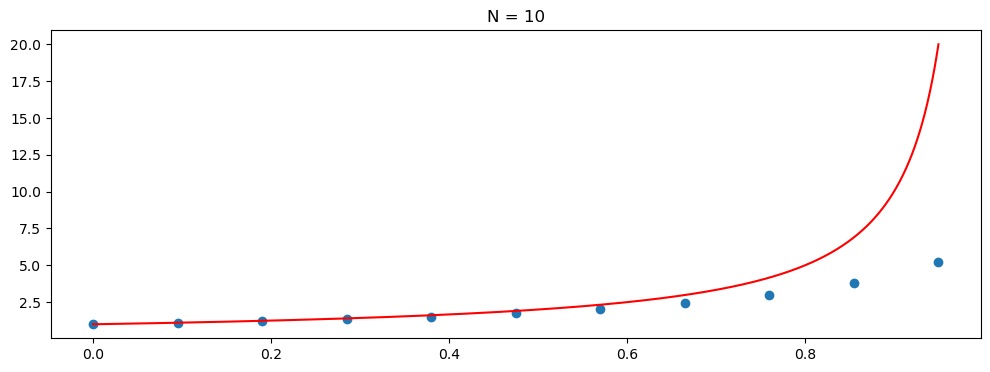

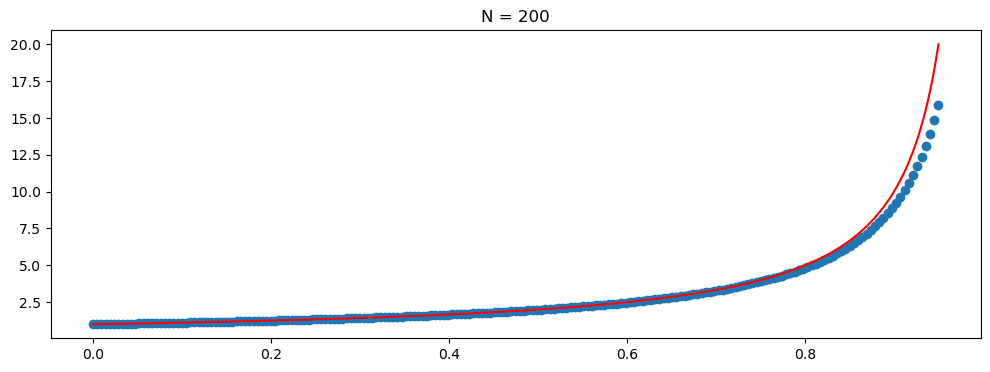

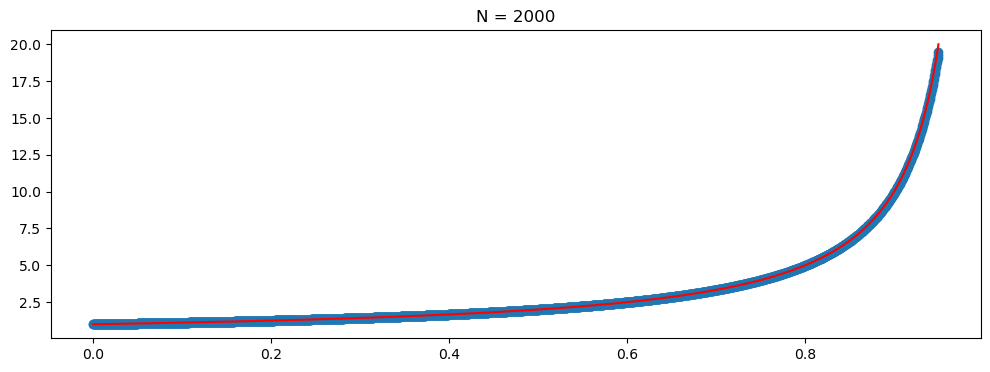

In [13]:
def x_prim(x,t):
    return x**2

def x_exact(t):
    return 1/(1-t)
T_0 = 0.0
T = 0.95
X_0 = 1.0
N_vals = [10, 200, 2000]
x_vals = np.linspace(T_0, T, 1000)
y_vals = x_exact(x_vals)
for N in N_vals:
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
        if i == 0:
            rozwiazania[i] = X_0
            continue
        rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
        blad[i] = np.abs(rozwiazania[i] - x_exact(wezel))
    plt.figure(figsize=(12,4))
    plt.plot(x_vals, y_vals, c = 'r' )
    plt.title(f'N = {N}')
    plt.scatter(wezly, rozwiazania)
    plt.show()

In [15]:
import pandas as pd
from tabulate import tabulate

In [16]:
def scientific_format(x):
    if pd.isna(x) or x == 0:
        return str(x)
    
    exponent = int(np.floor(np.log10(abs(x))))
    
    coefficient = x / (10 ** exponent)
    
    if coefficient == int(coefficient):
        formatted_coefficient = f"{int(coefficient)}."
    else:
        formatted_coefficient = f"{coefficient:.2f}"
    
    return f"{formatted_coefficient} x 10^{exponent}"

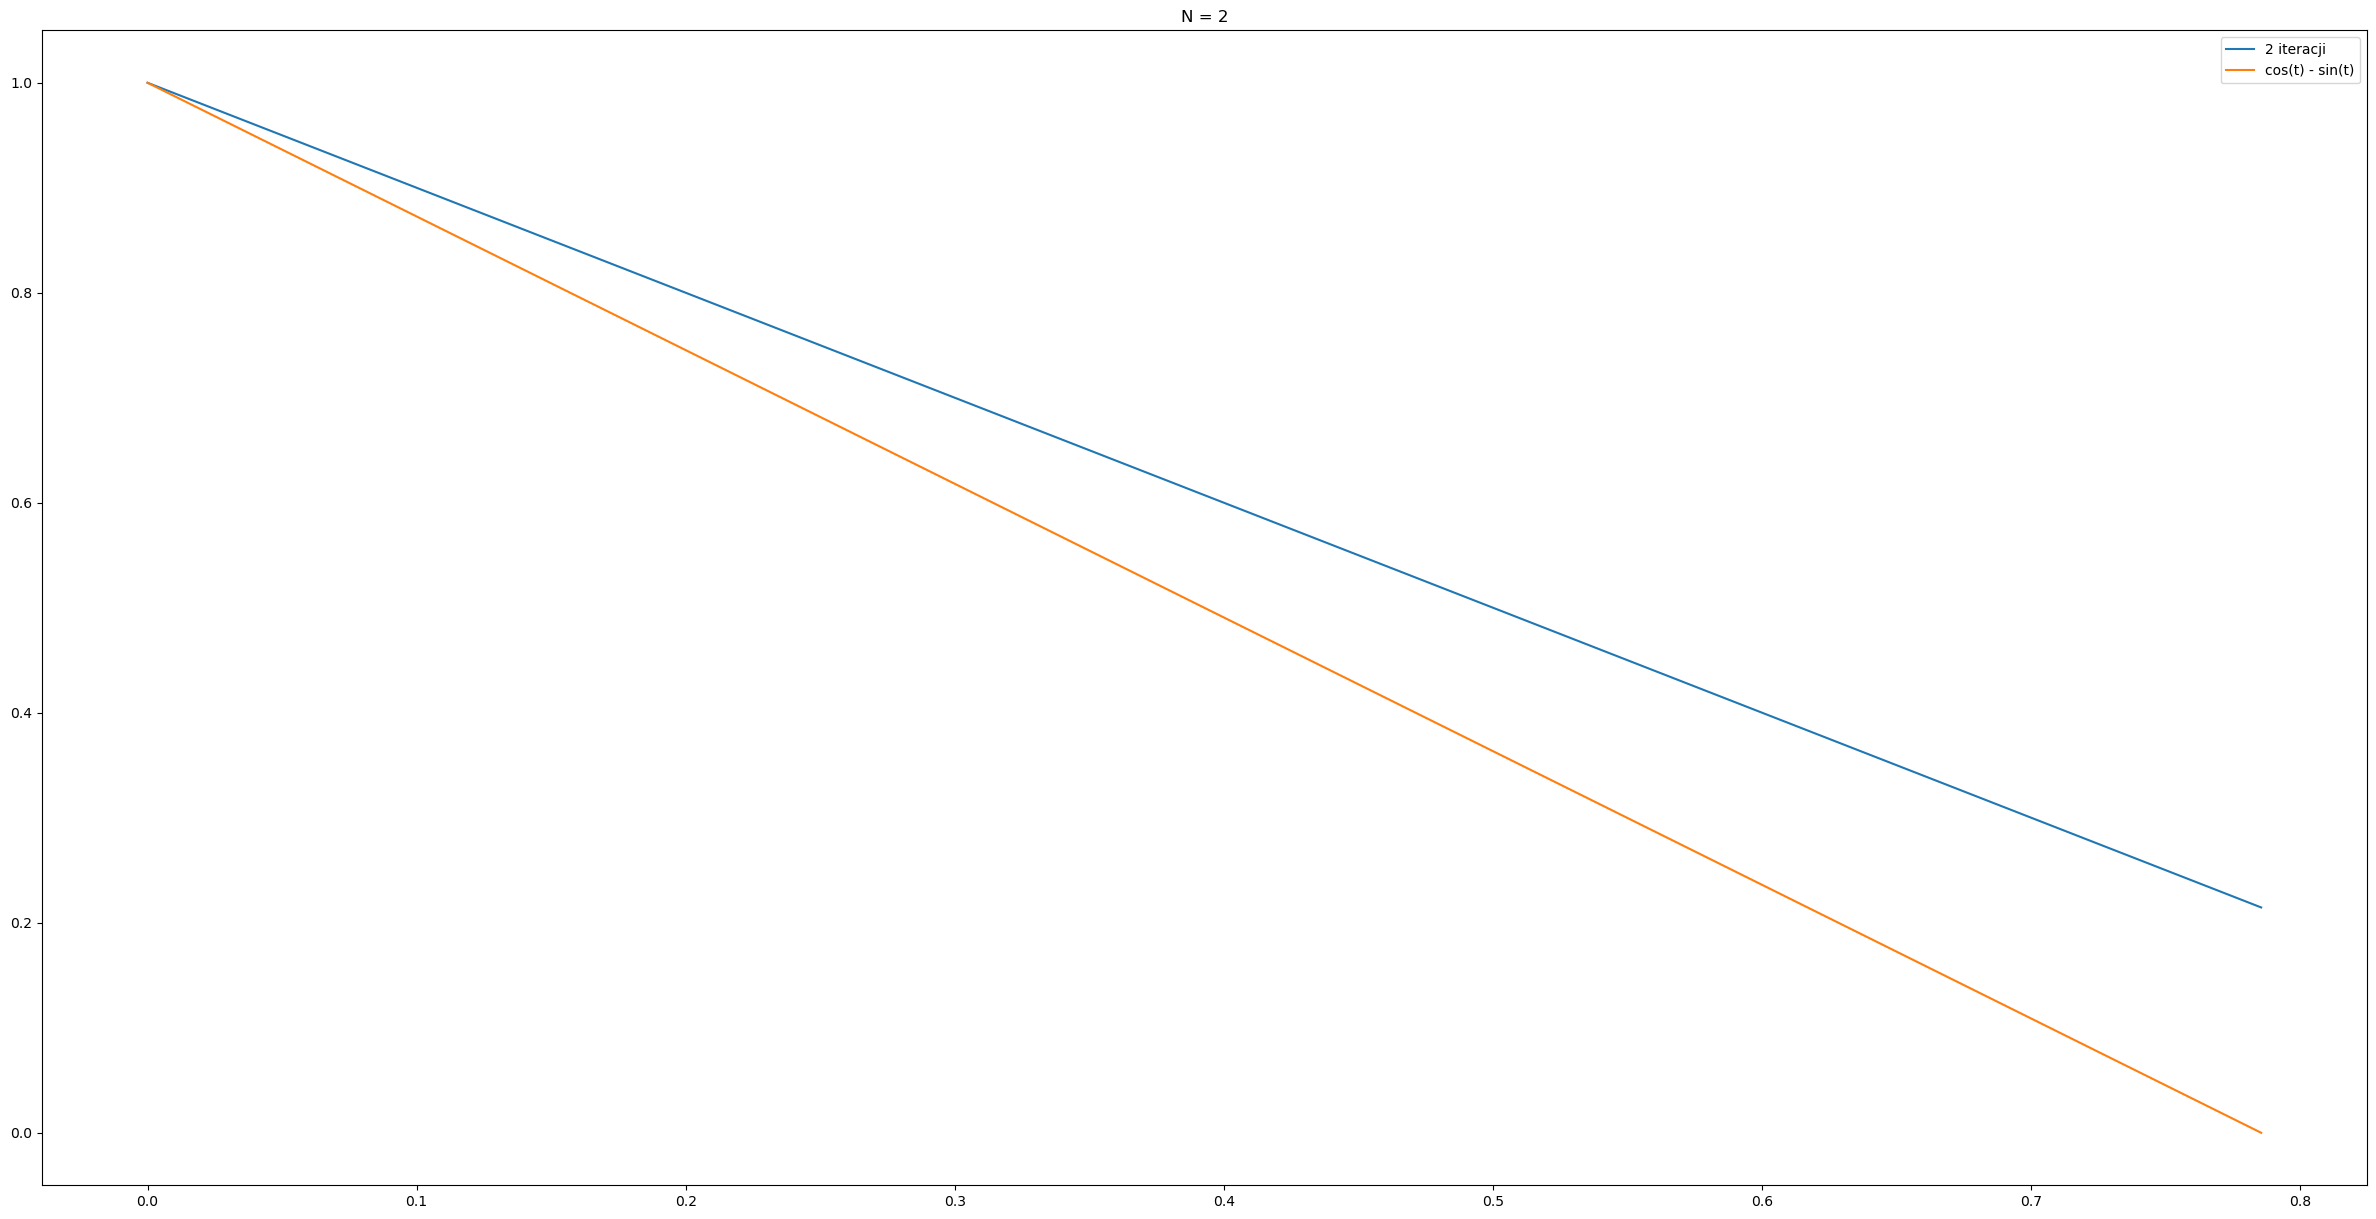

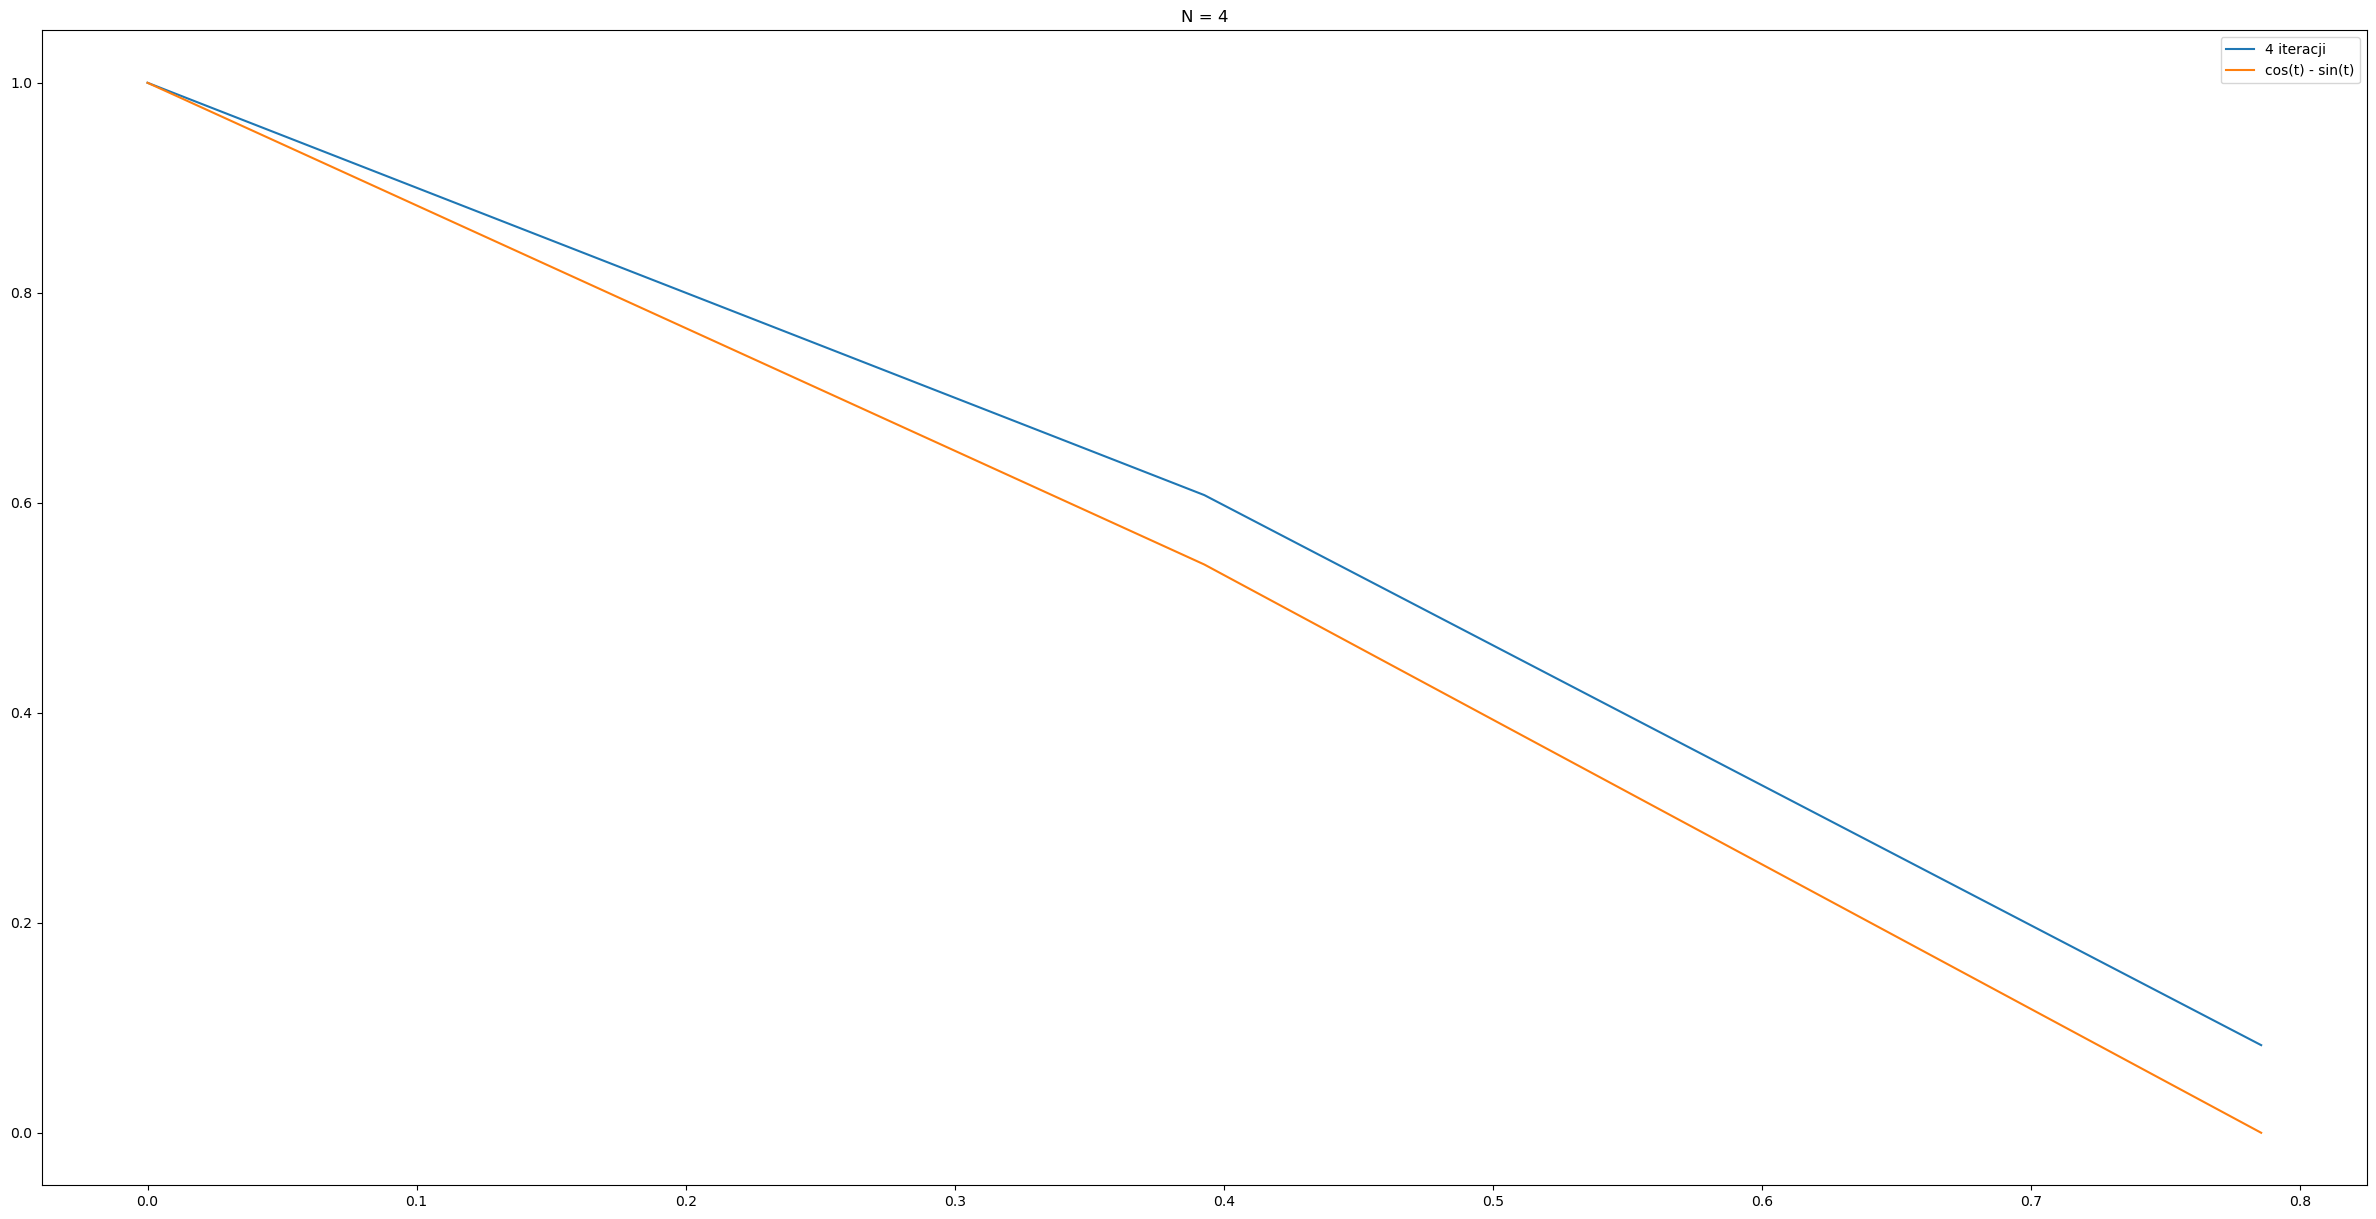

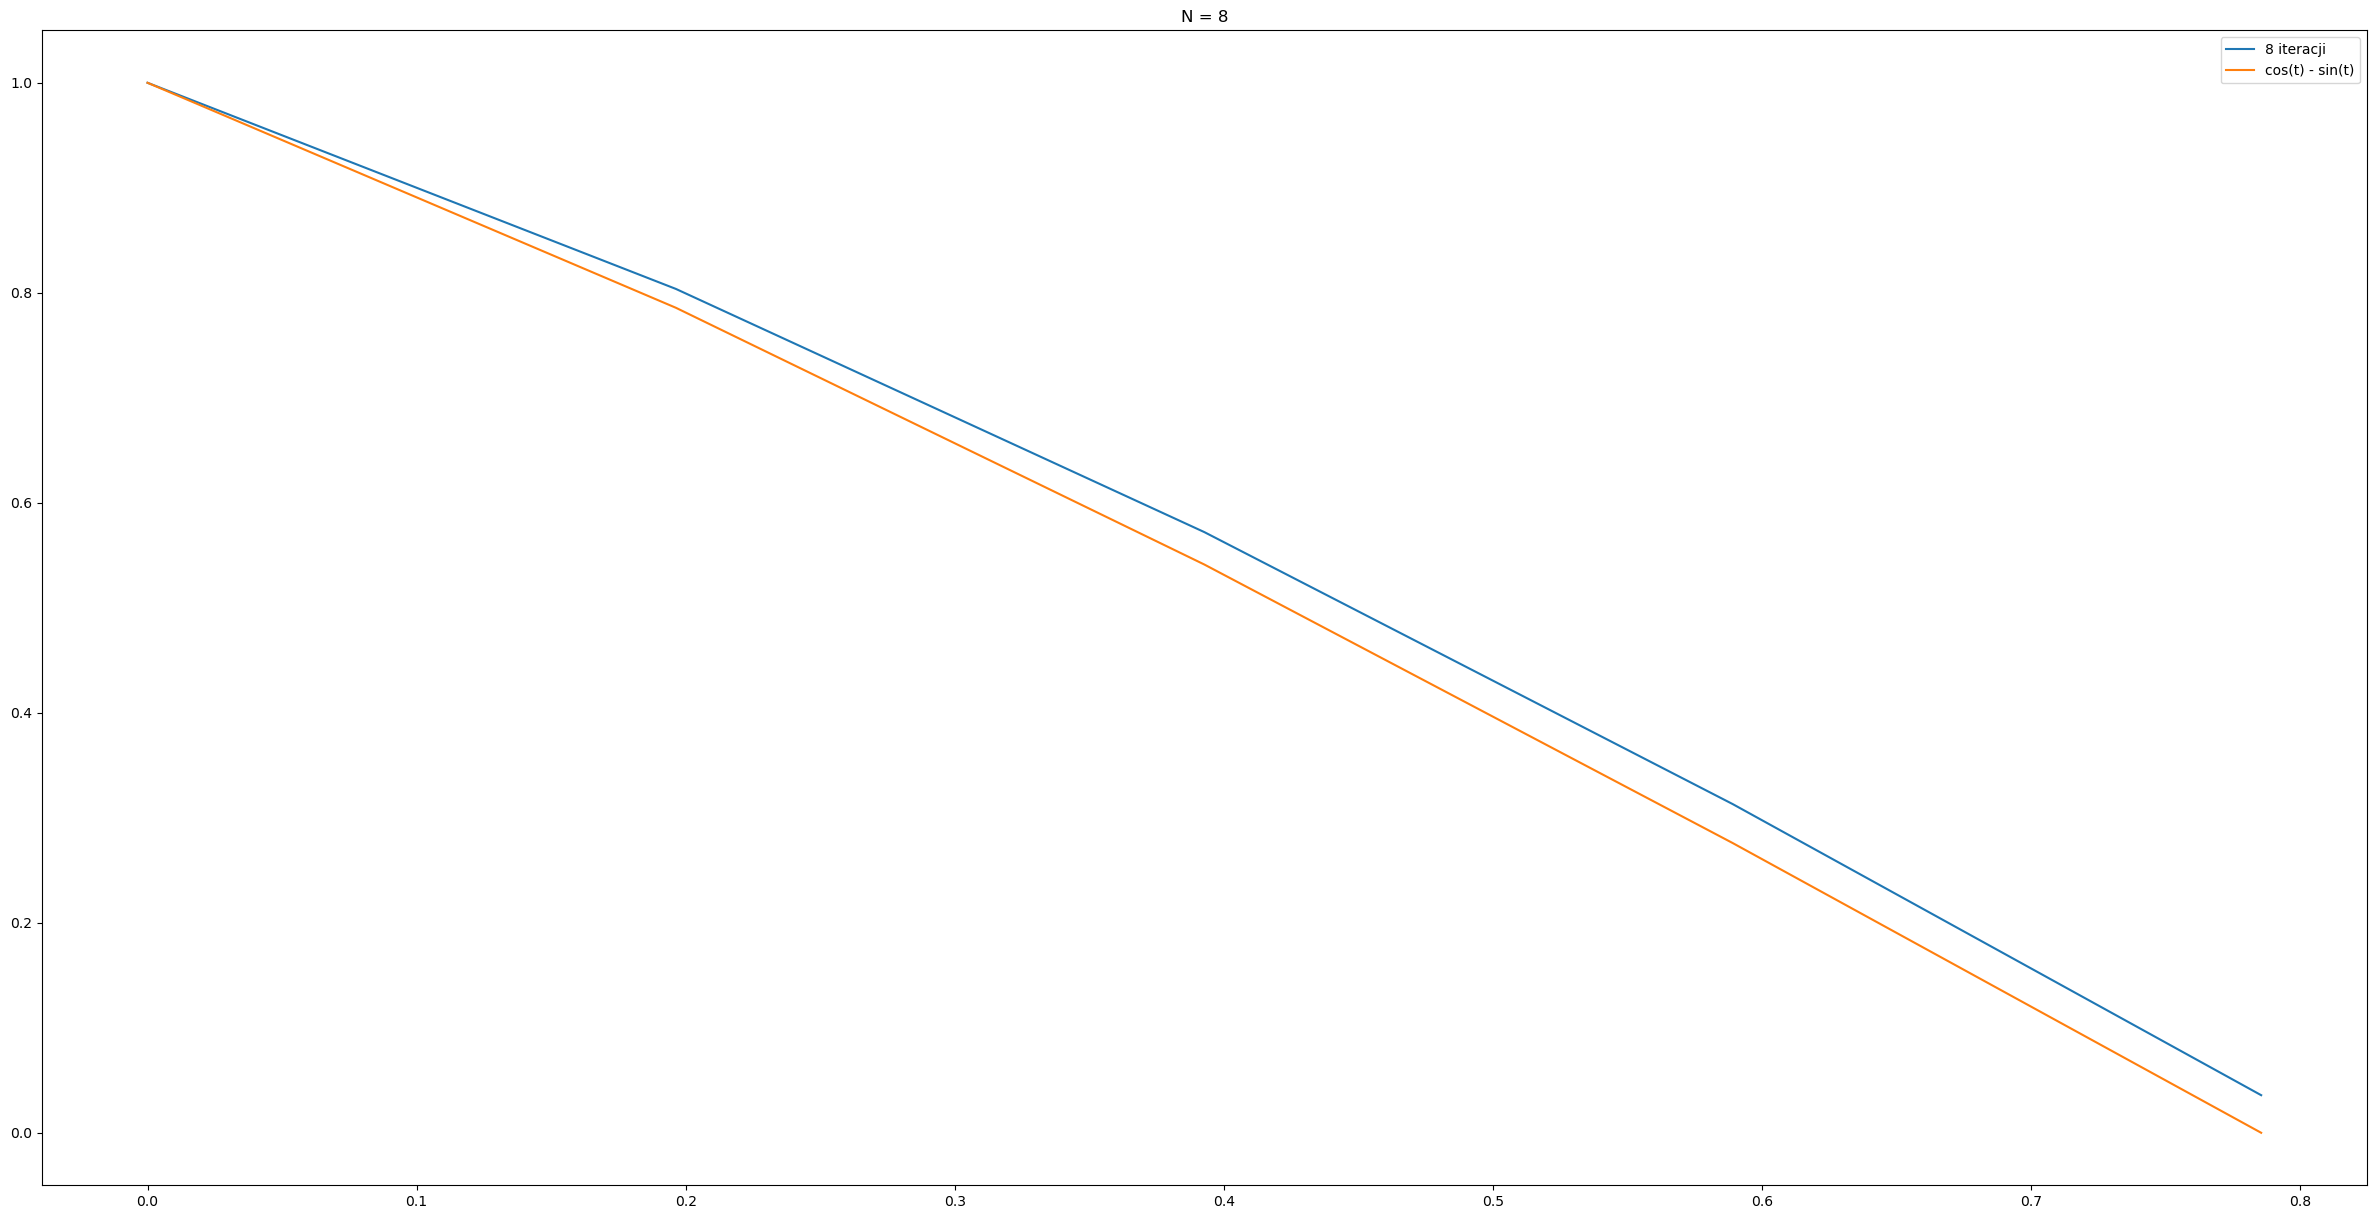

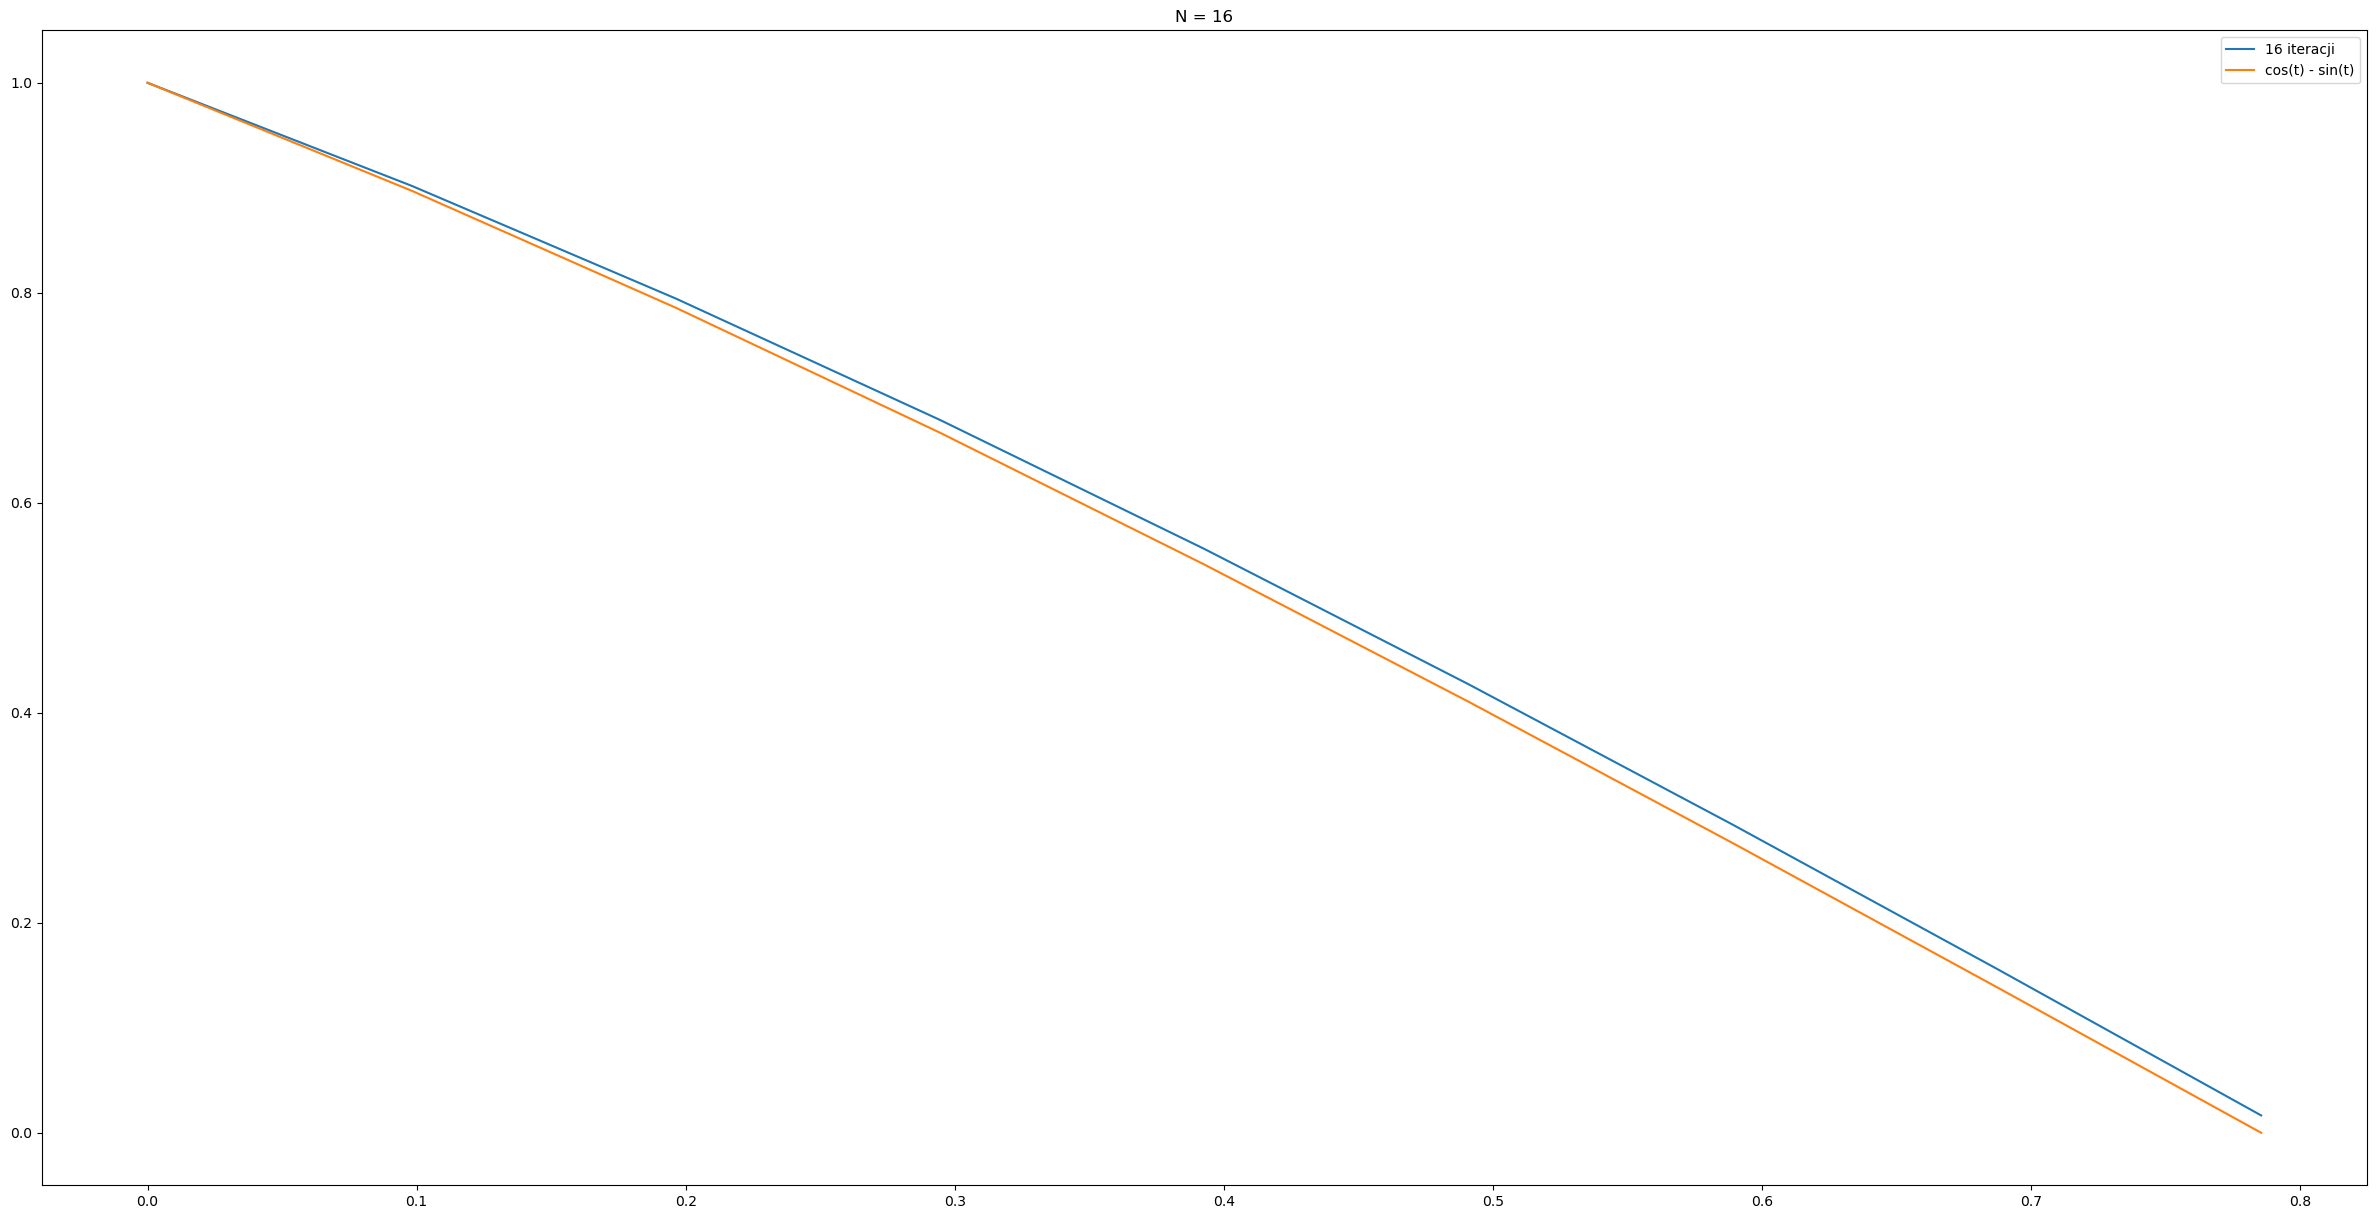

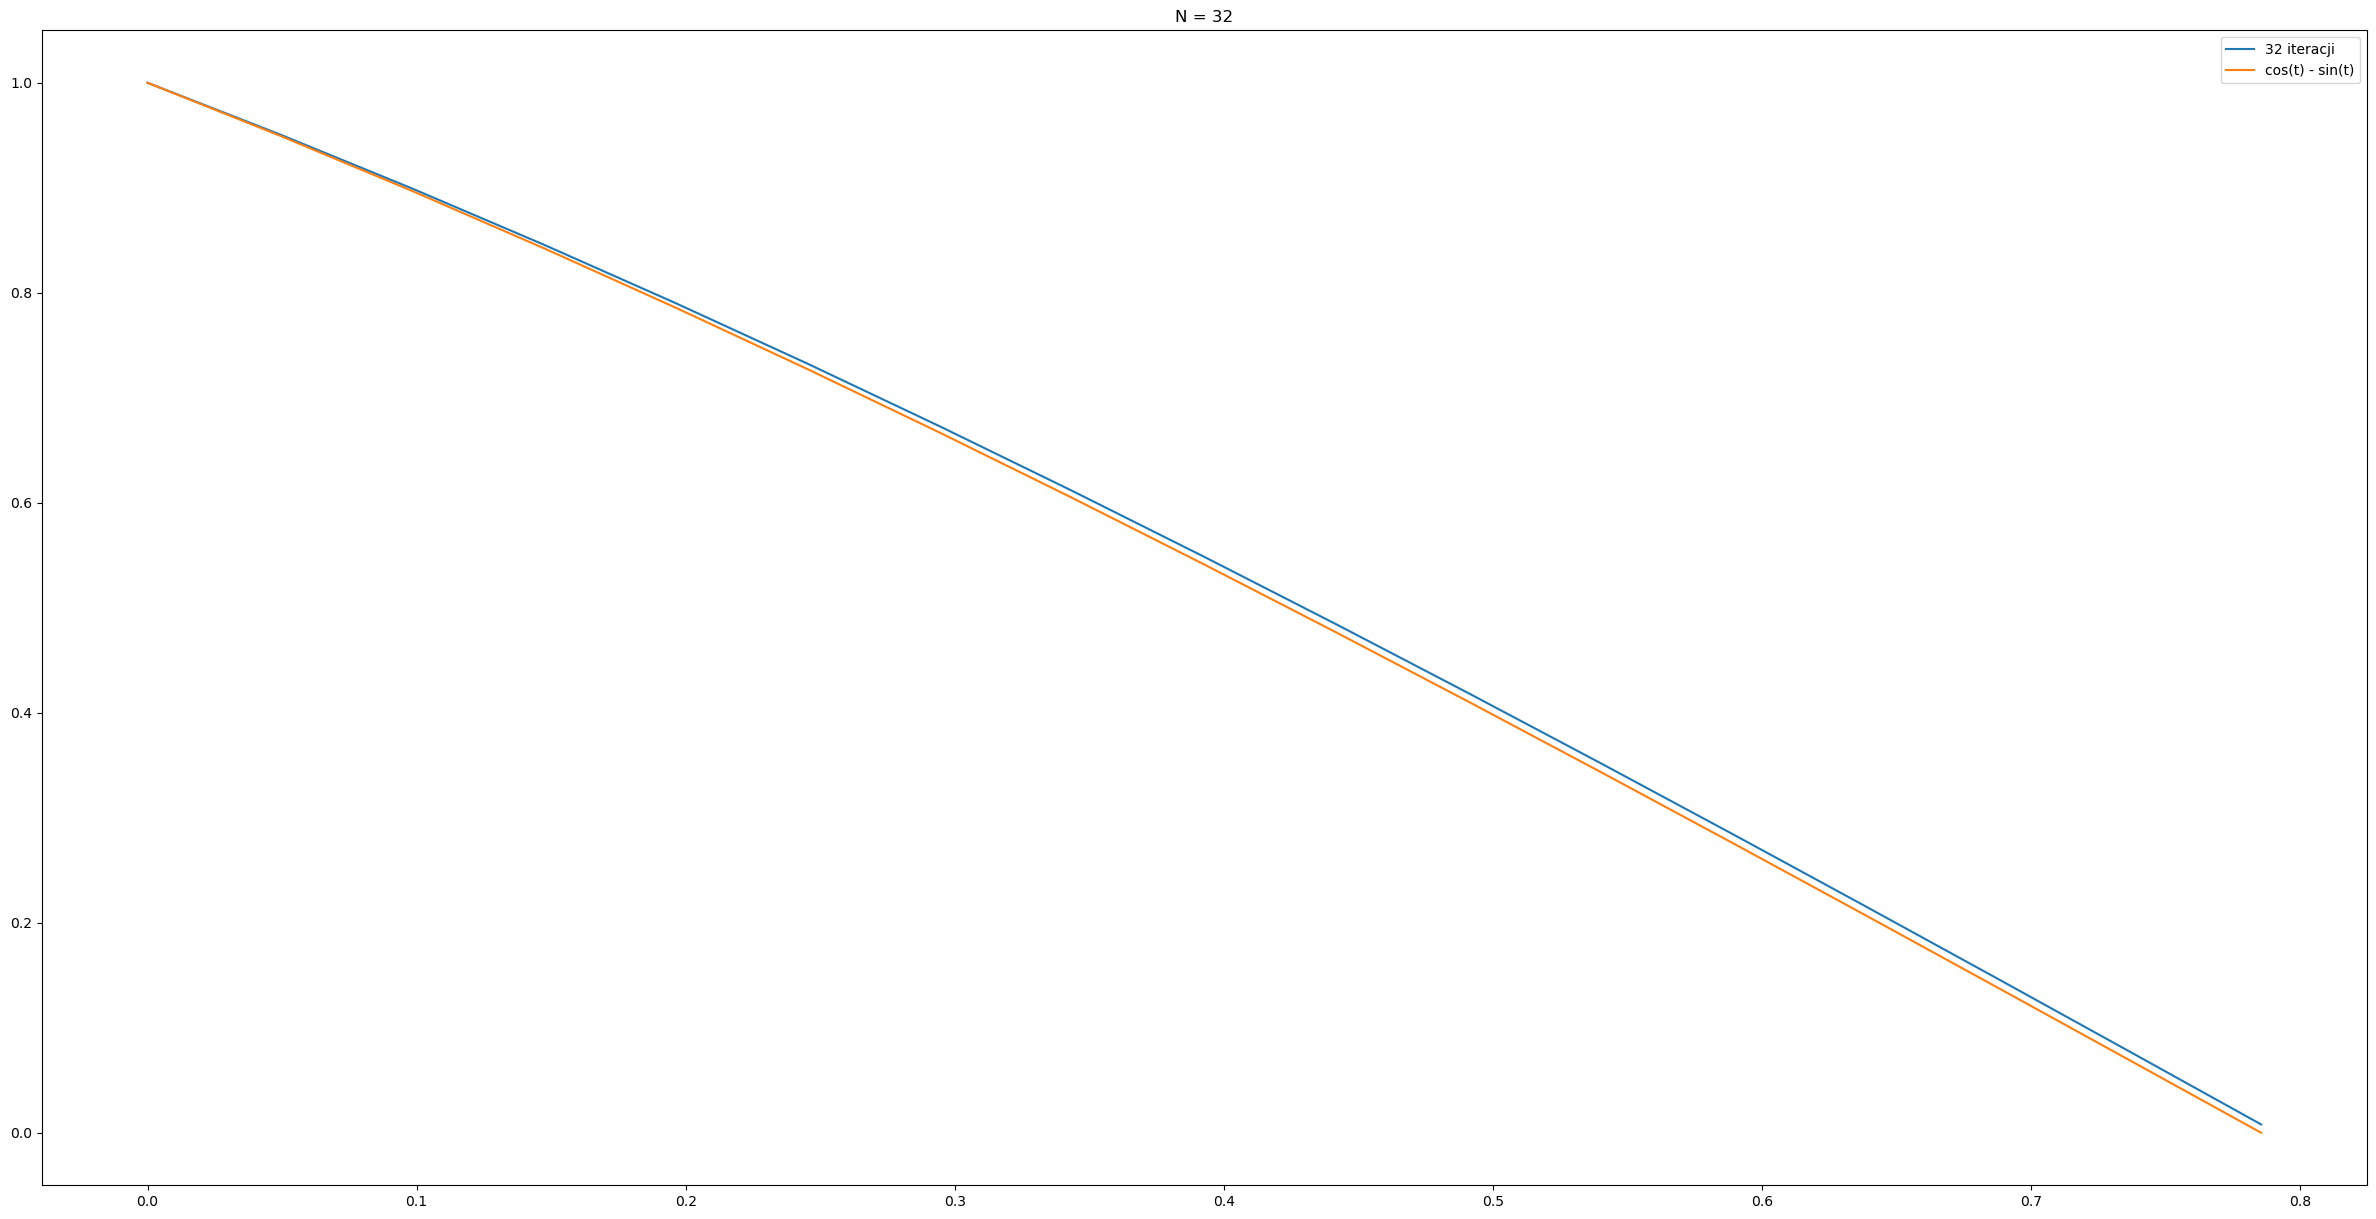

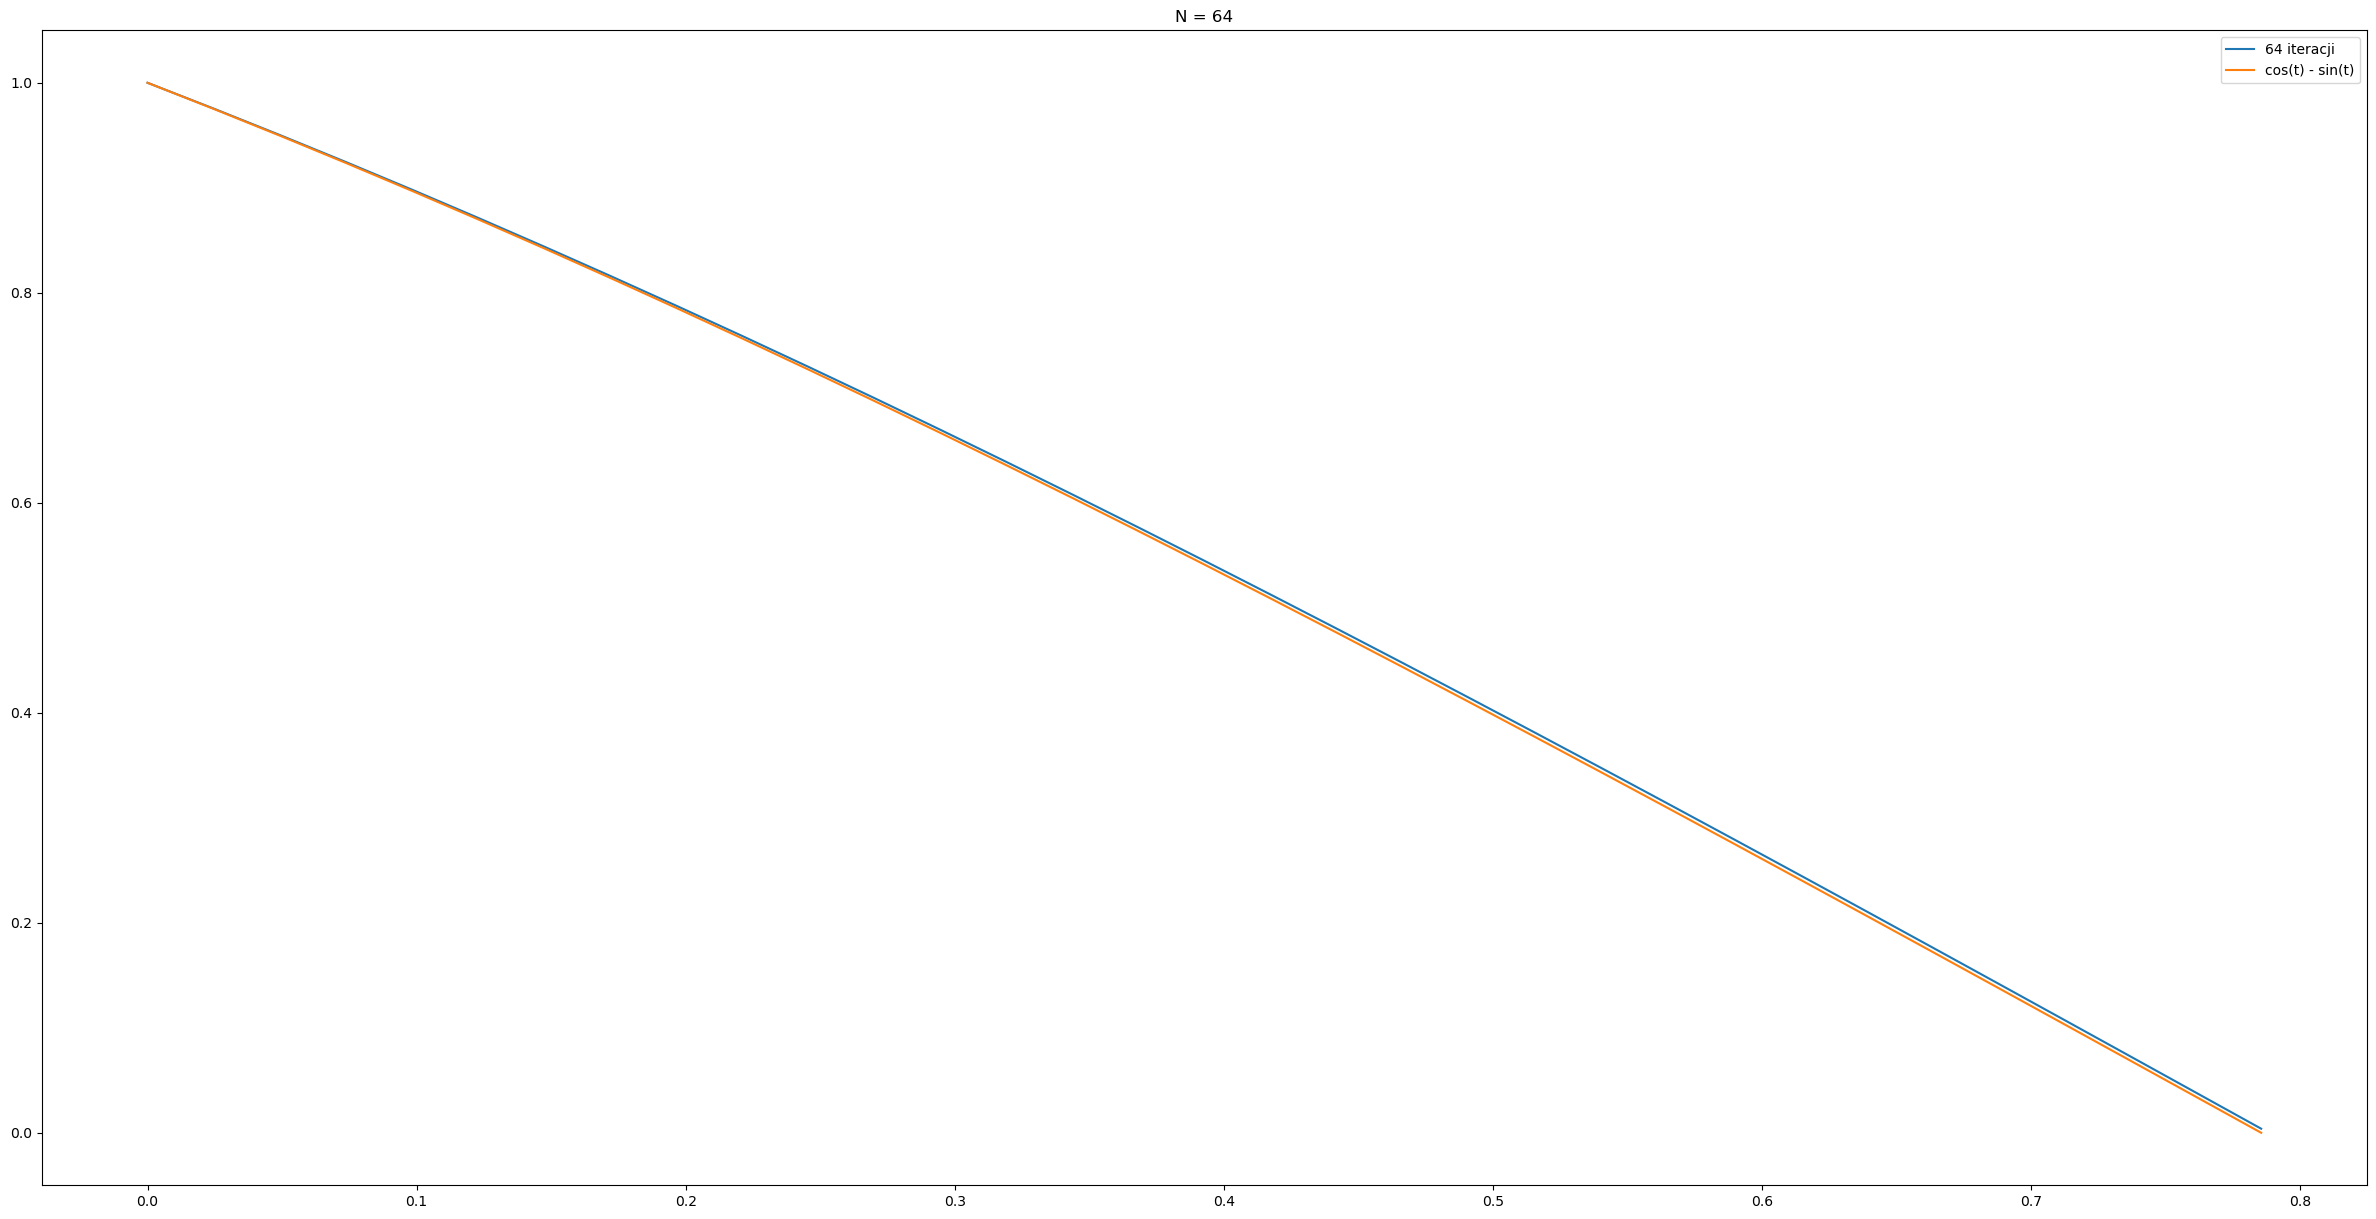

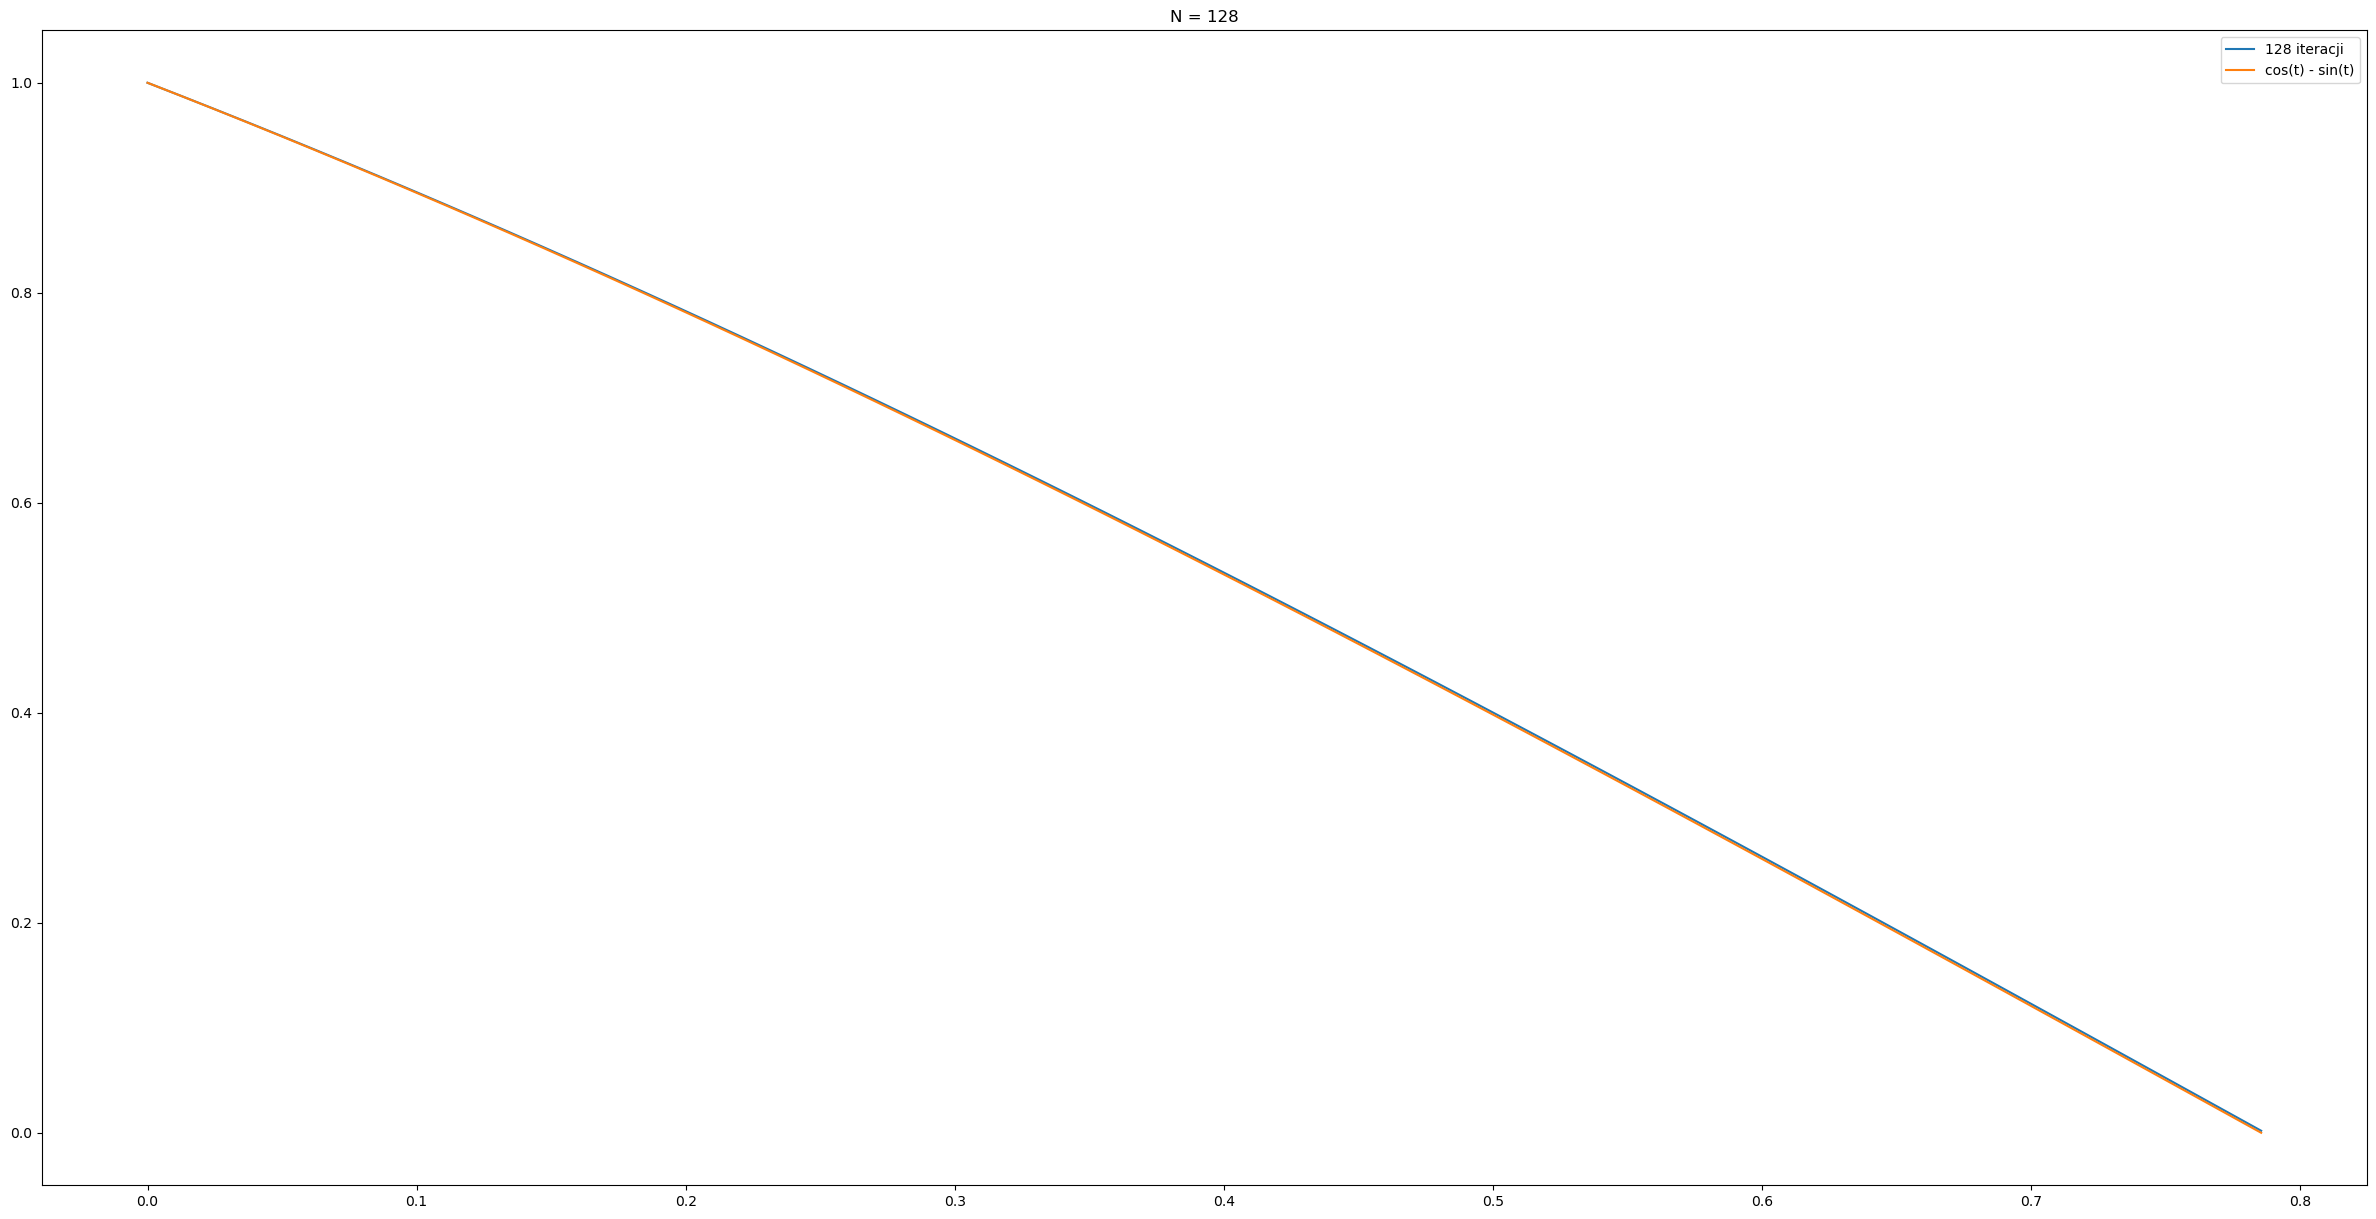

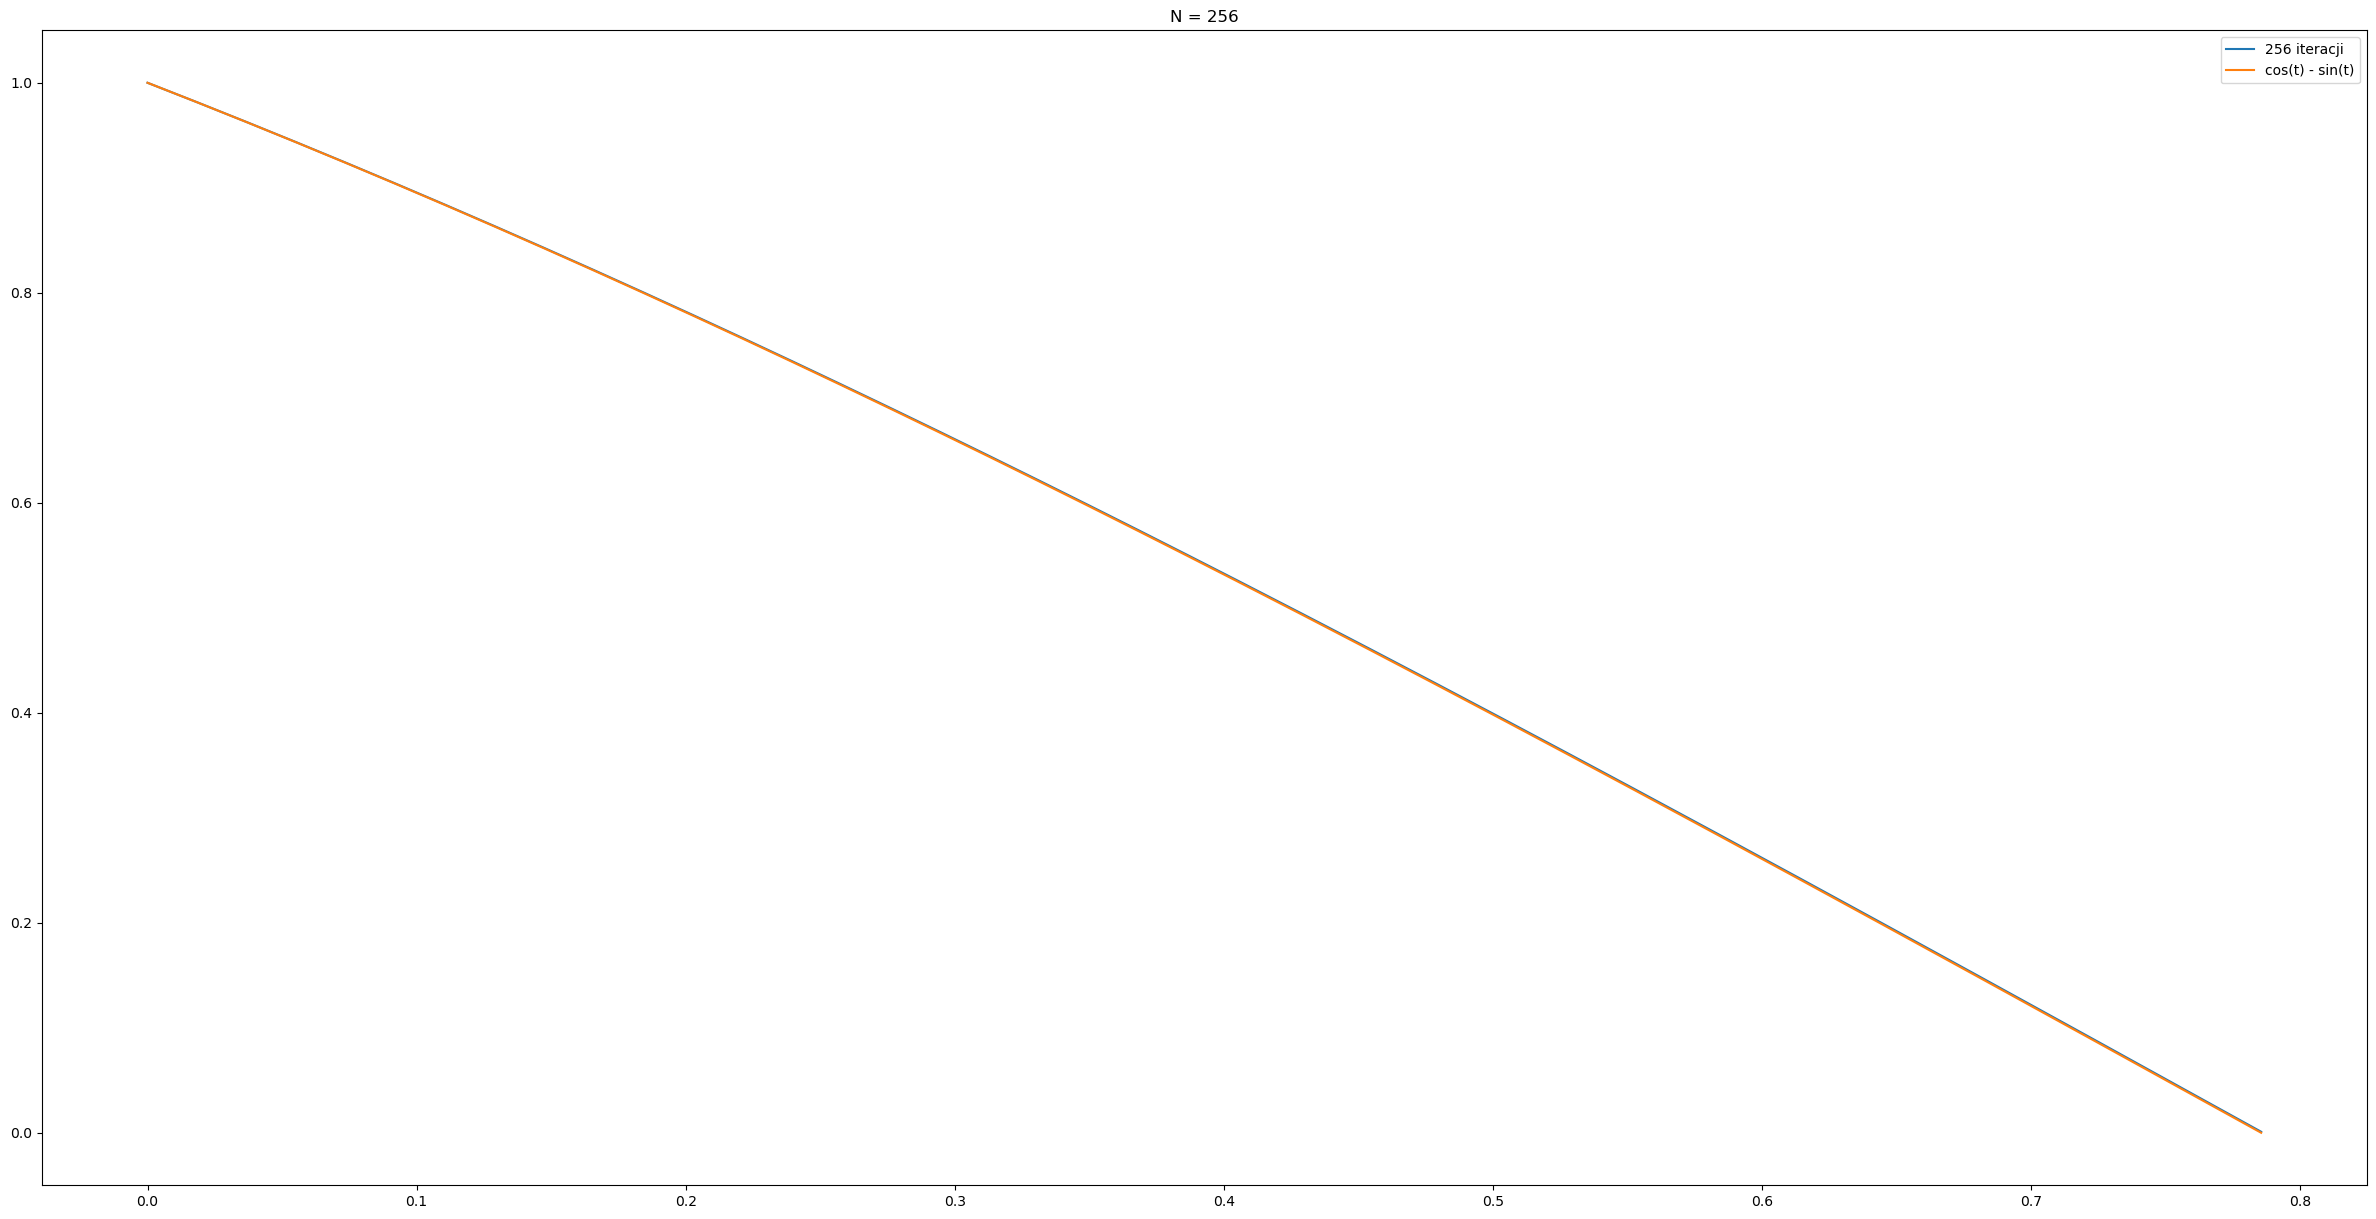

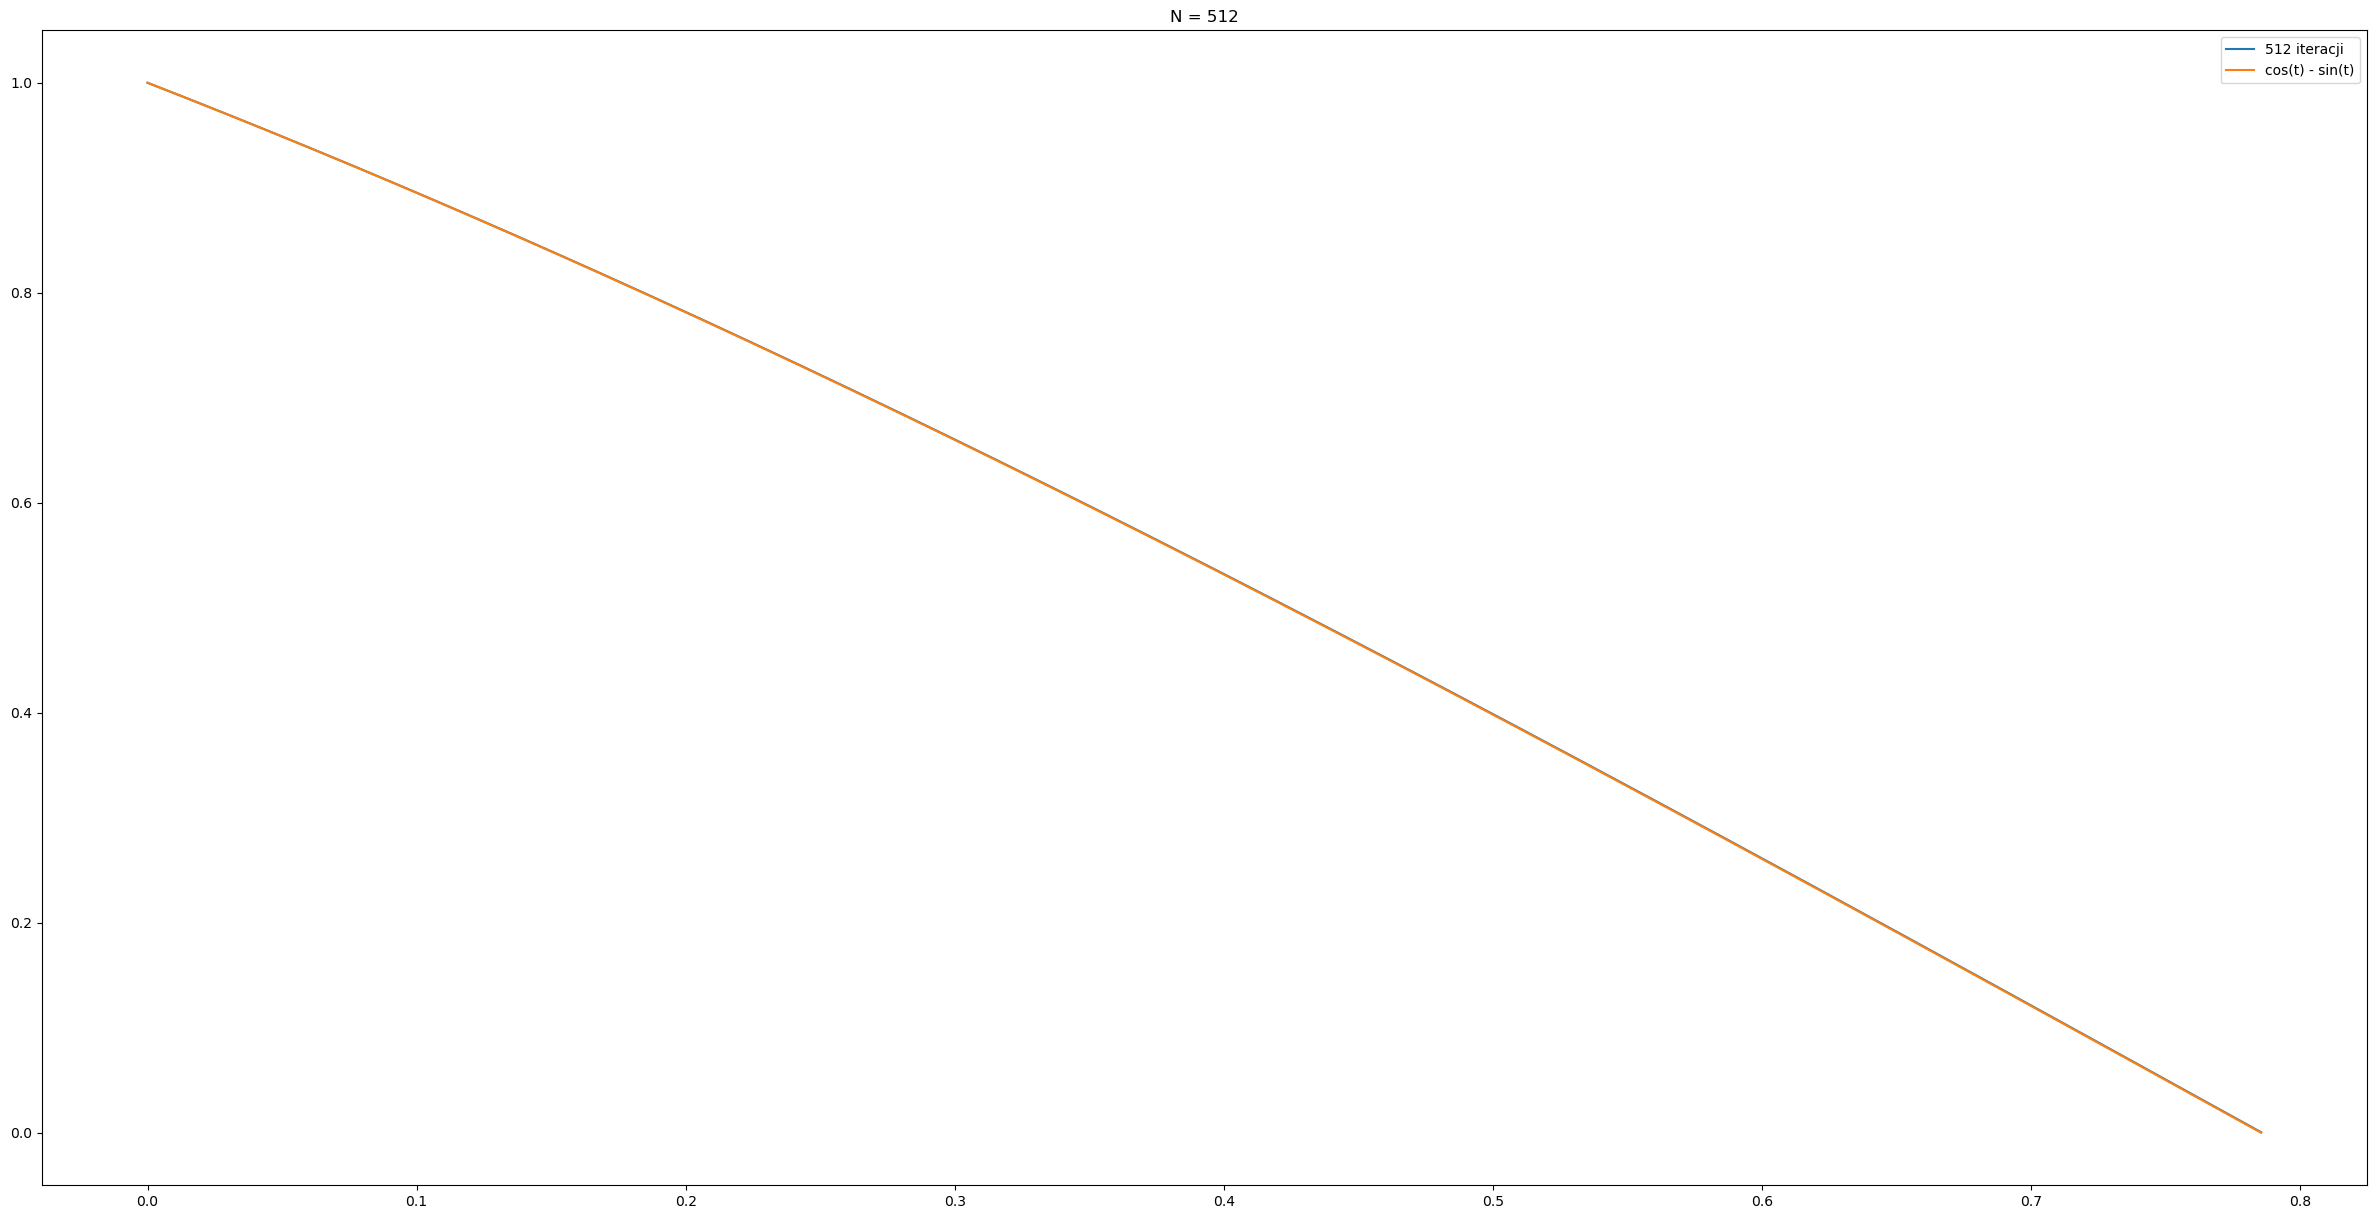

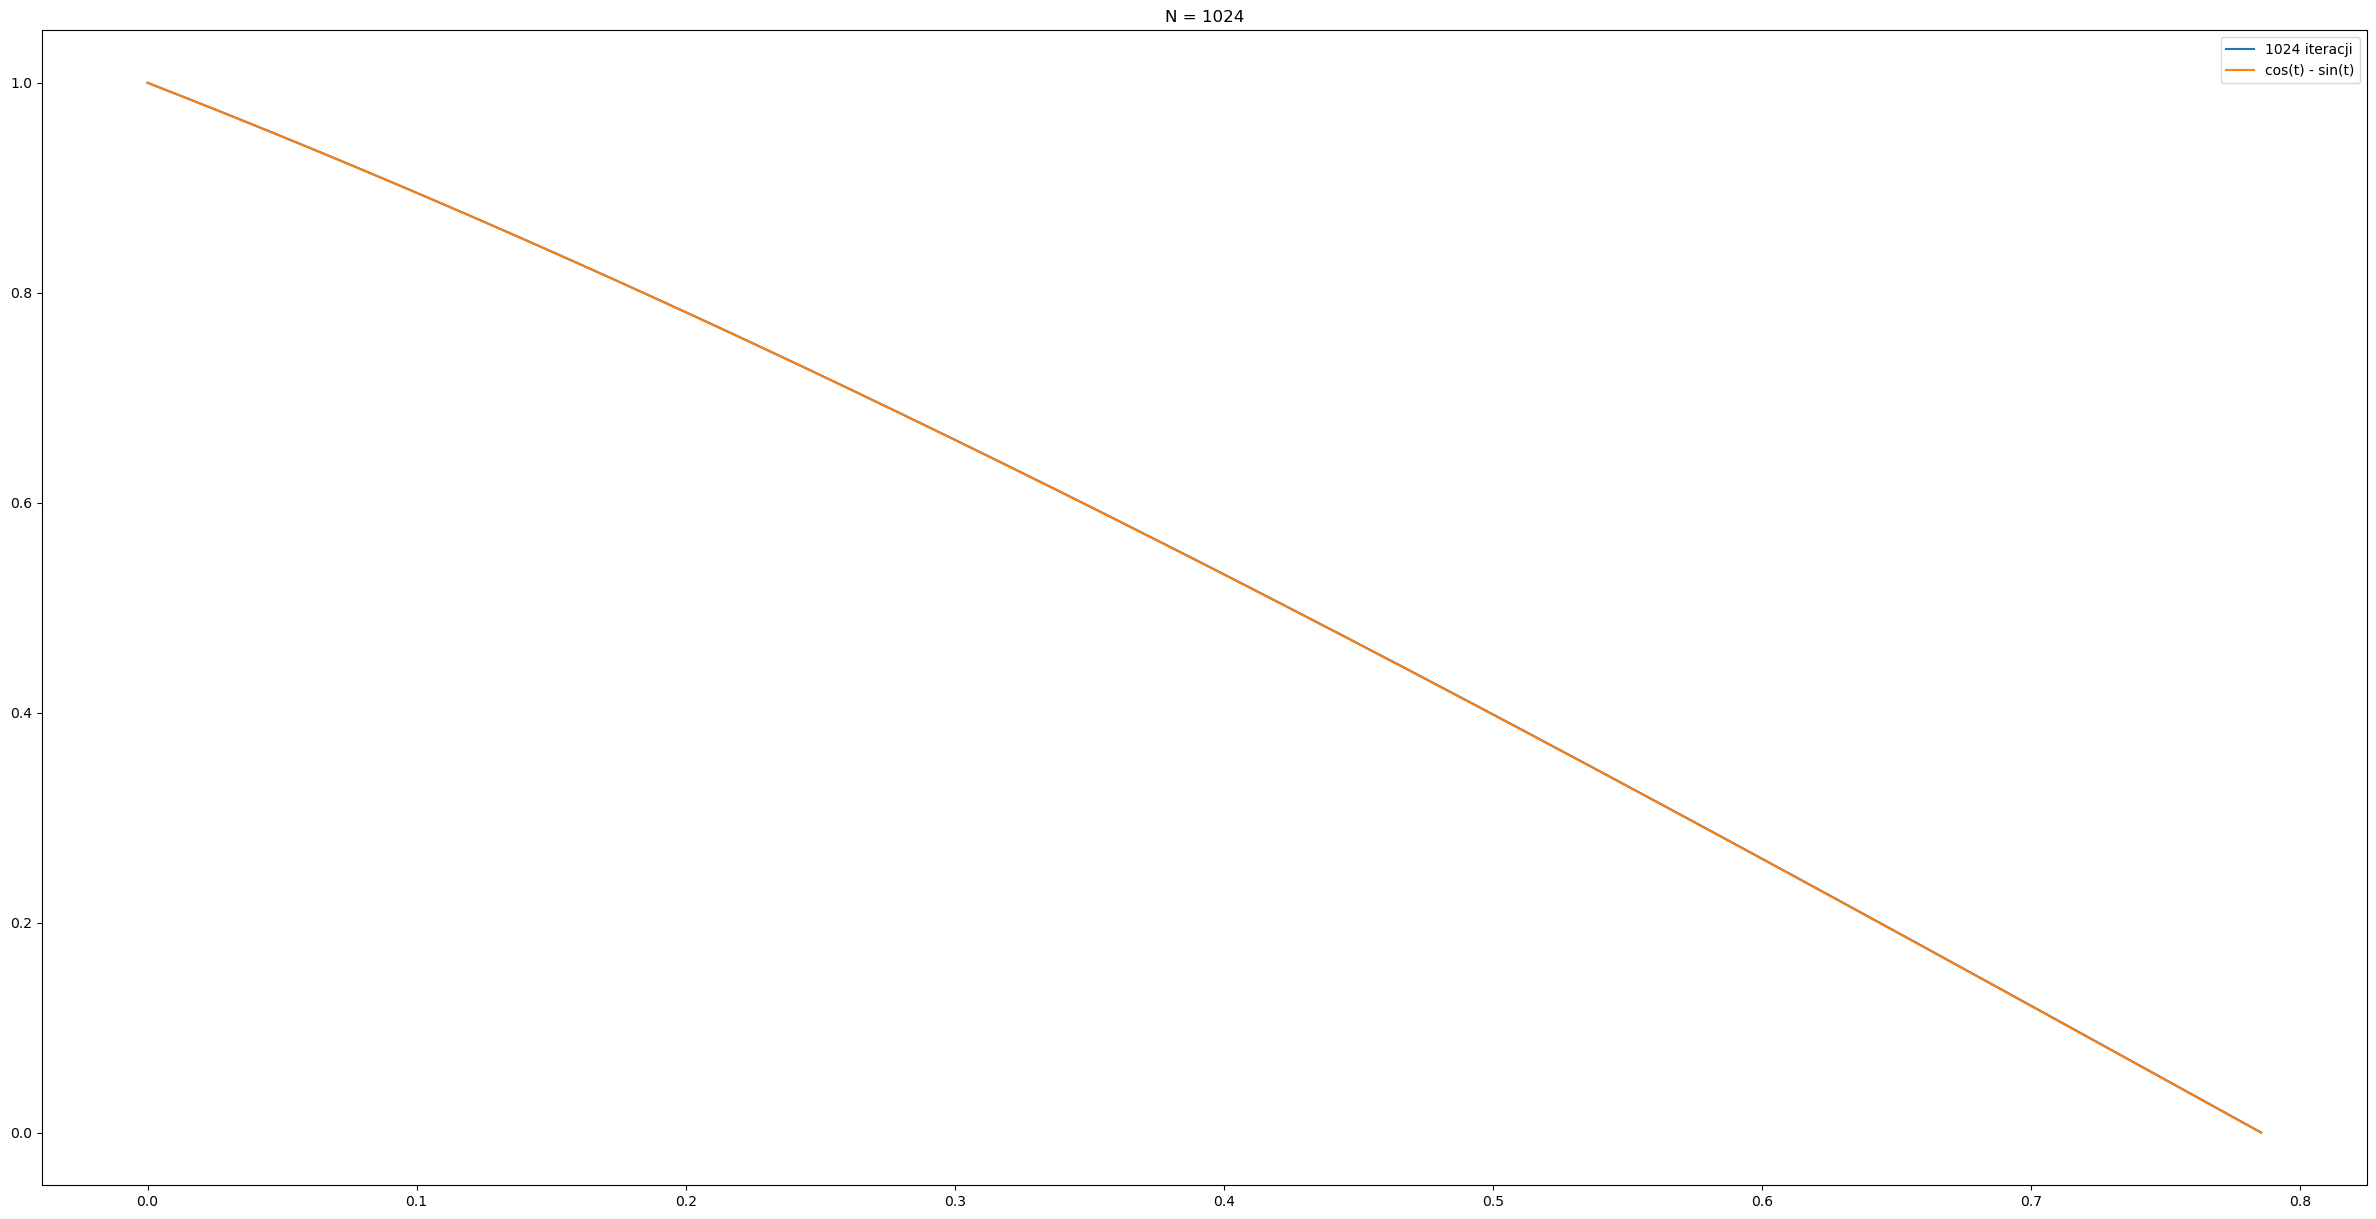

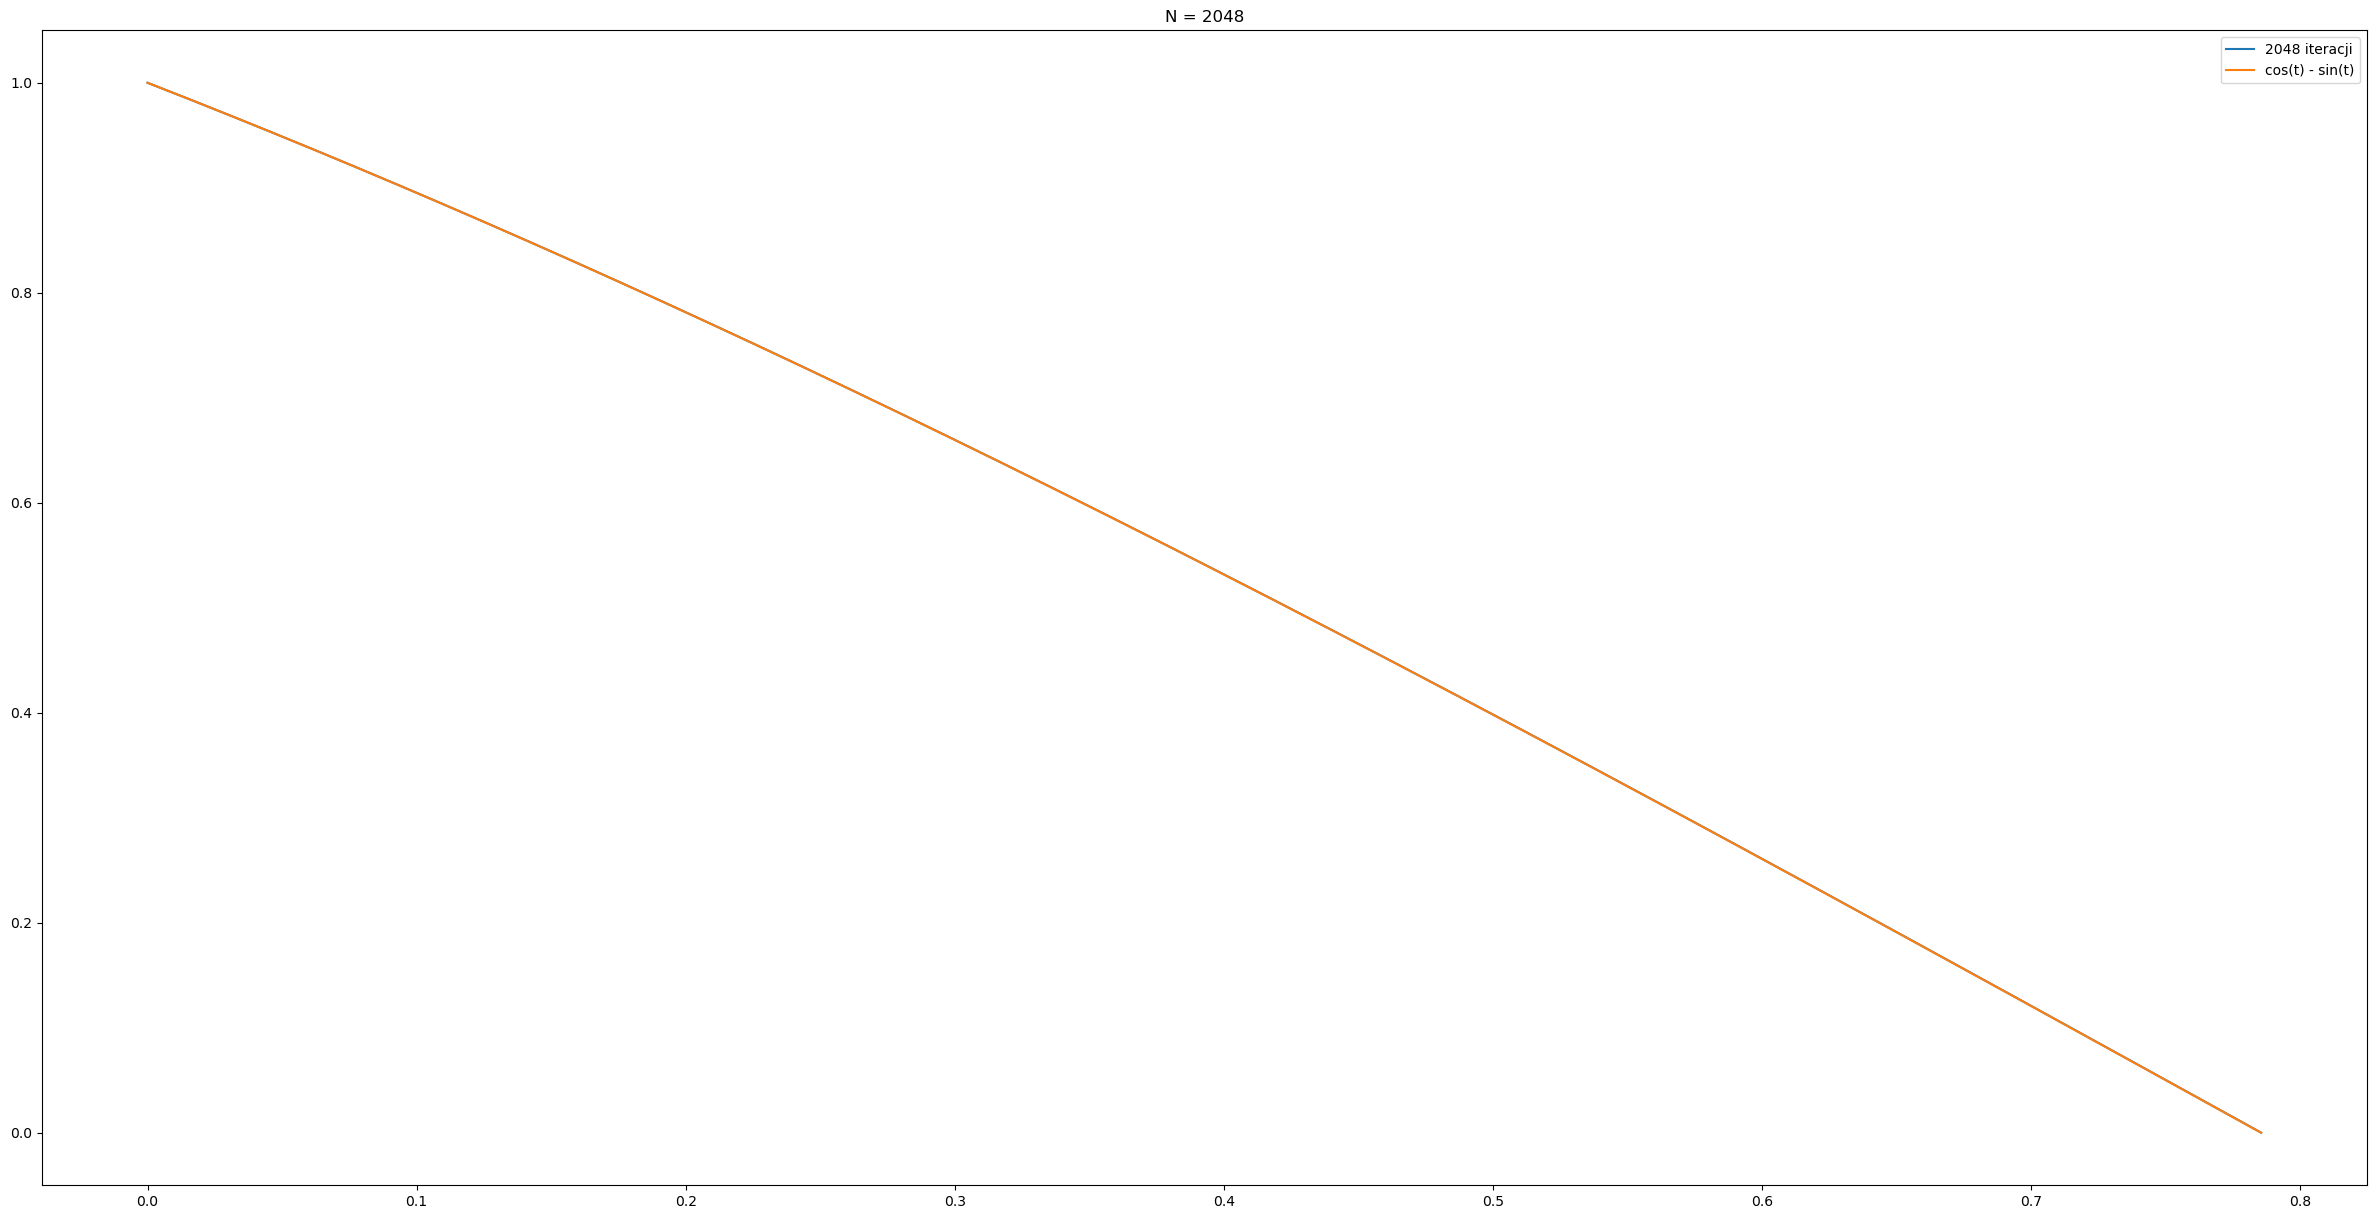

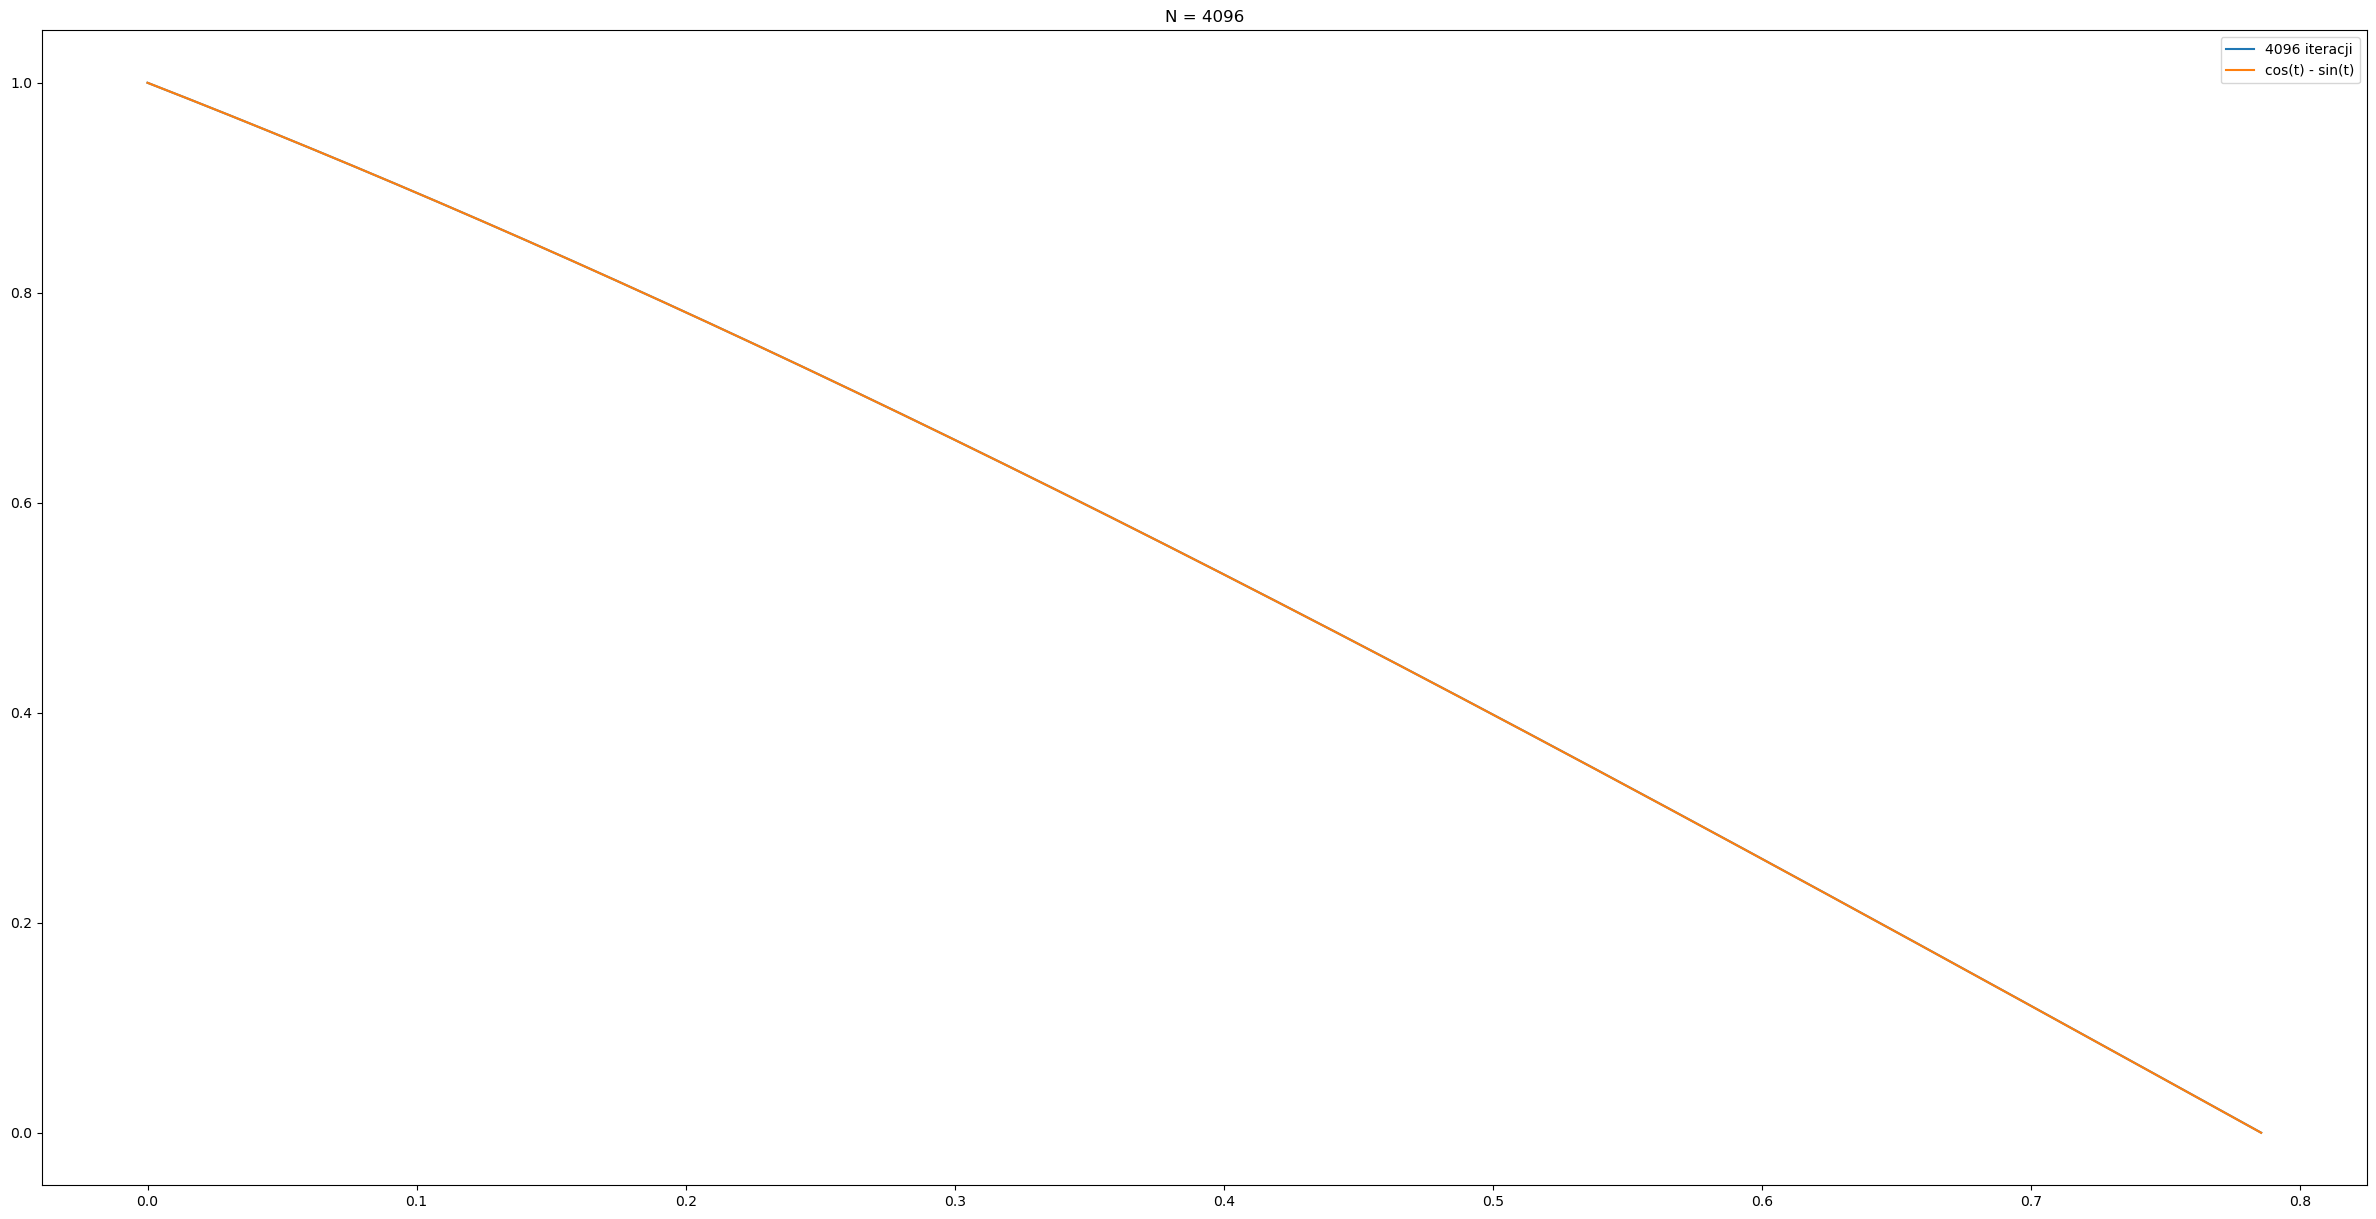

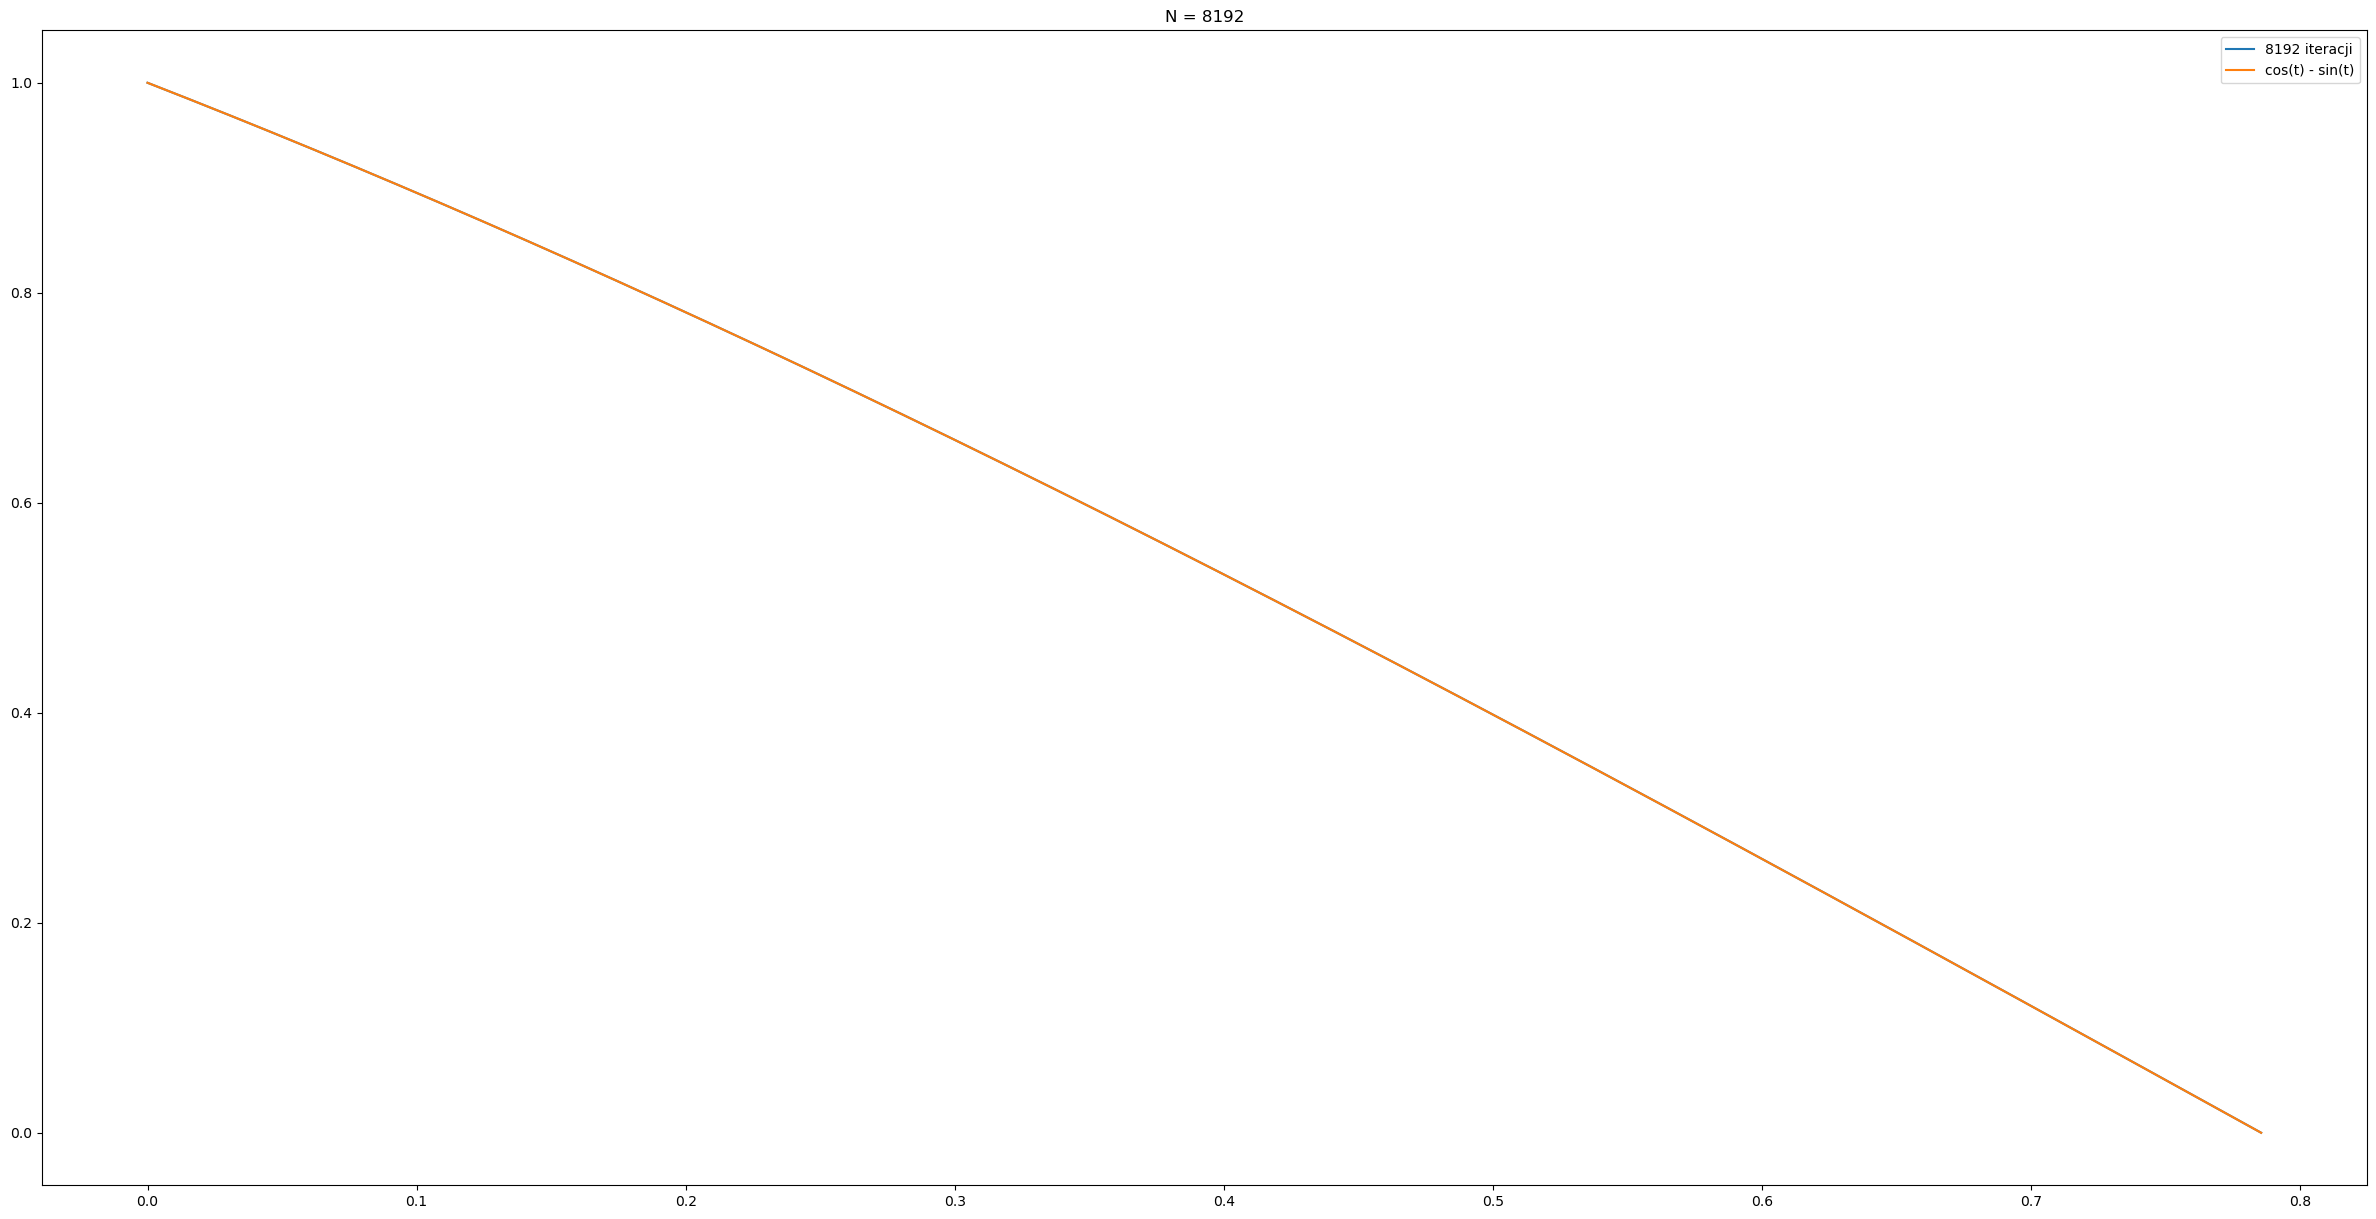

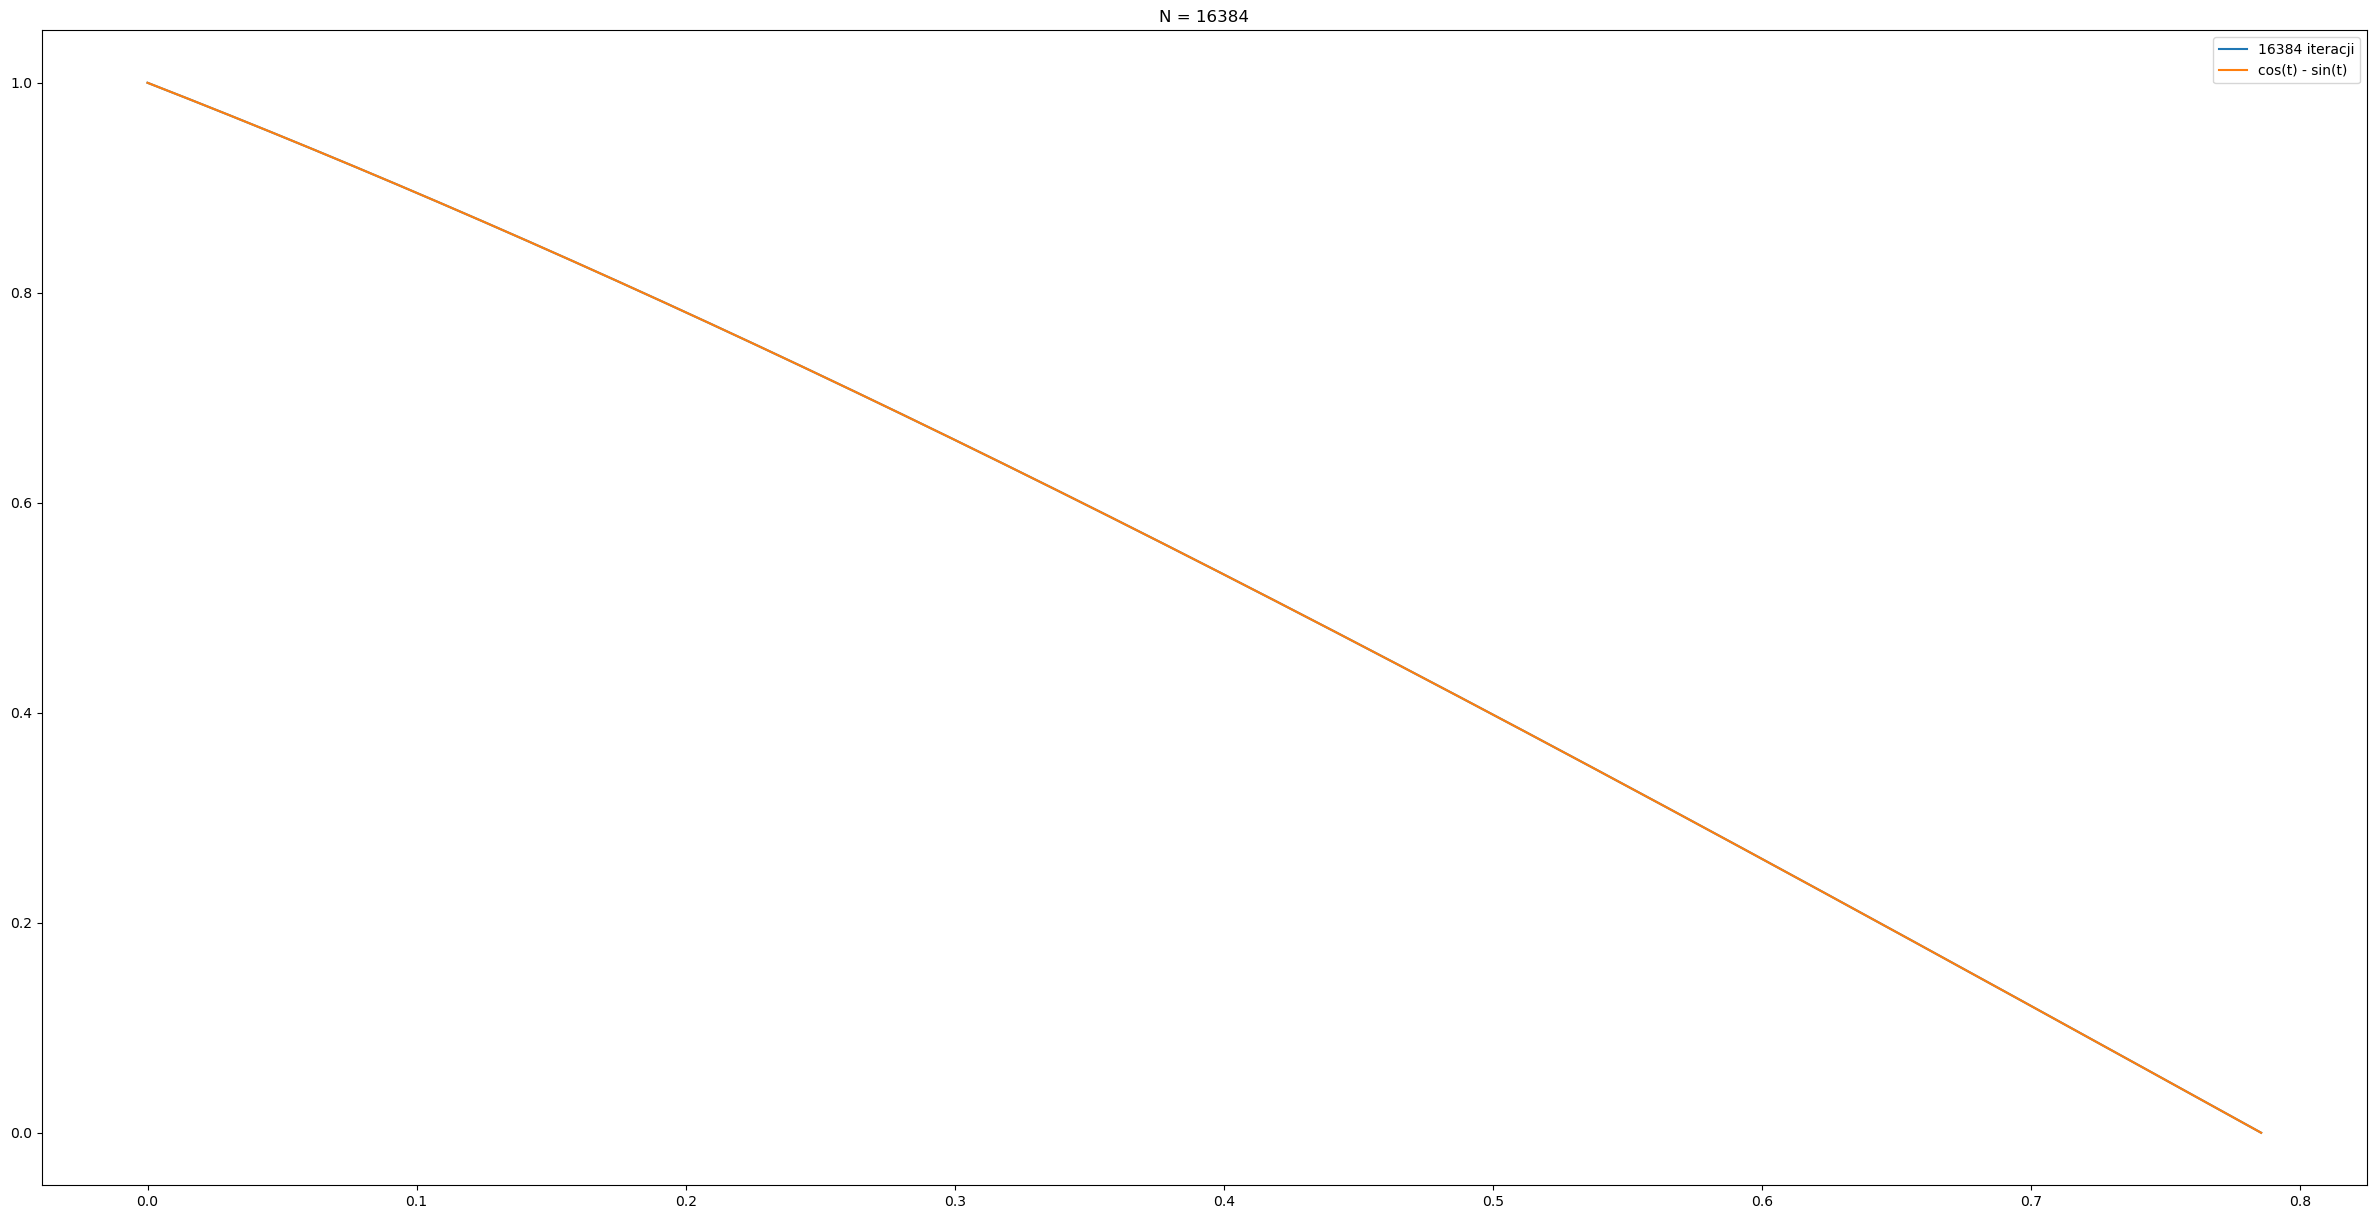

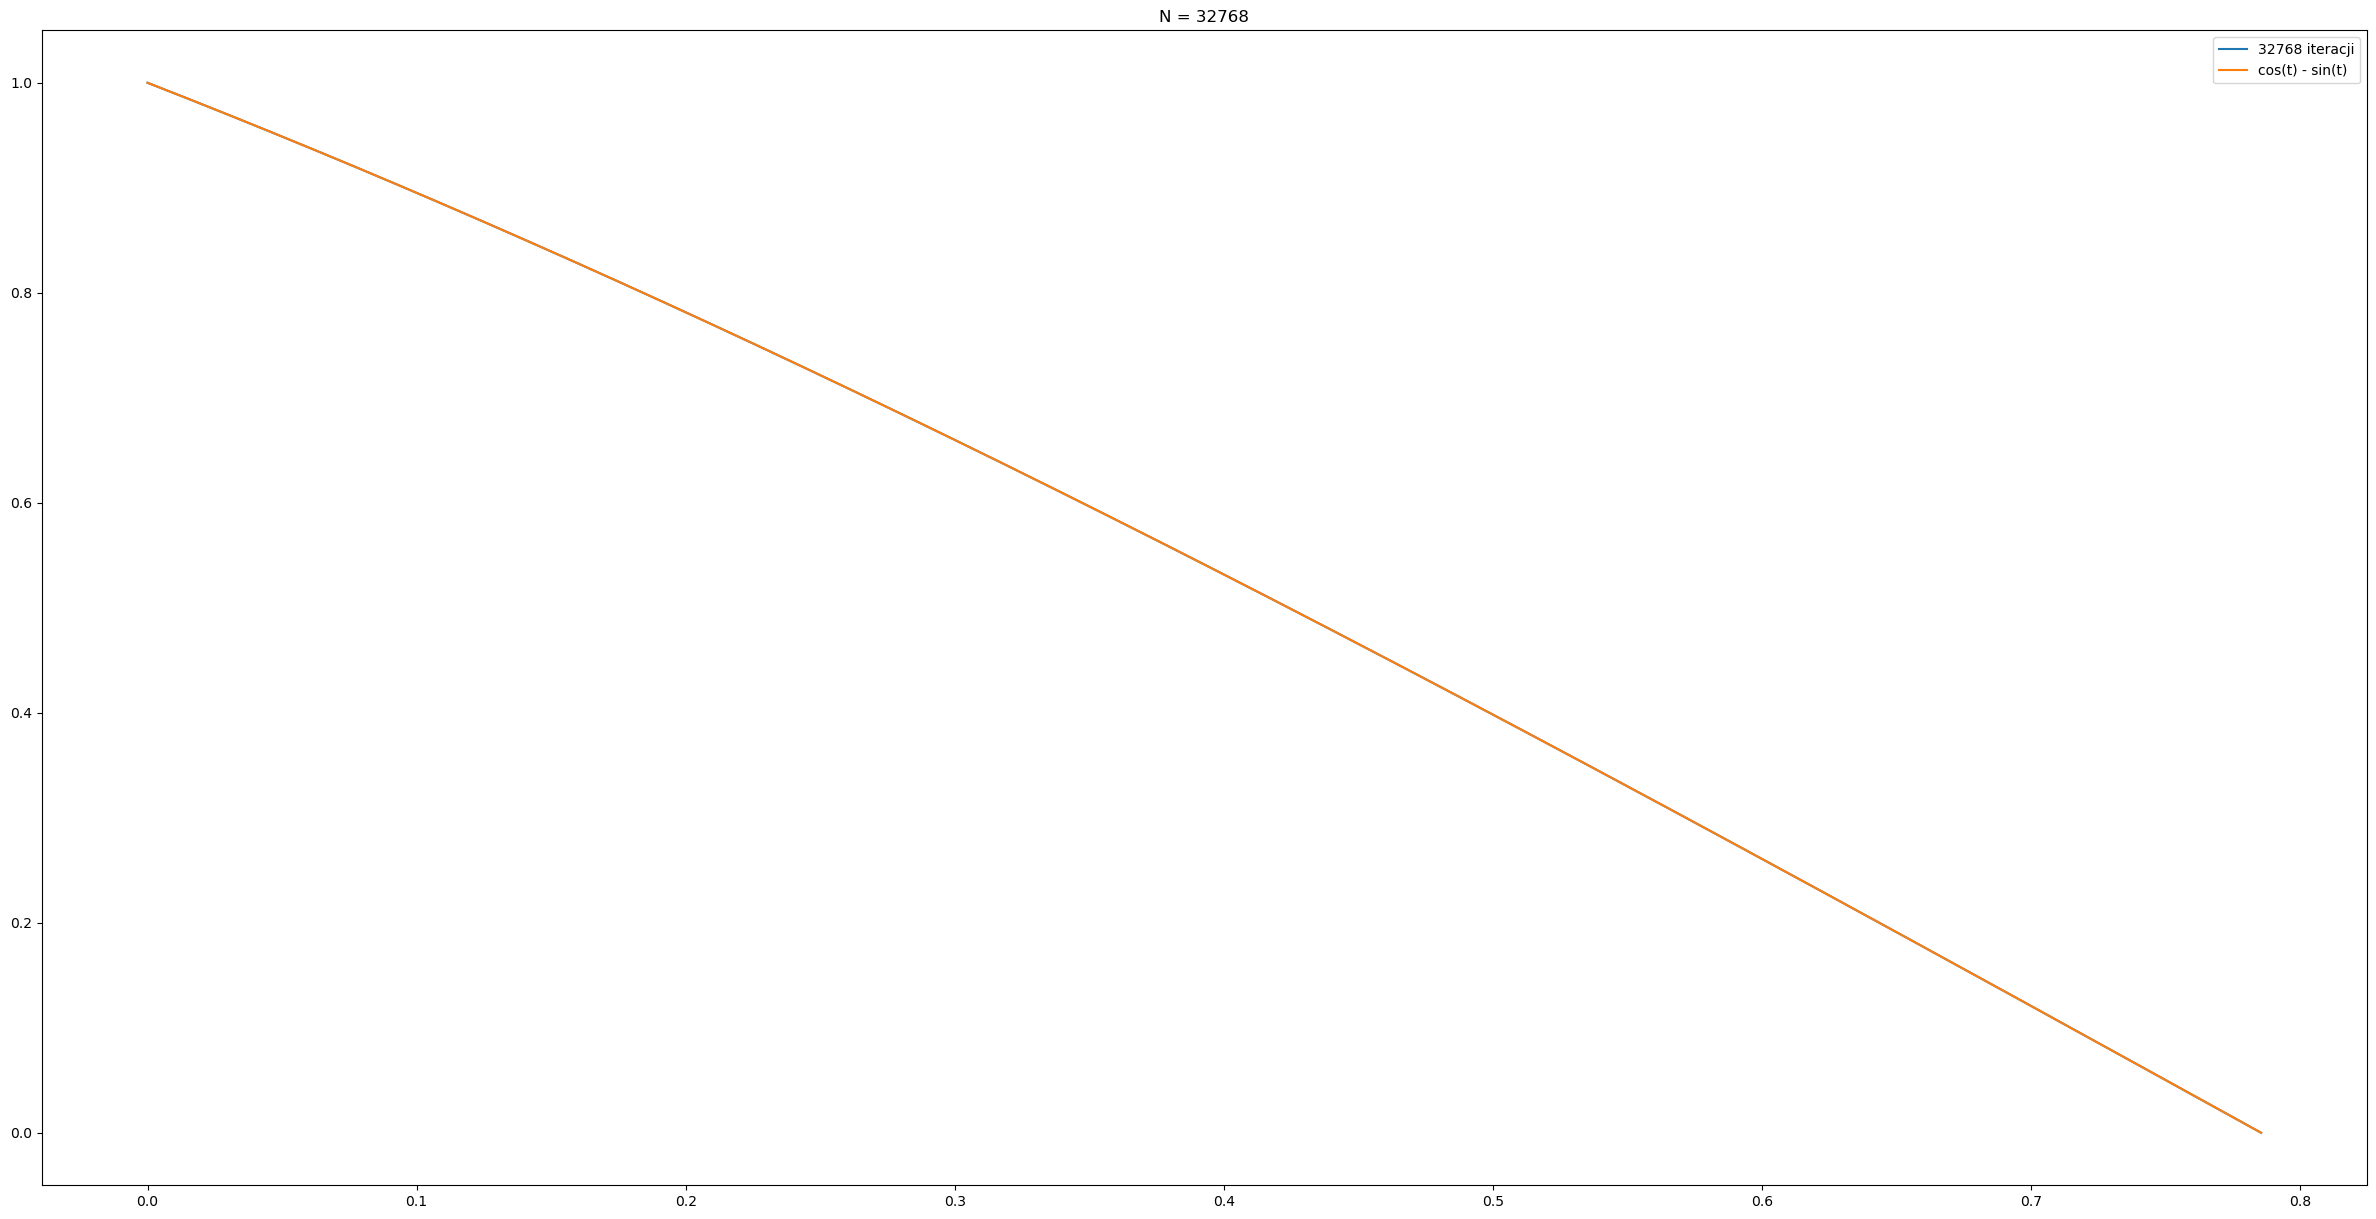

+-------+--------------+--------------------------------+-------------+
|   N   |      h       |  err(N) = |x_N - cos()+sin()|  |    P_Num    |
+=======+==============+================================+=============+
|   1   | 7.85 x 10^-1 |          2.15 x 10^-1          |     nan     |
+-------+--------------+--------------------------------+-------------+
|   2   | 3.93 x 10^-1 |          8.35 x 10^-2          | 1.36 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|   4   | 1.96 x 10^-1 |          3.58 x 10^-2          | 1.22 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|   8   | 9.82 x 10^-2 |          1.65 x 10^-2          | 1.12 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|  16   | 4.91 x 10^-2 |          7.93 x 10^-3          | 1.06 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|  32   | 2.45 x 10^-2 |          3.89 x 10^-3          | 1.03 x

In [34]:
def x_prim(x, t):
    return -x*np.tan(t) - 1/np.cos(t)
T_0 = 0.0
T = np.pi/4
X_0 = 1.0
 
results = {"N": [], "h":[], "err(N) = |x_N - cos()+sin()|":[], 'P_Num':[]}
prev_error = None
N=1
for _ in range(1,16):
    plt.figure(figsize=(30,15))
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad_punkty = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
            if i == 0:
                rozwiazania[i] = X_0
                continue
            rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
            blad_punkty[i] = np.abs(rozwiazania[i] - (np.cos(wezel) - np.sin(wezel)))
    blad_end = np.abs(rozwiazania[-1] - (np.cos(T) - np.sin(T)))
    if prev_error is not None:
        p_num = np.log2(prev_error/blad_end)
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - cos()+sin()|"].append(blad_end)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    N = N*2
    plt.plot(wezly, rozwiazania, label = f"{N} iteracji")
    plt.plot(wezly, np.cos(wezly) - np.sin(wezly), label = "cos(t) - sin(t)")
    plt.legend()
    plt.title(f'N = {N}')
    plt.show()
 
results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - cos()+sin()|', 'P_Num']]
res = results.copy()
for col in ['h','err(N) = |x_N - cos()+sin()|', 'P_Num']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex = False))


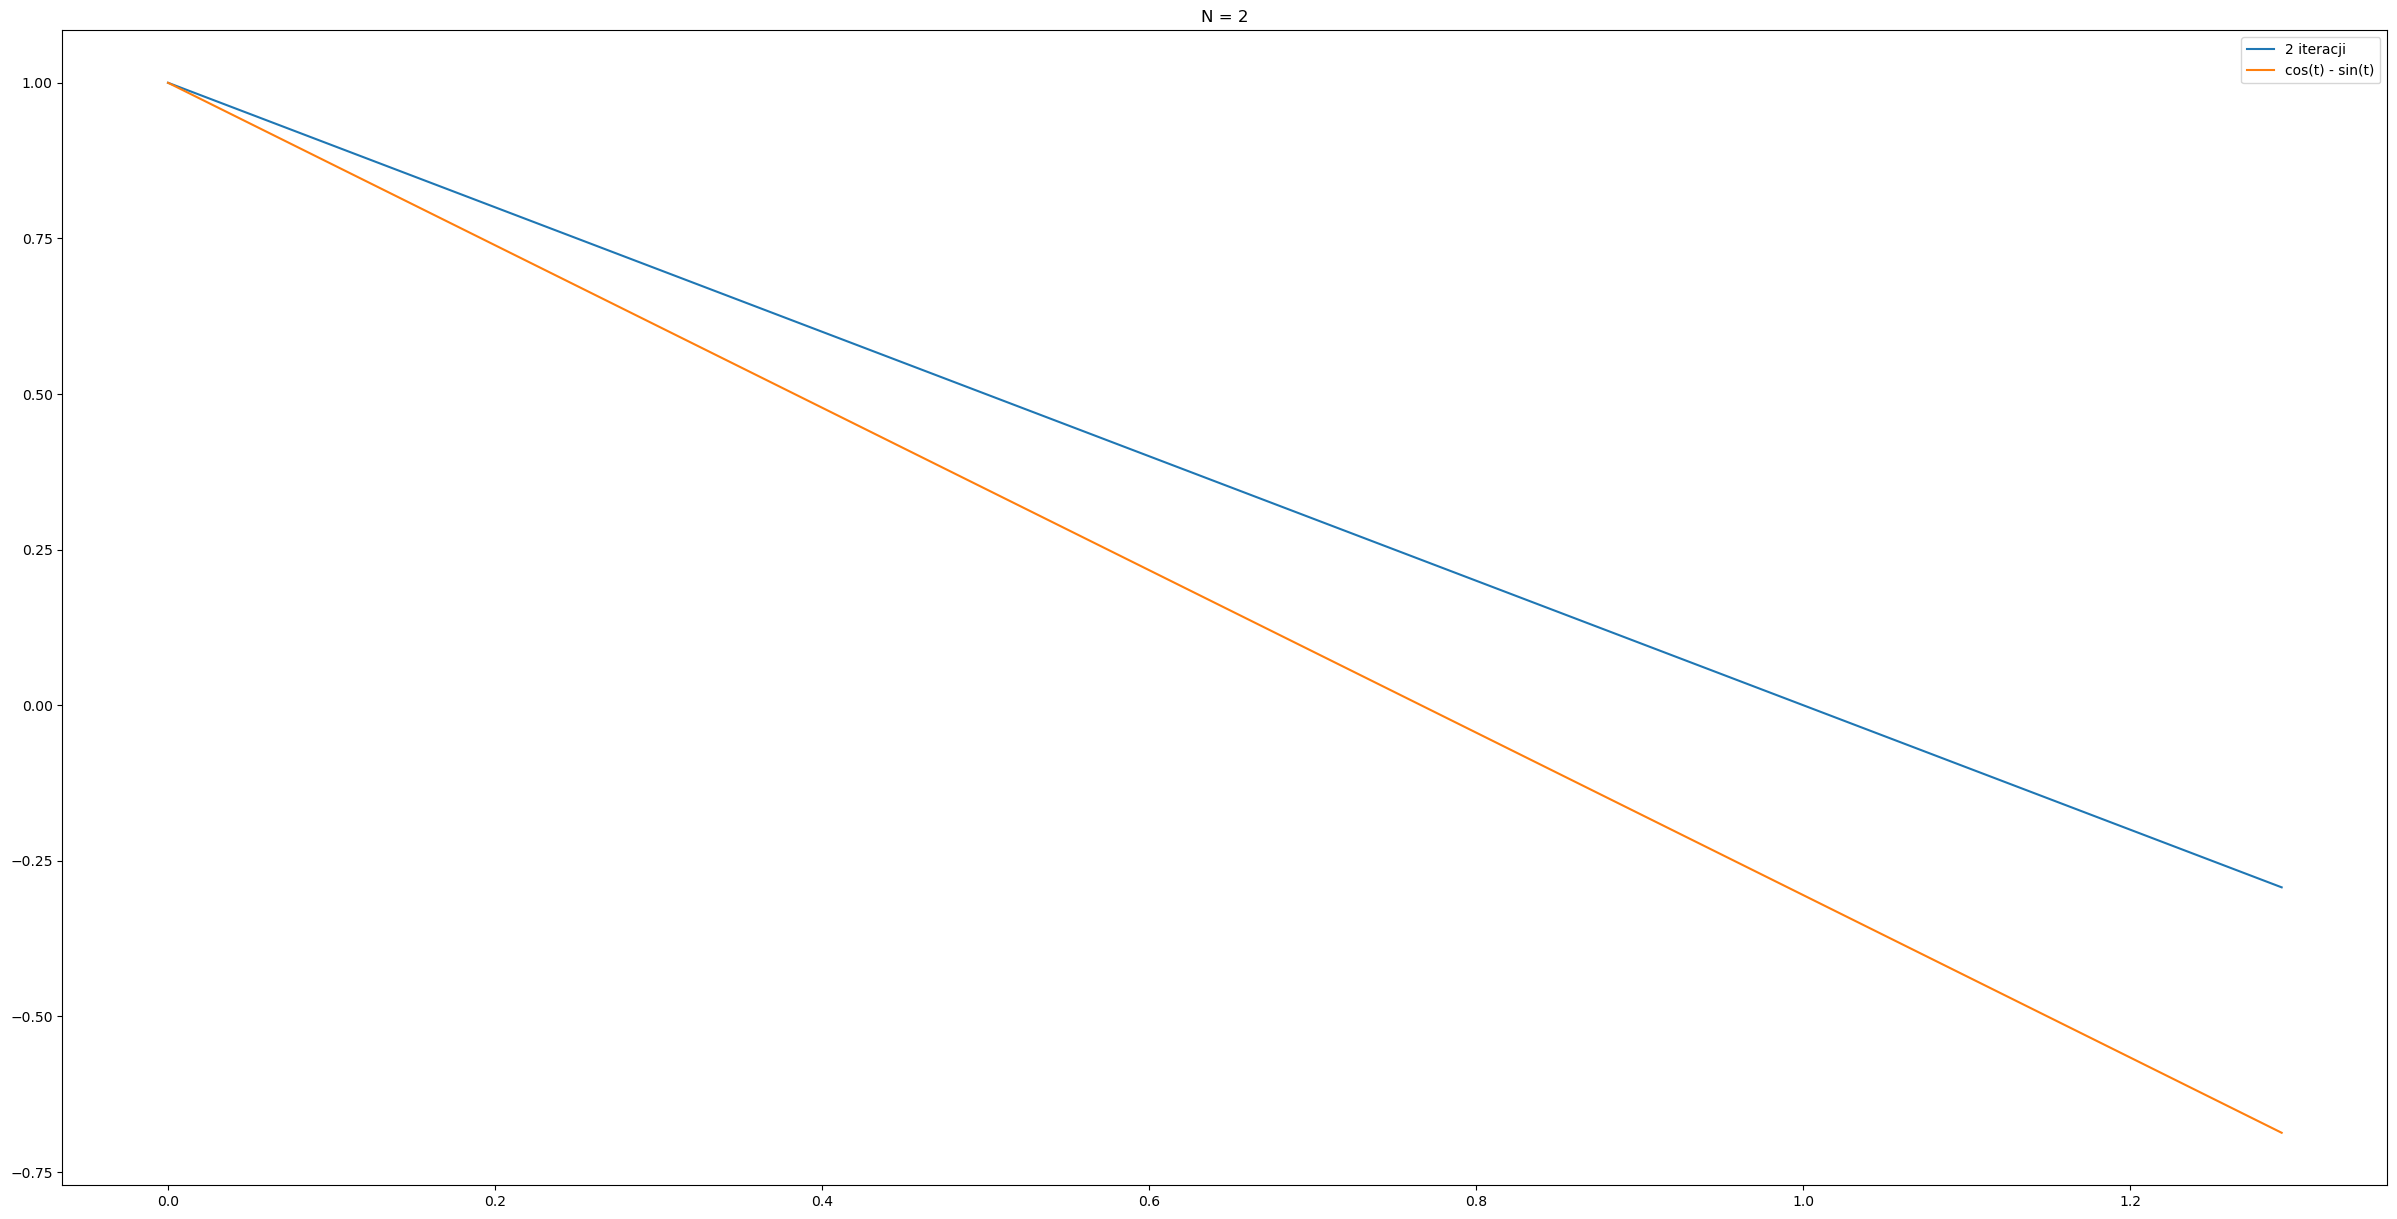

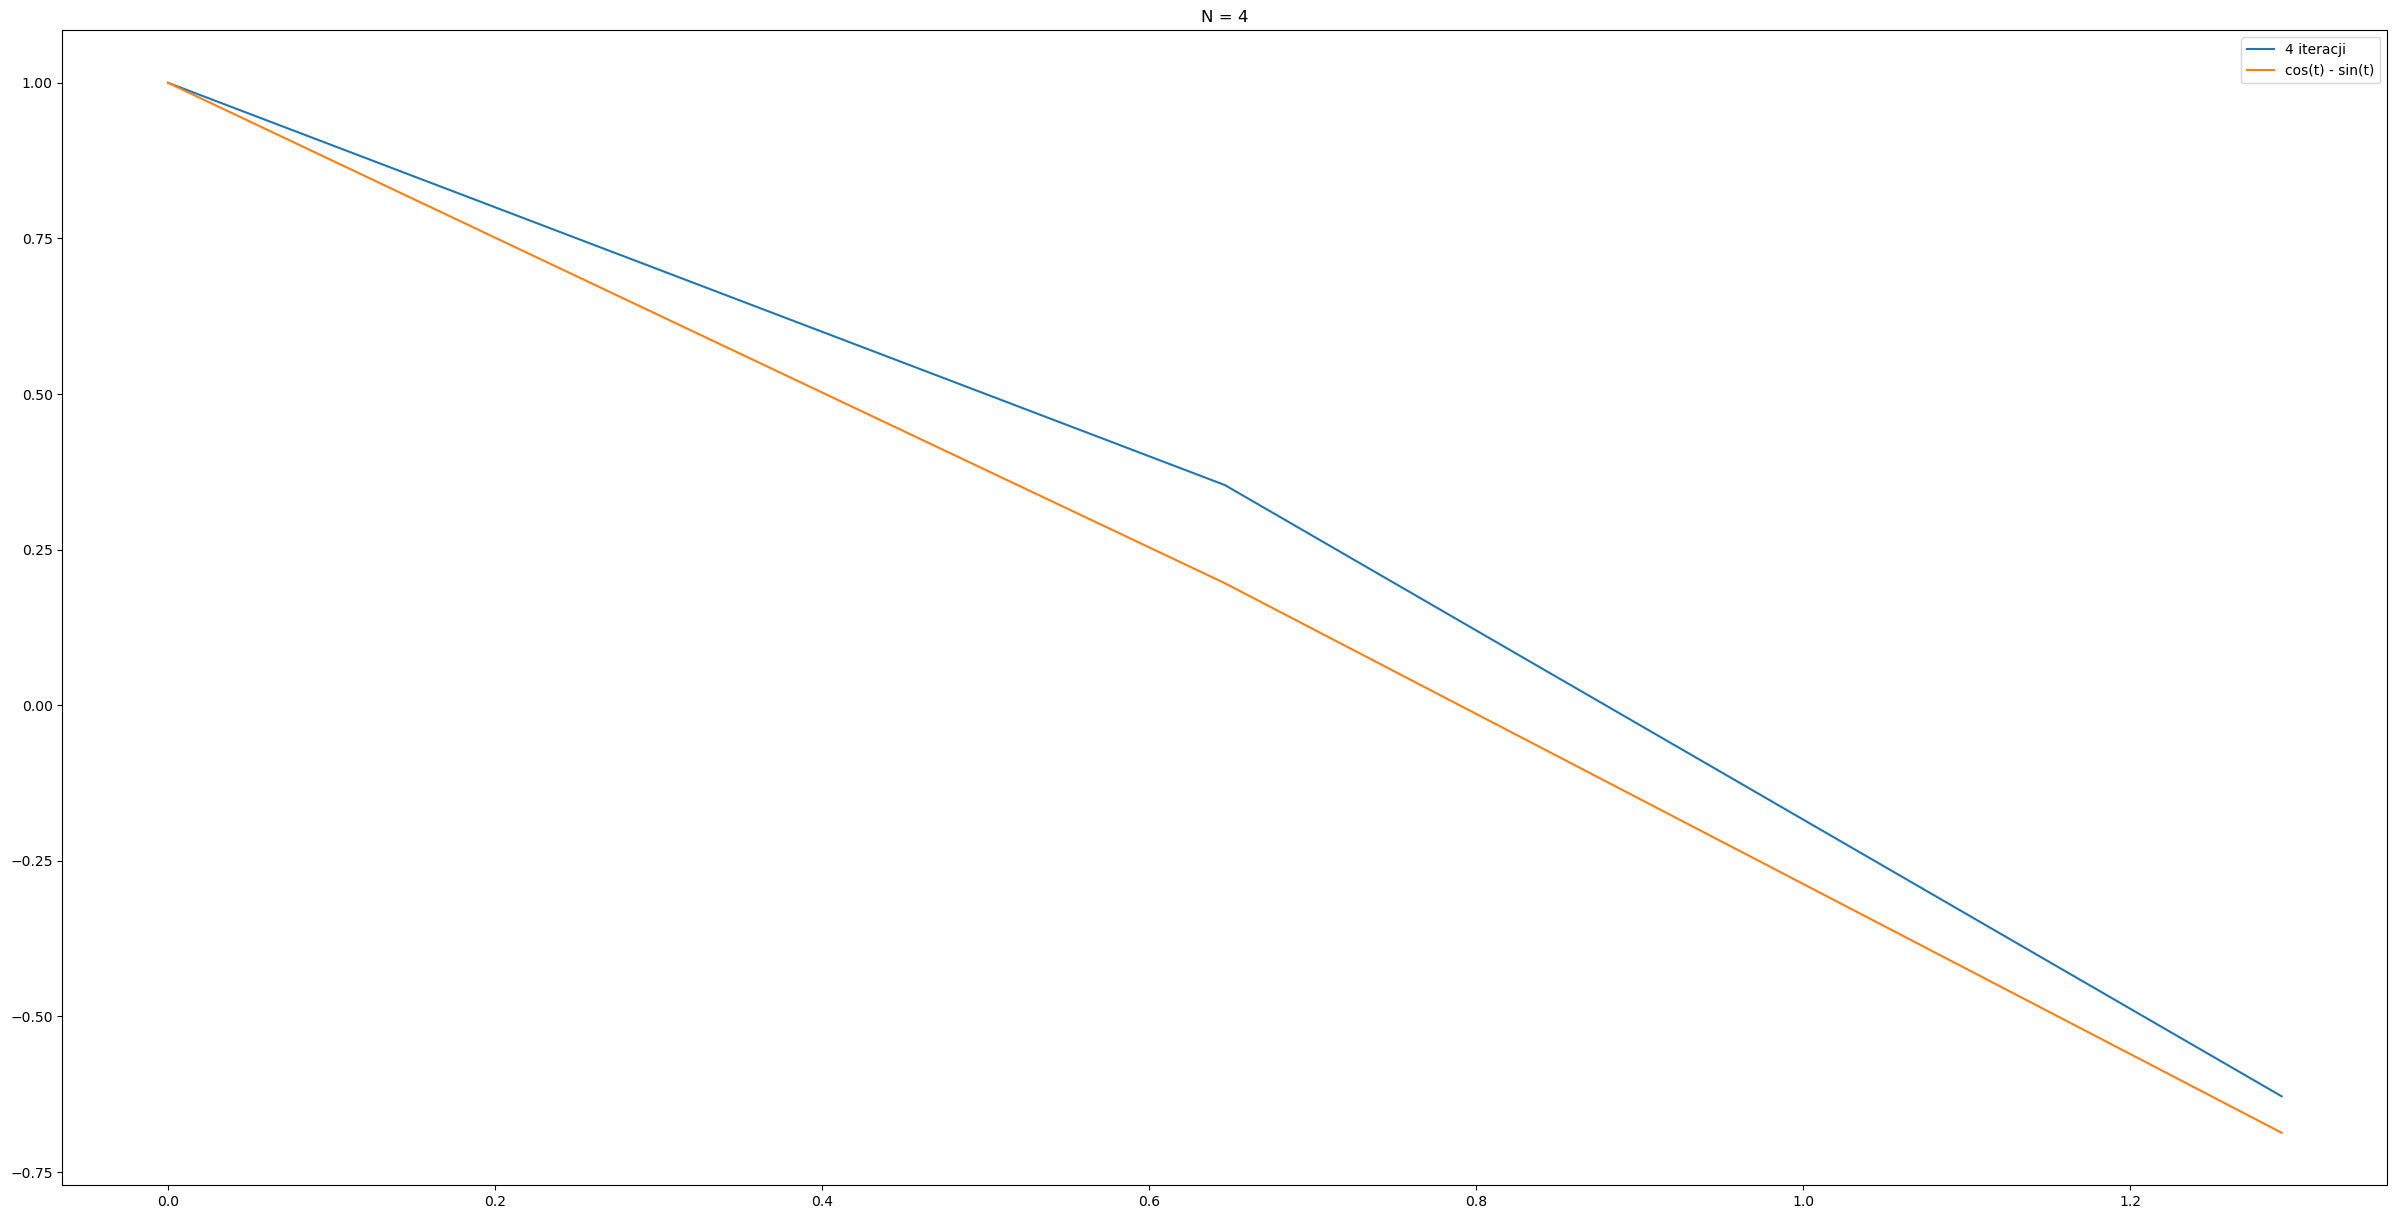

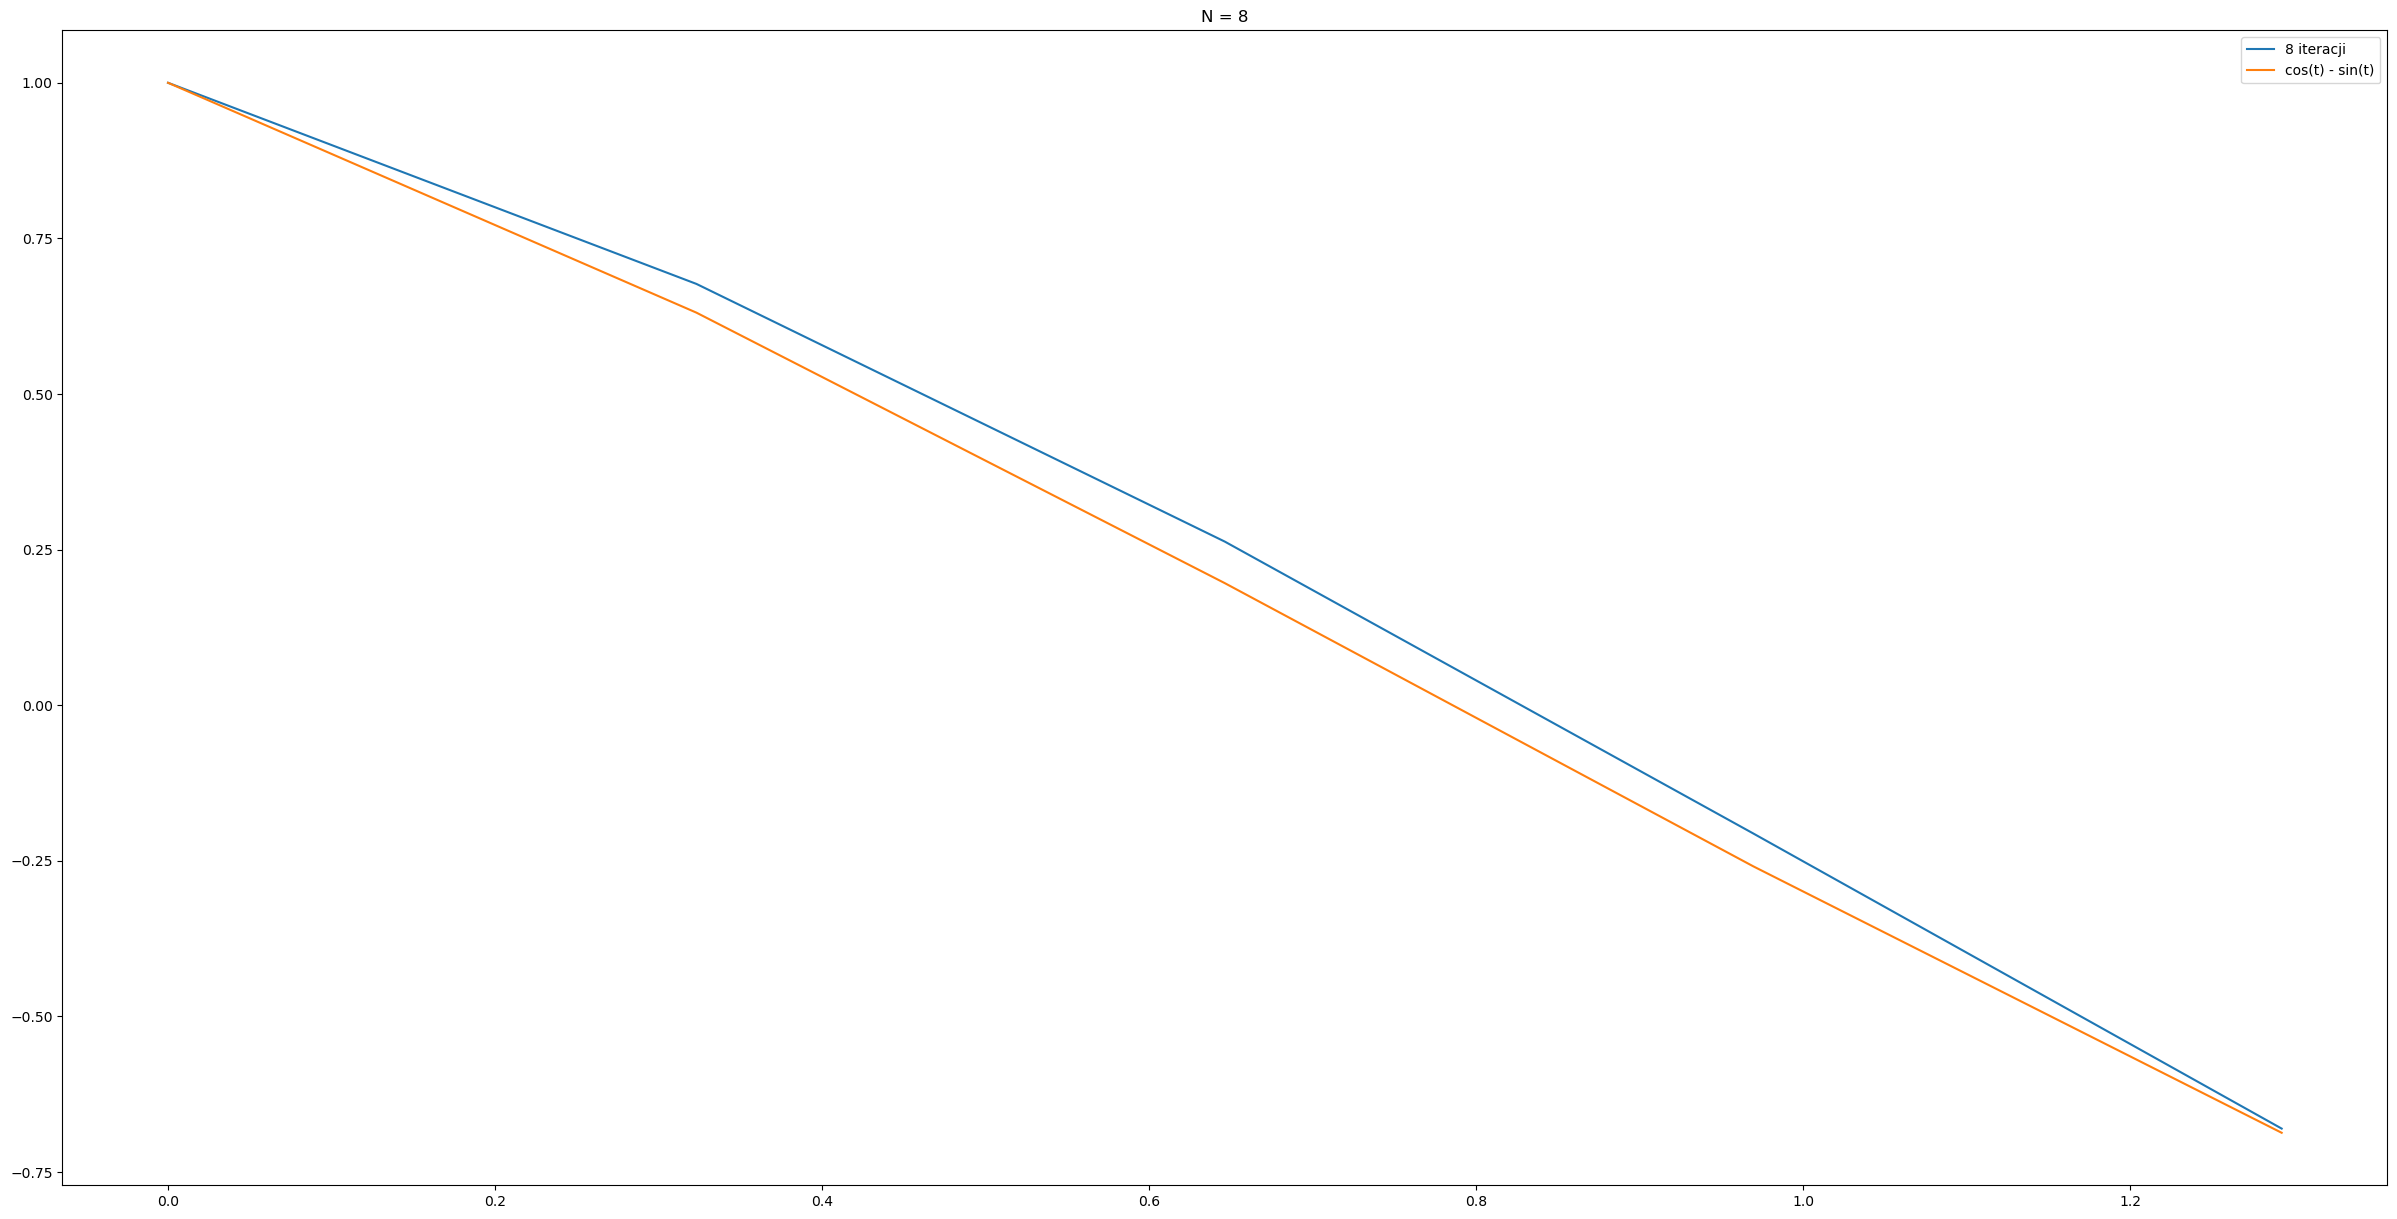

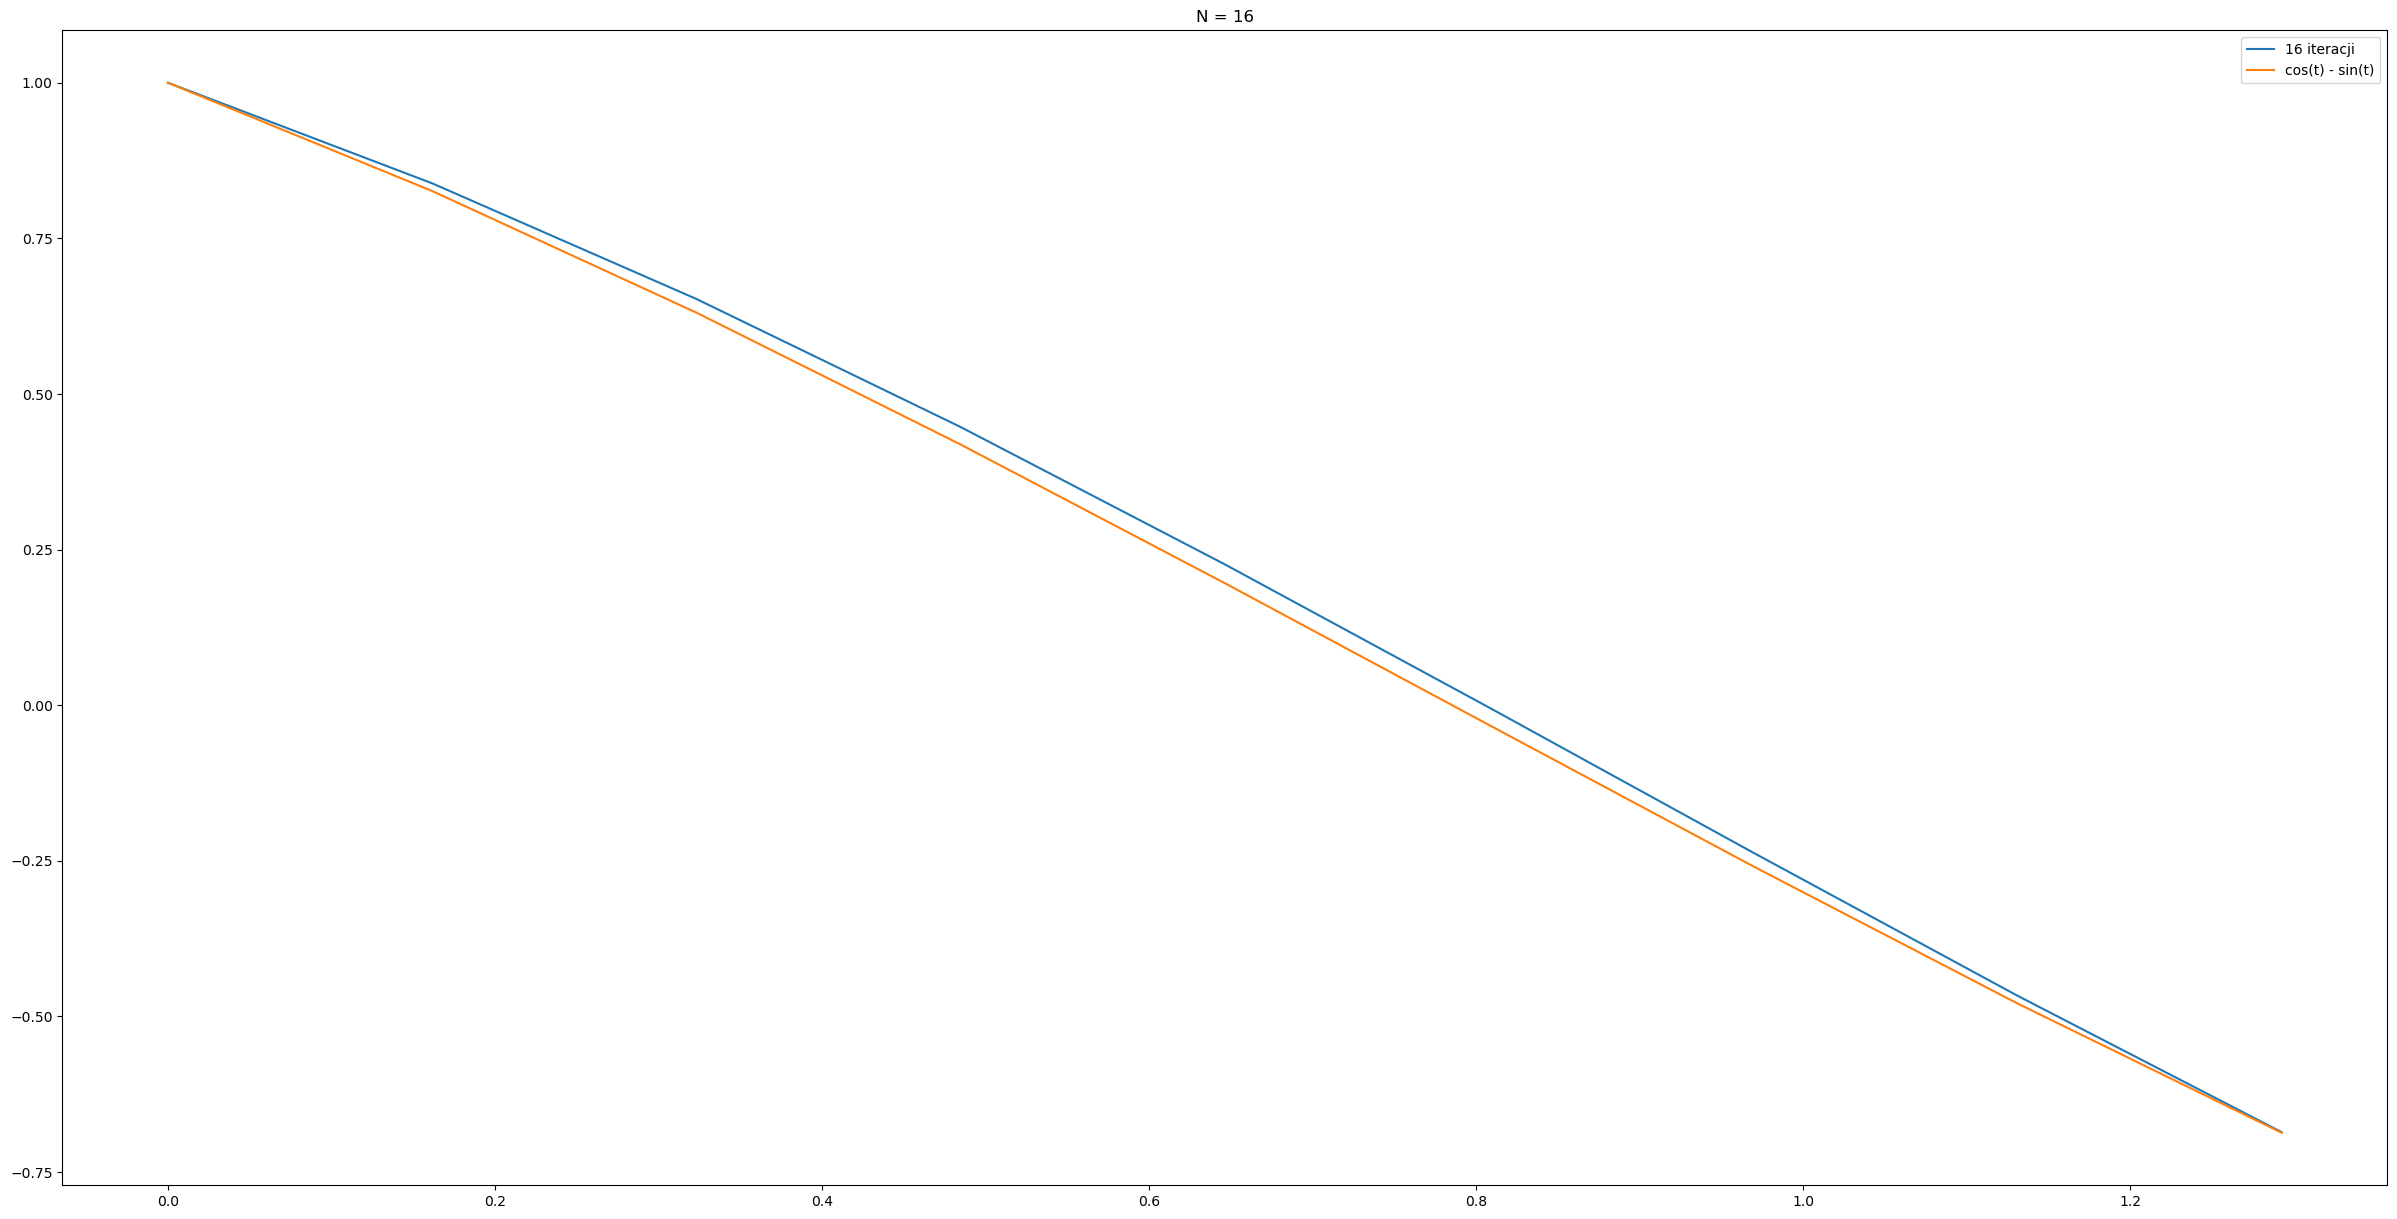

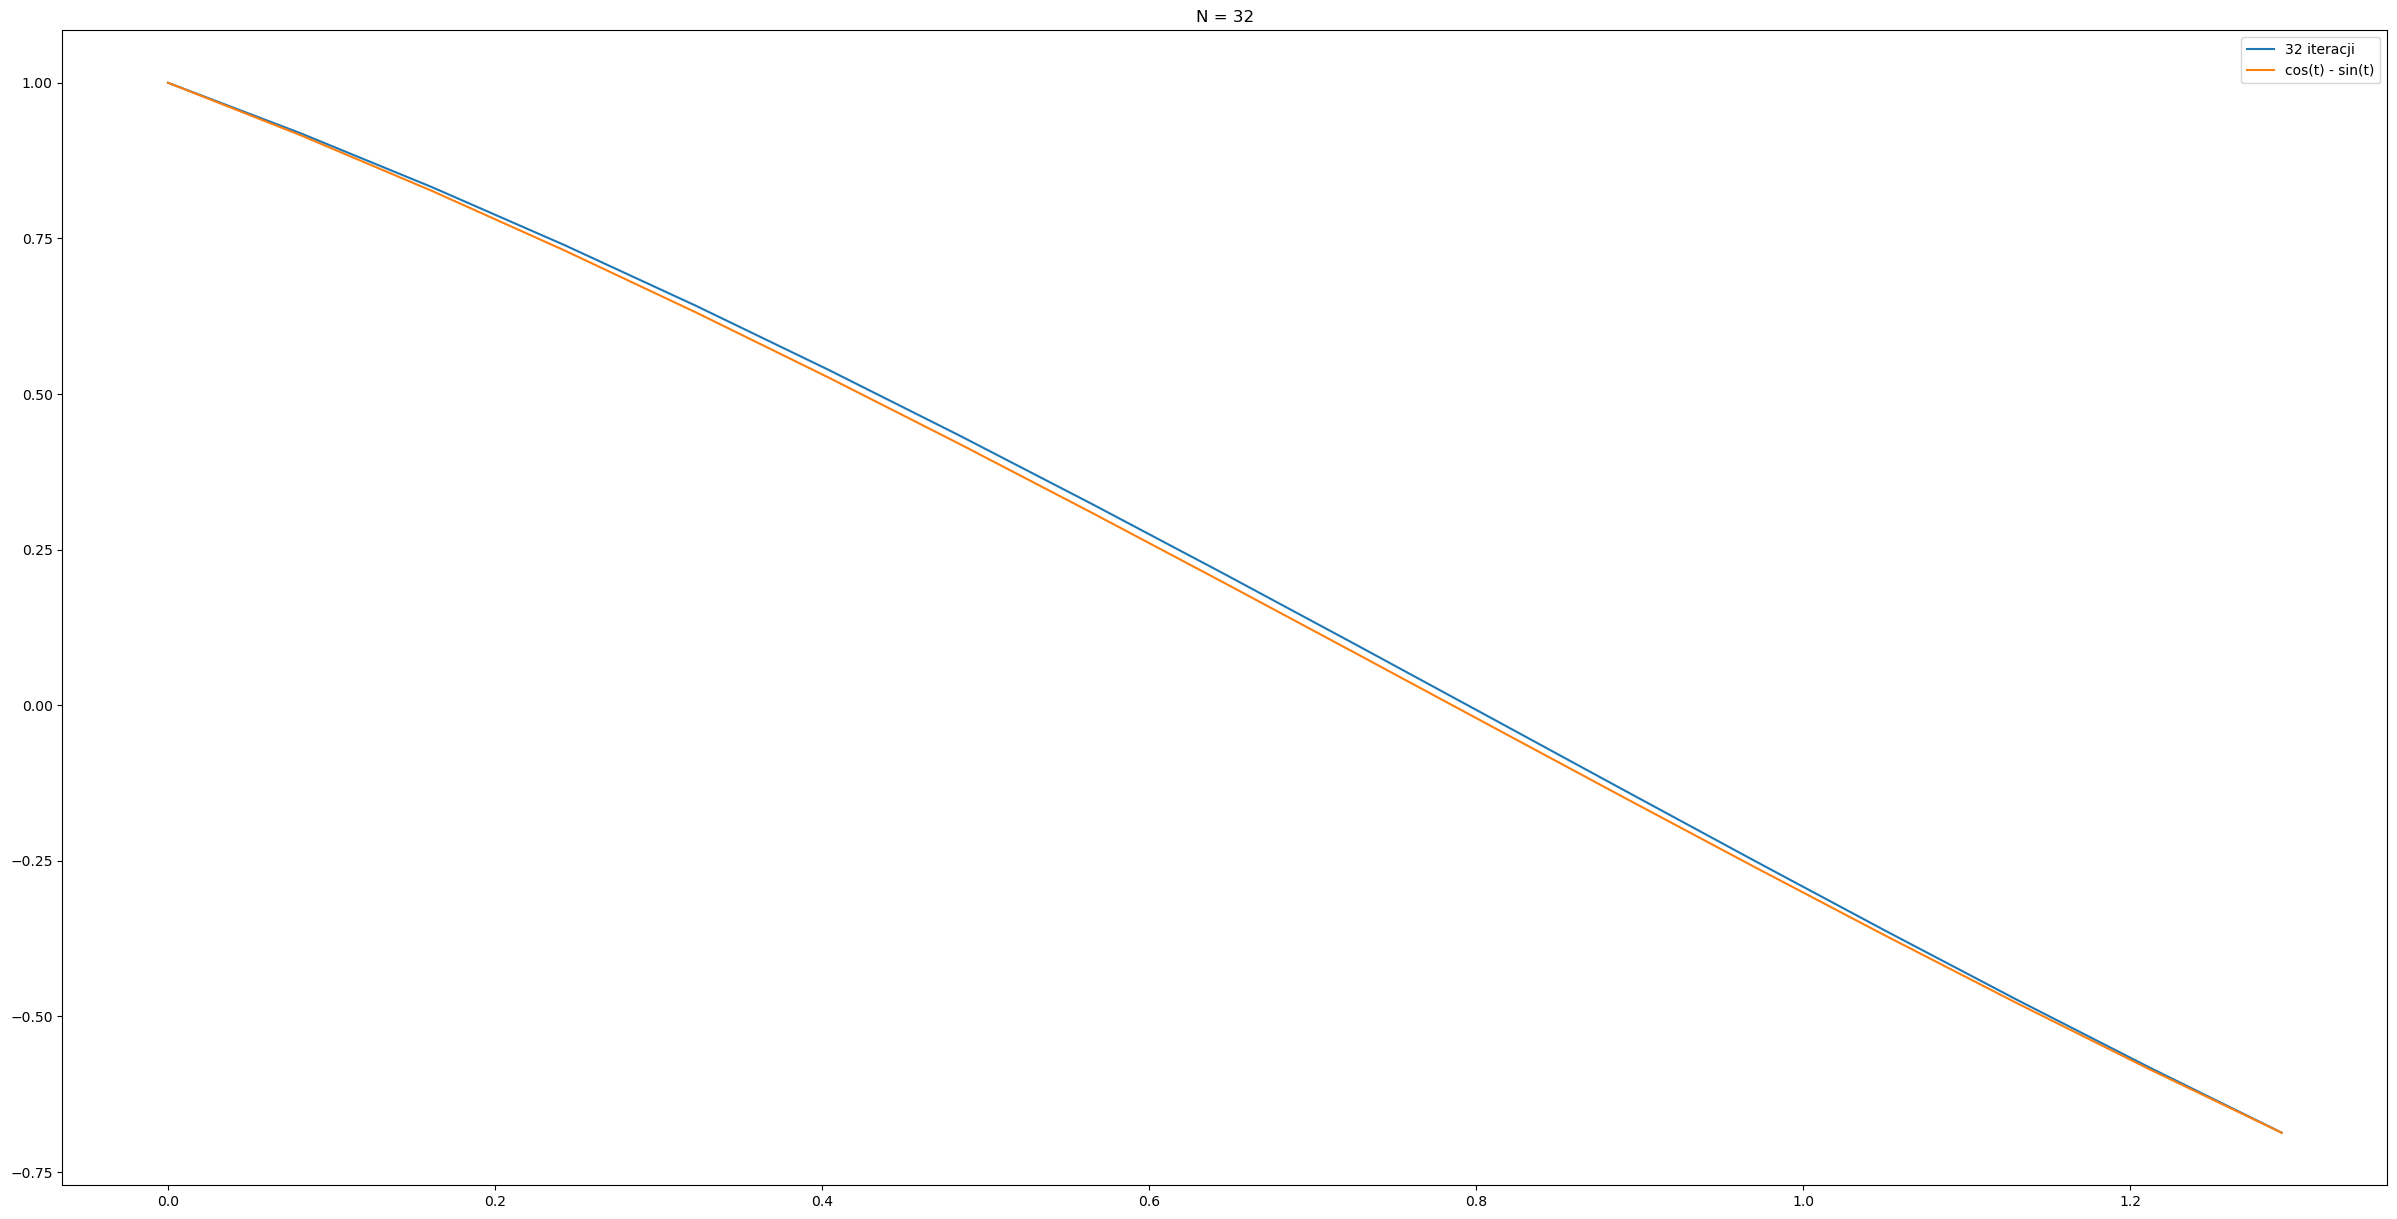

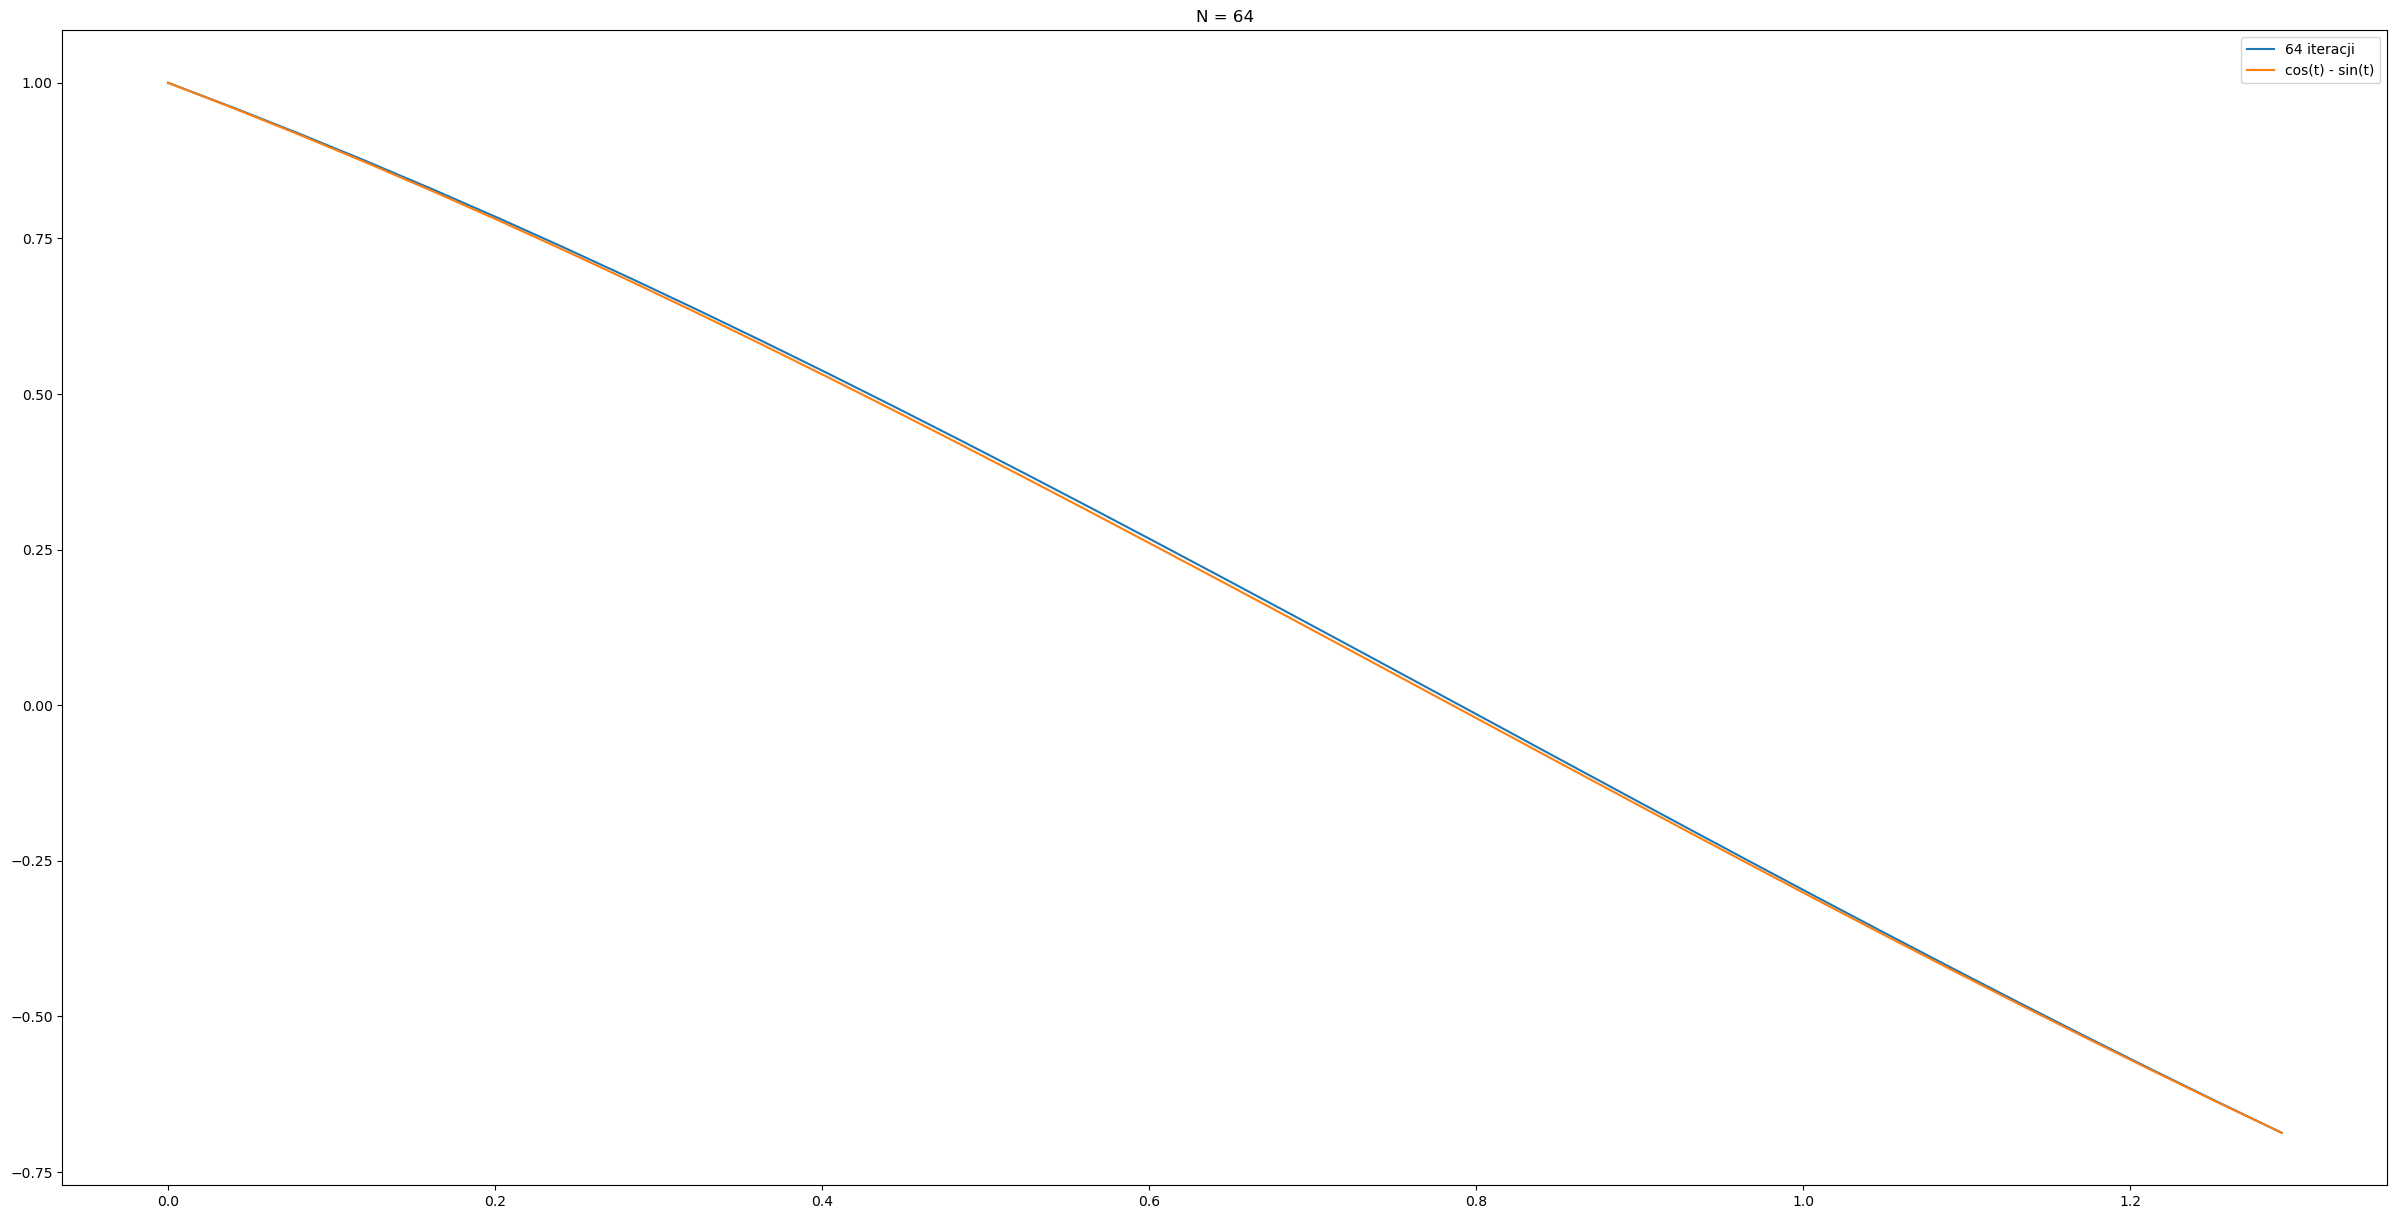

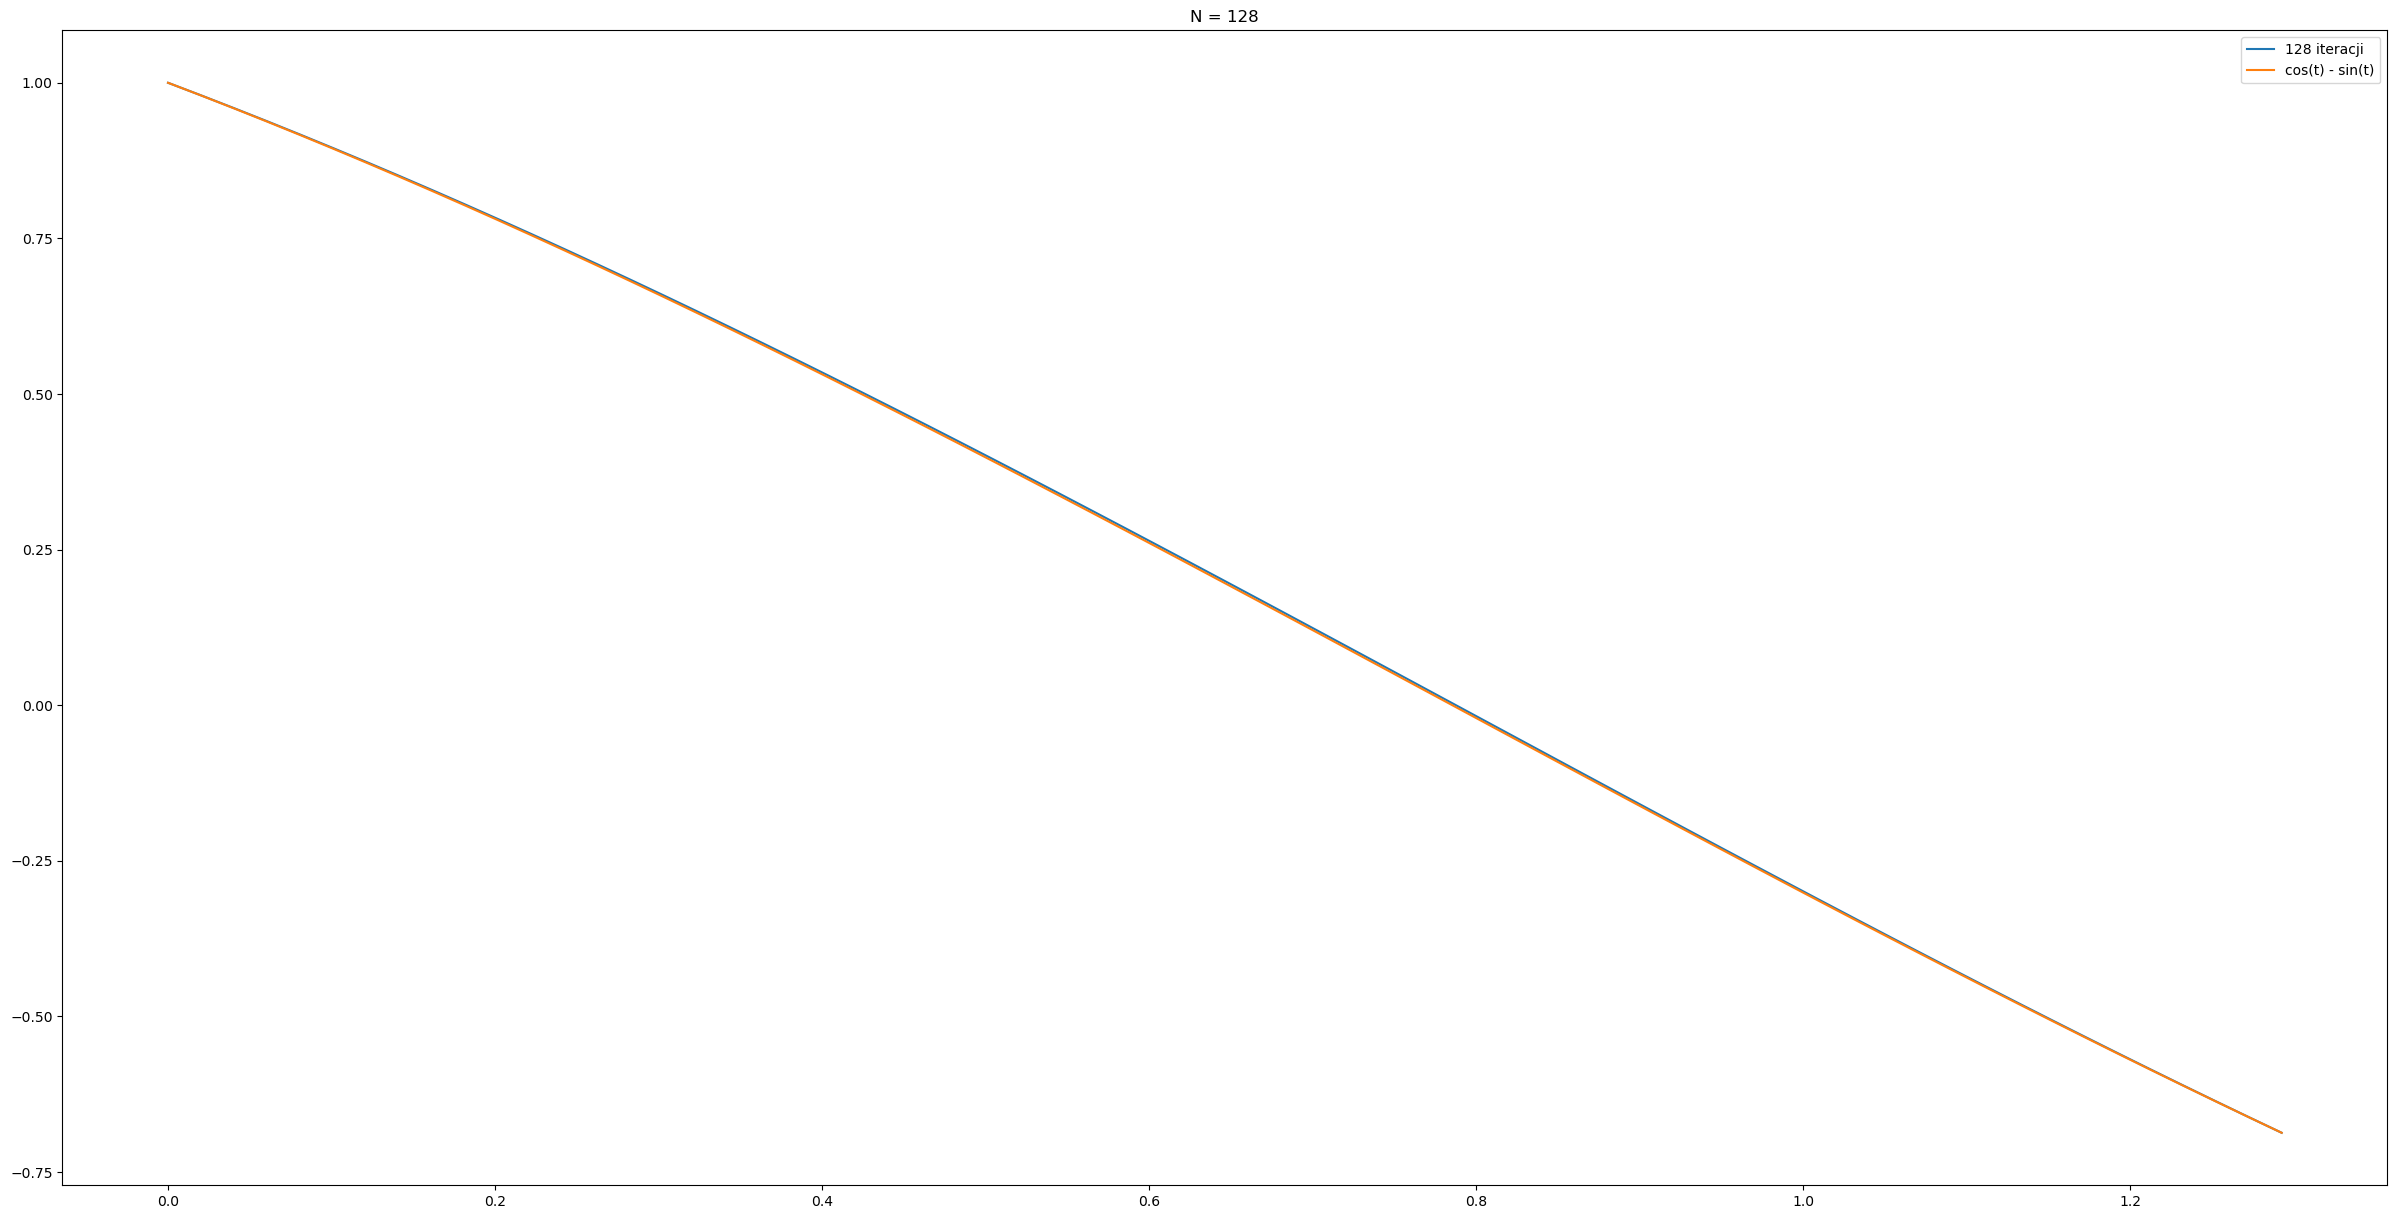

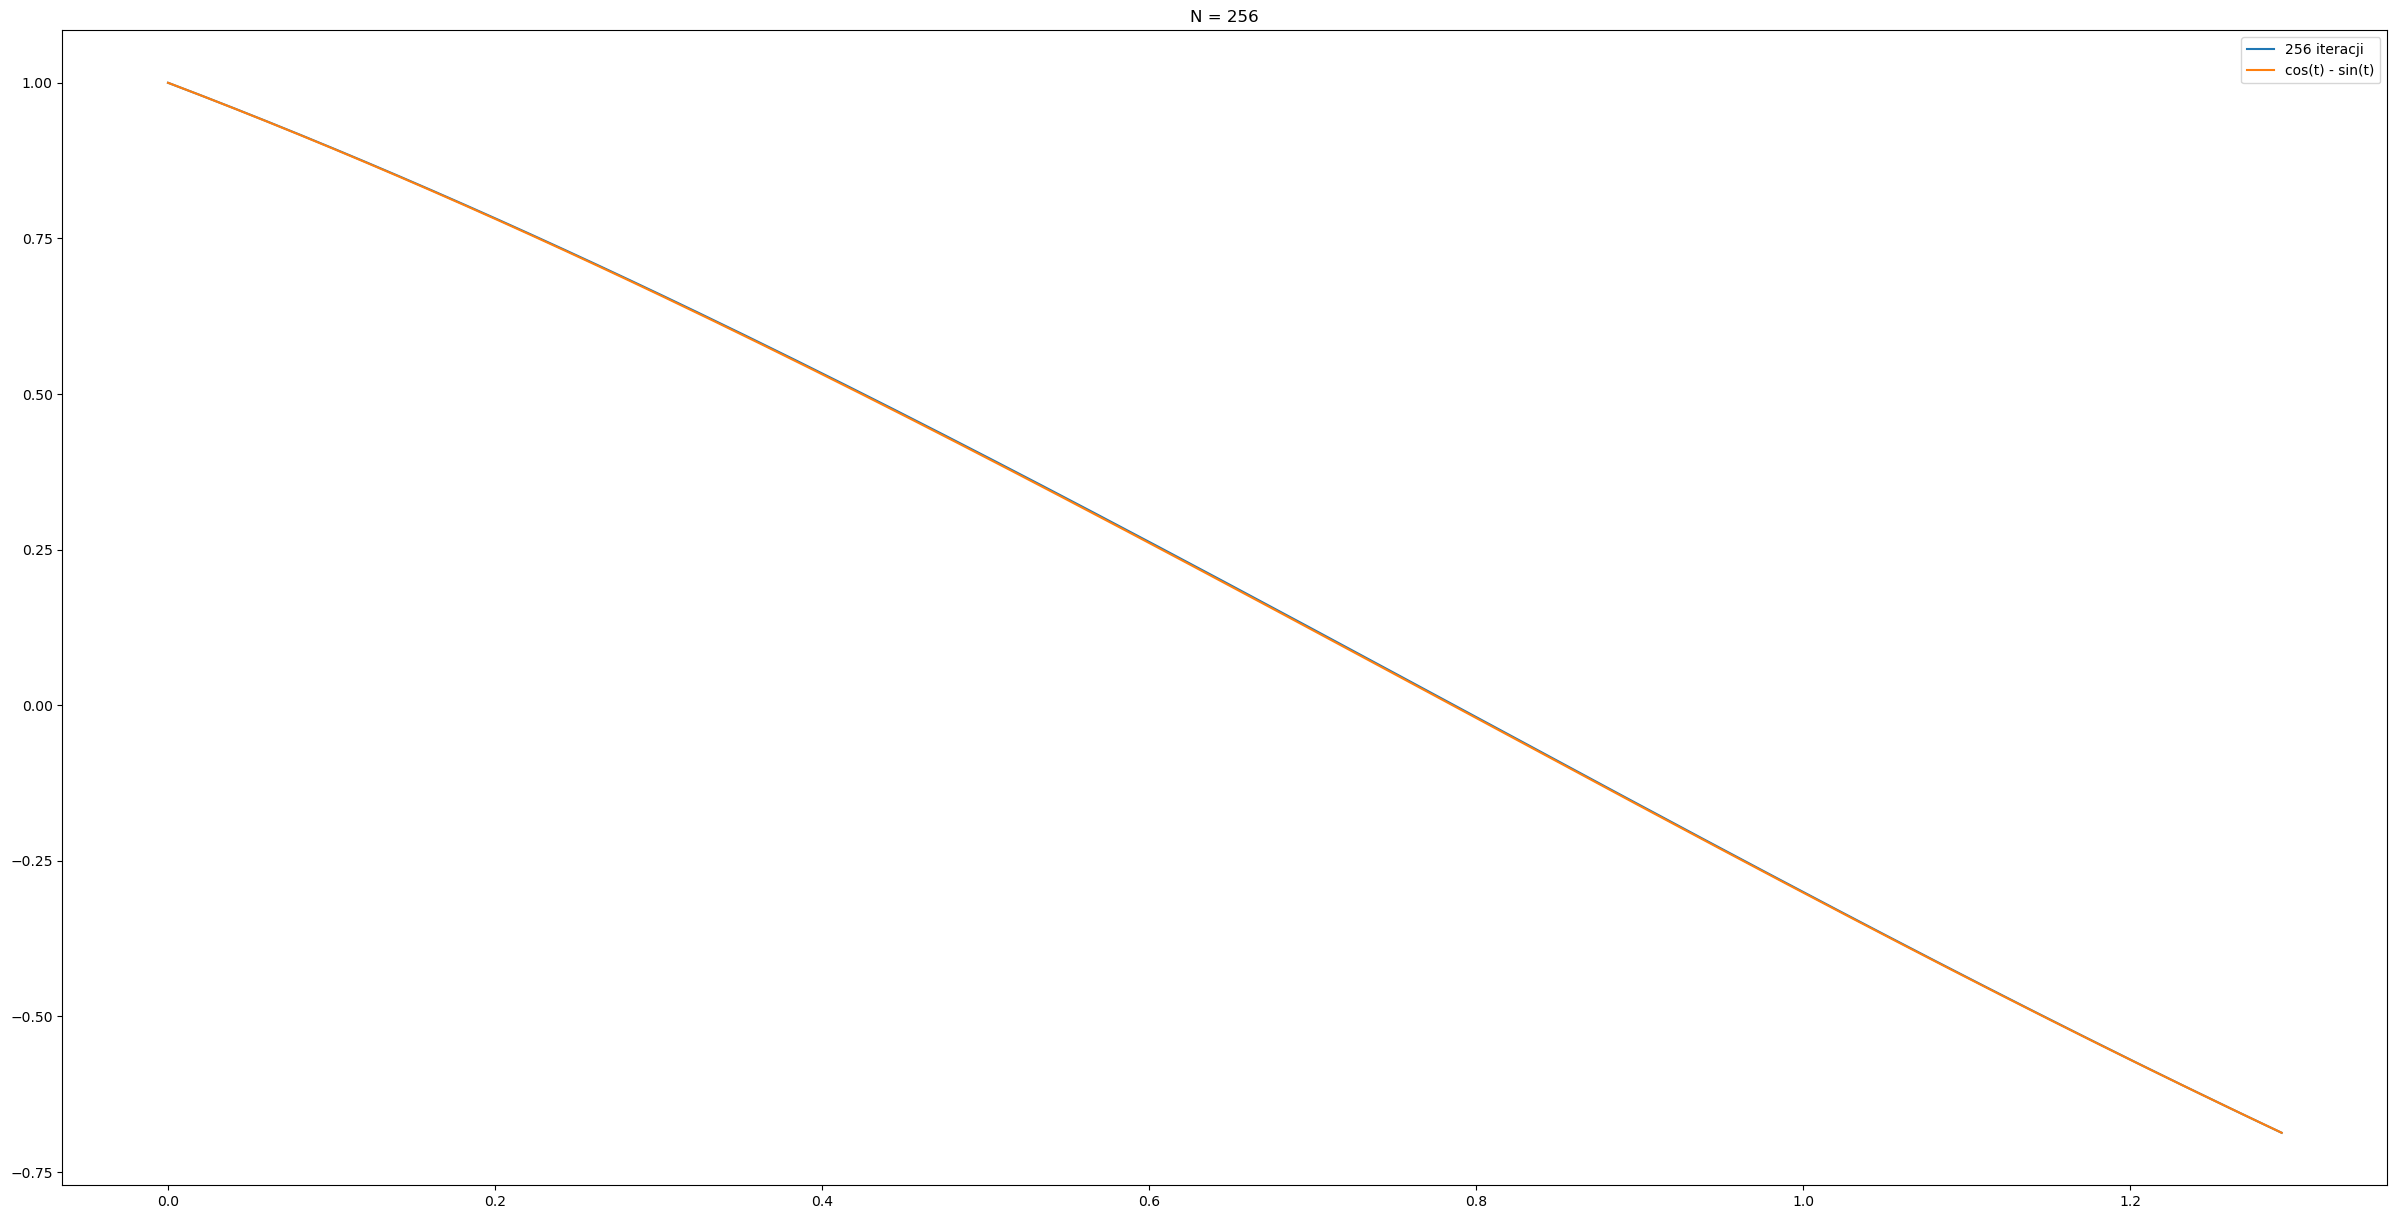

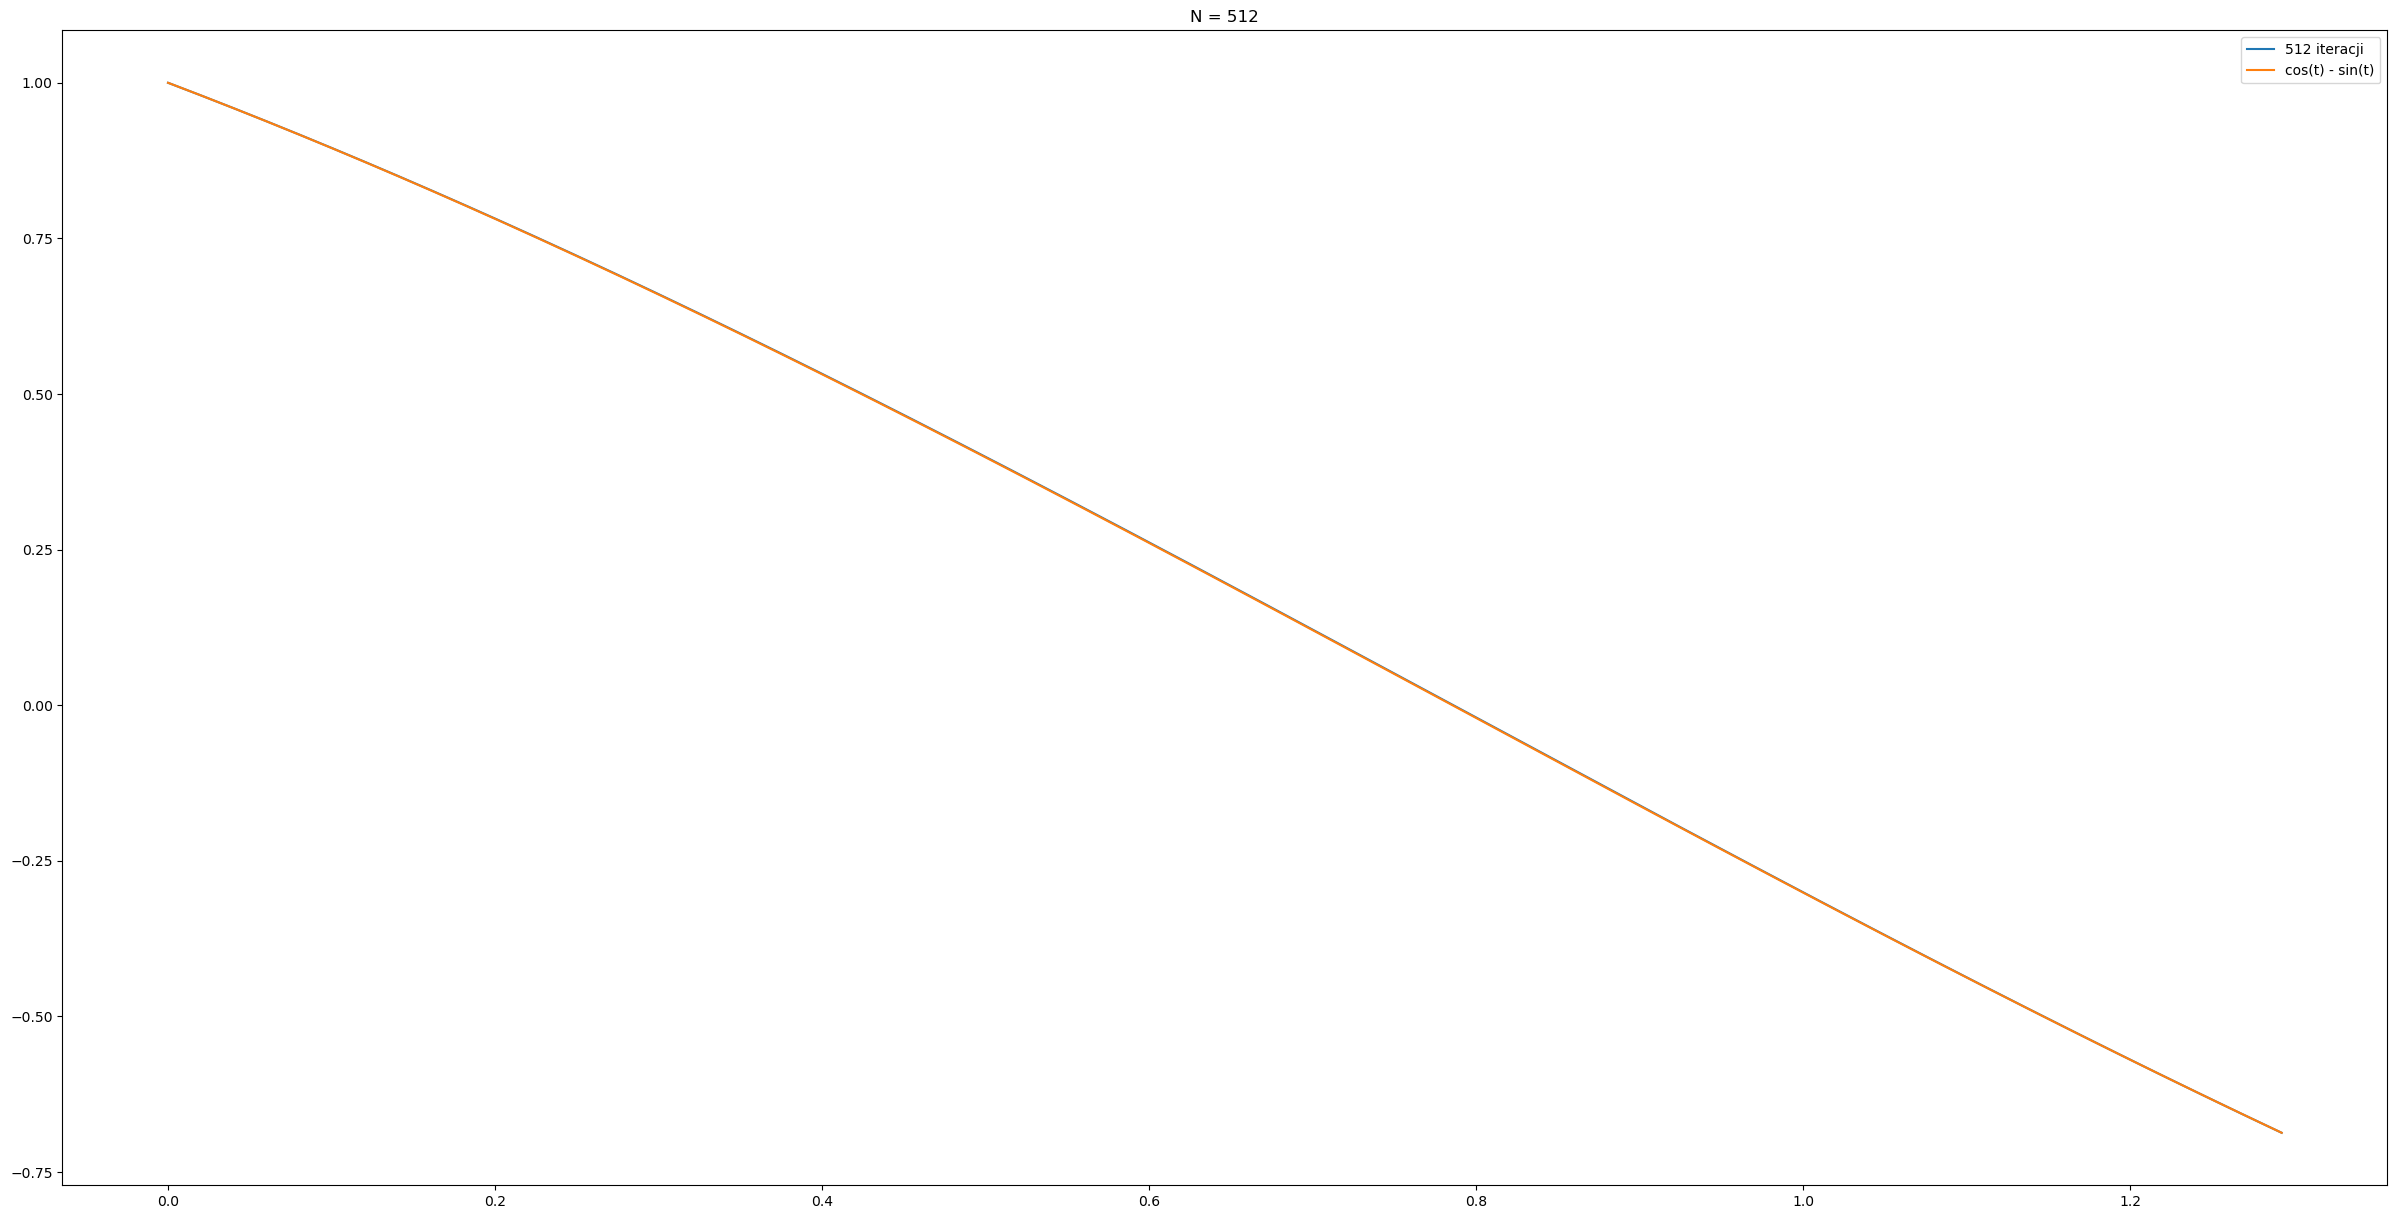

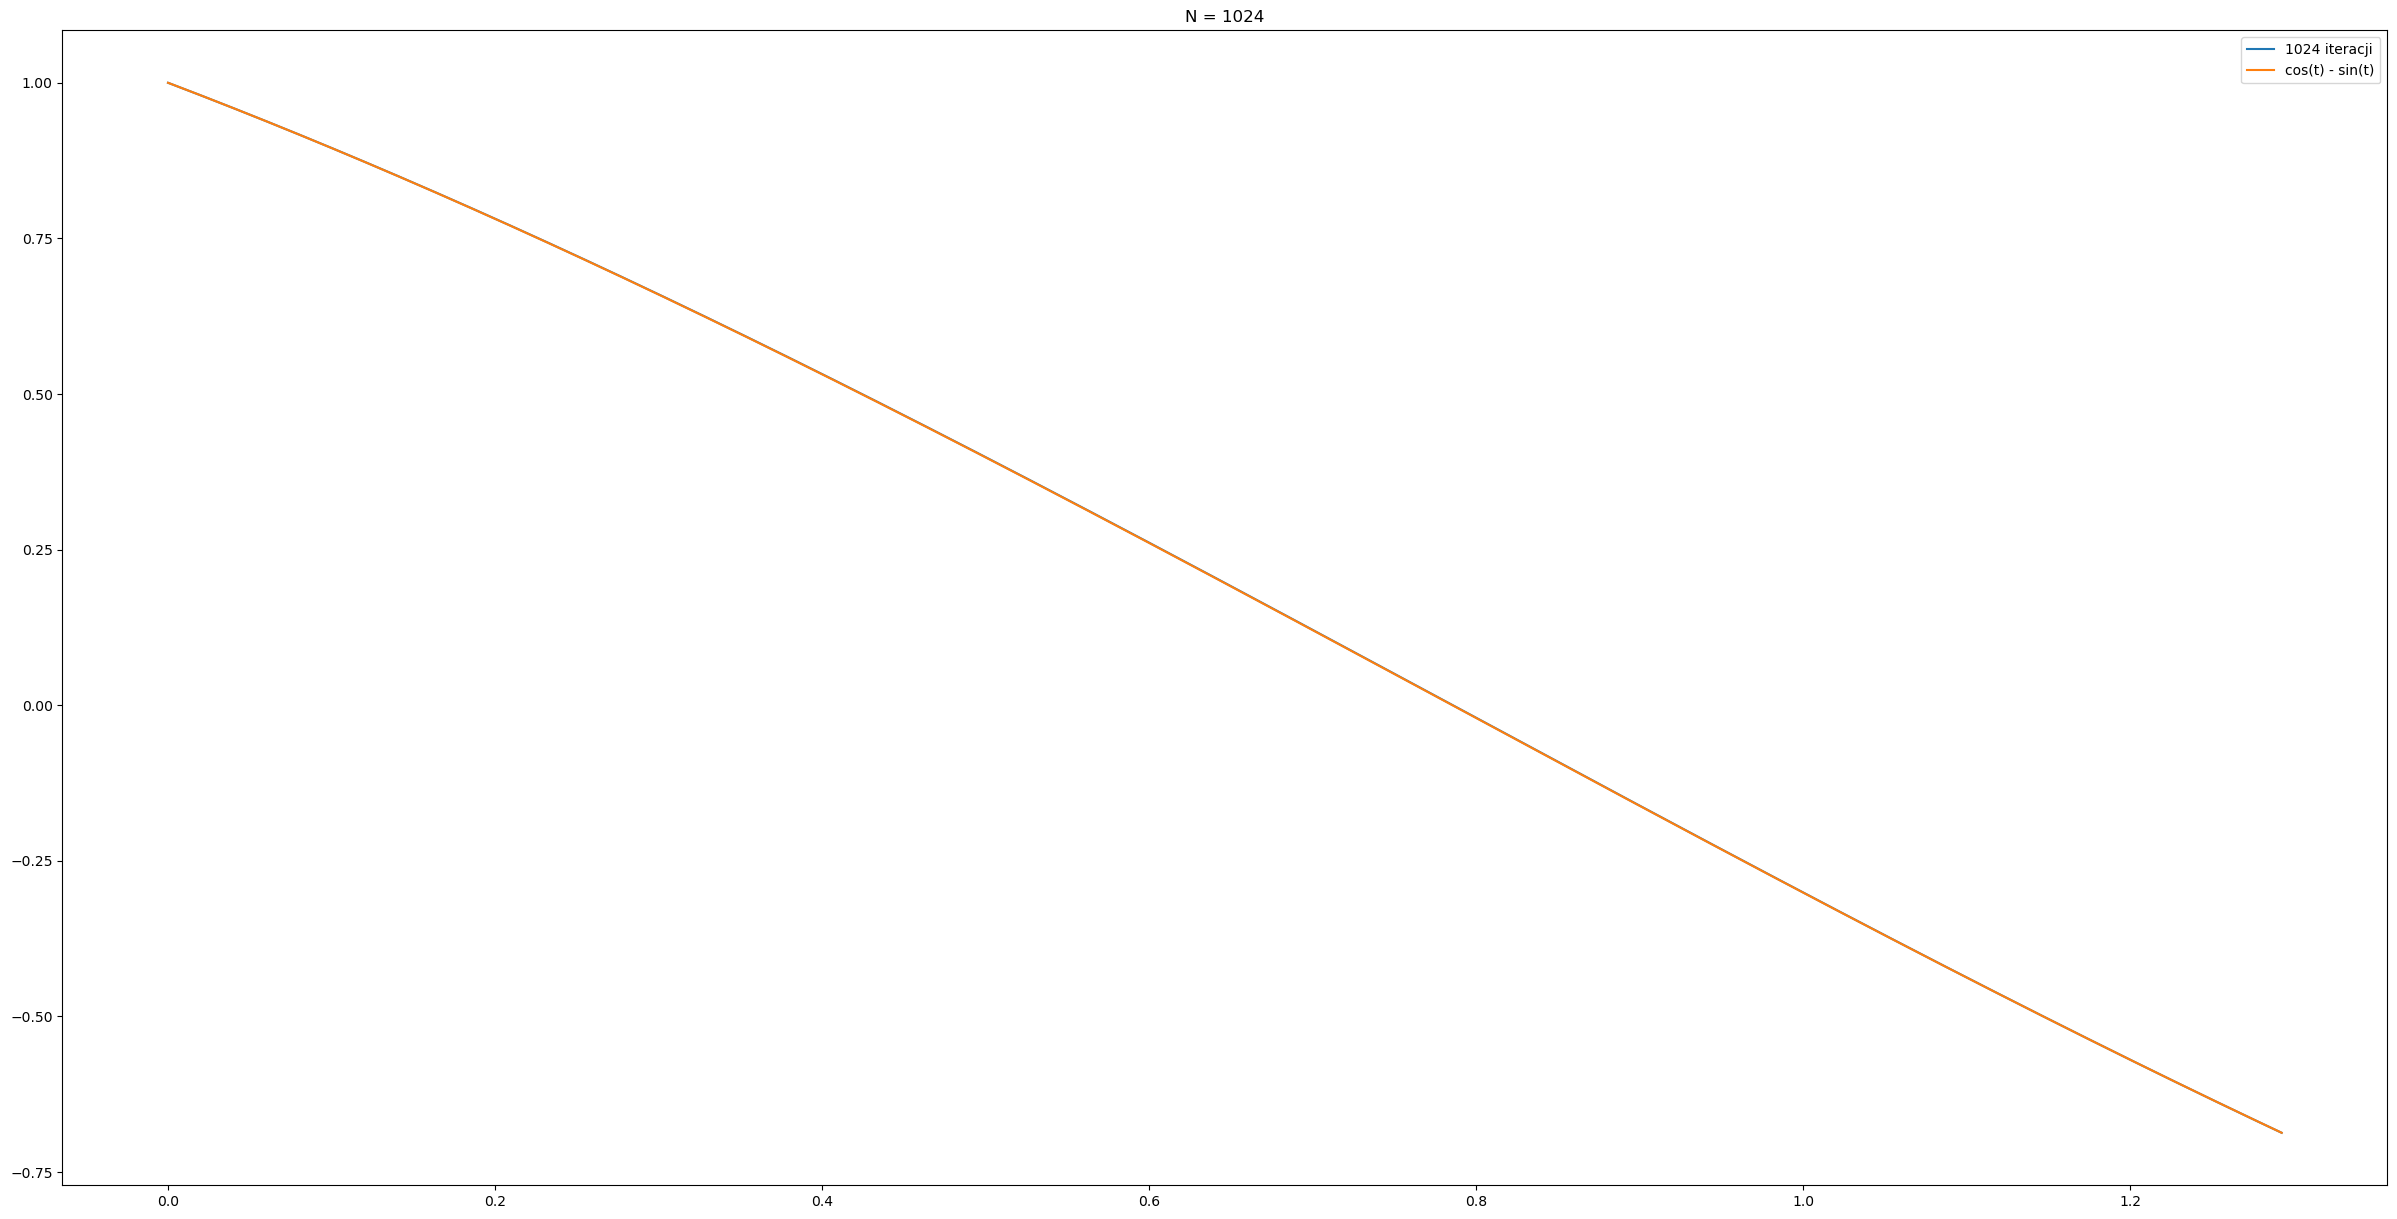

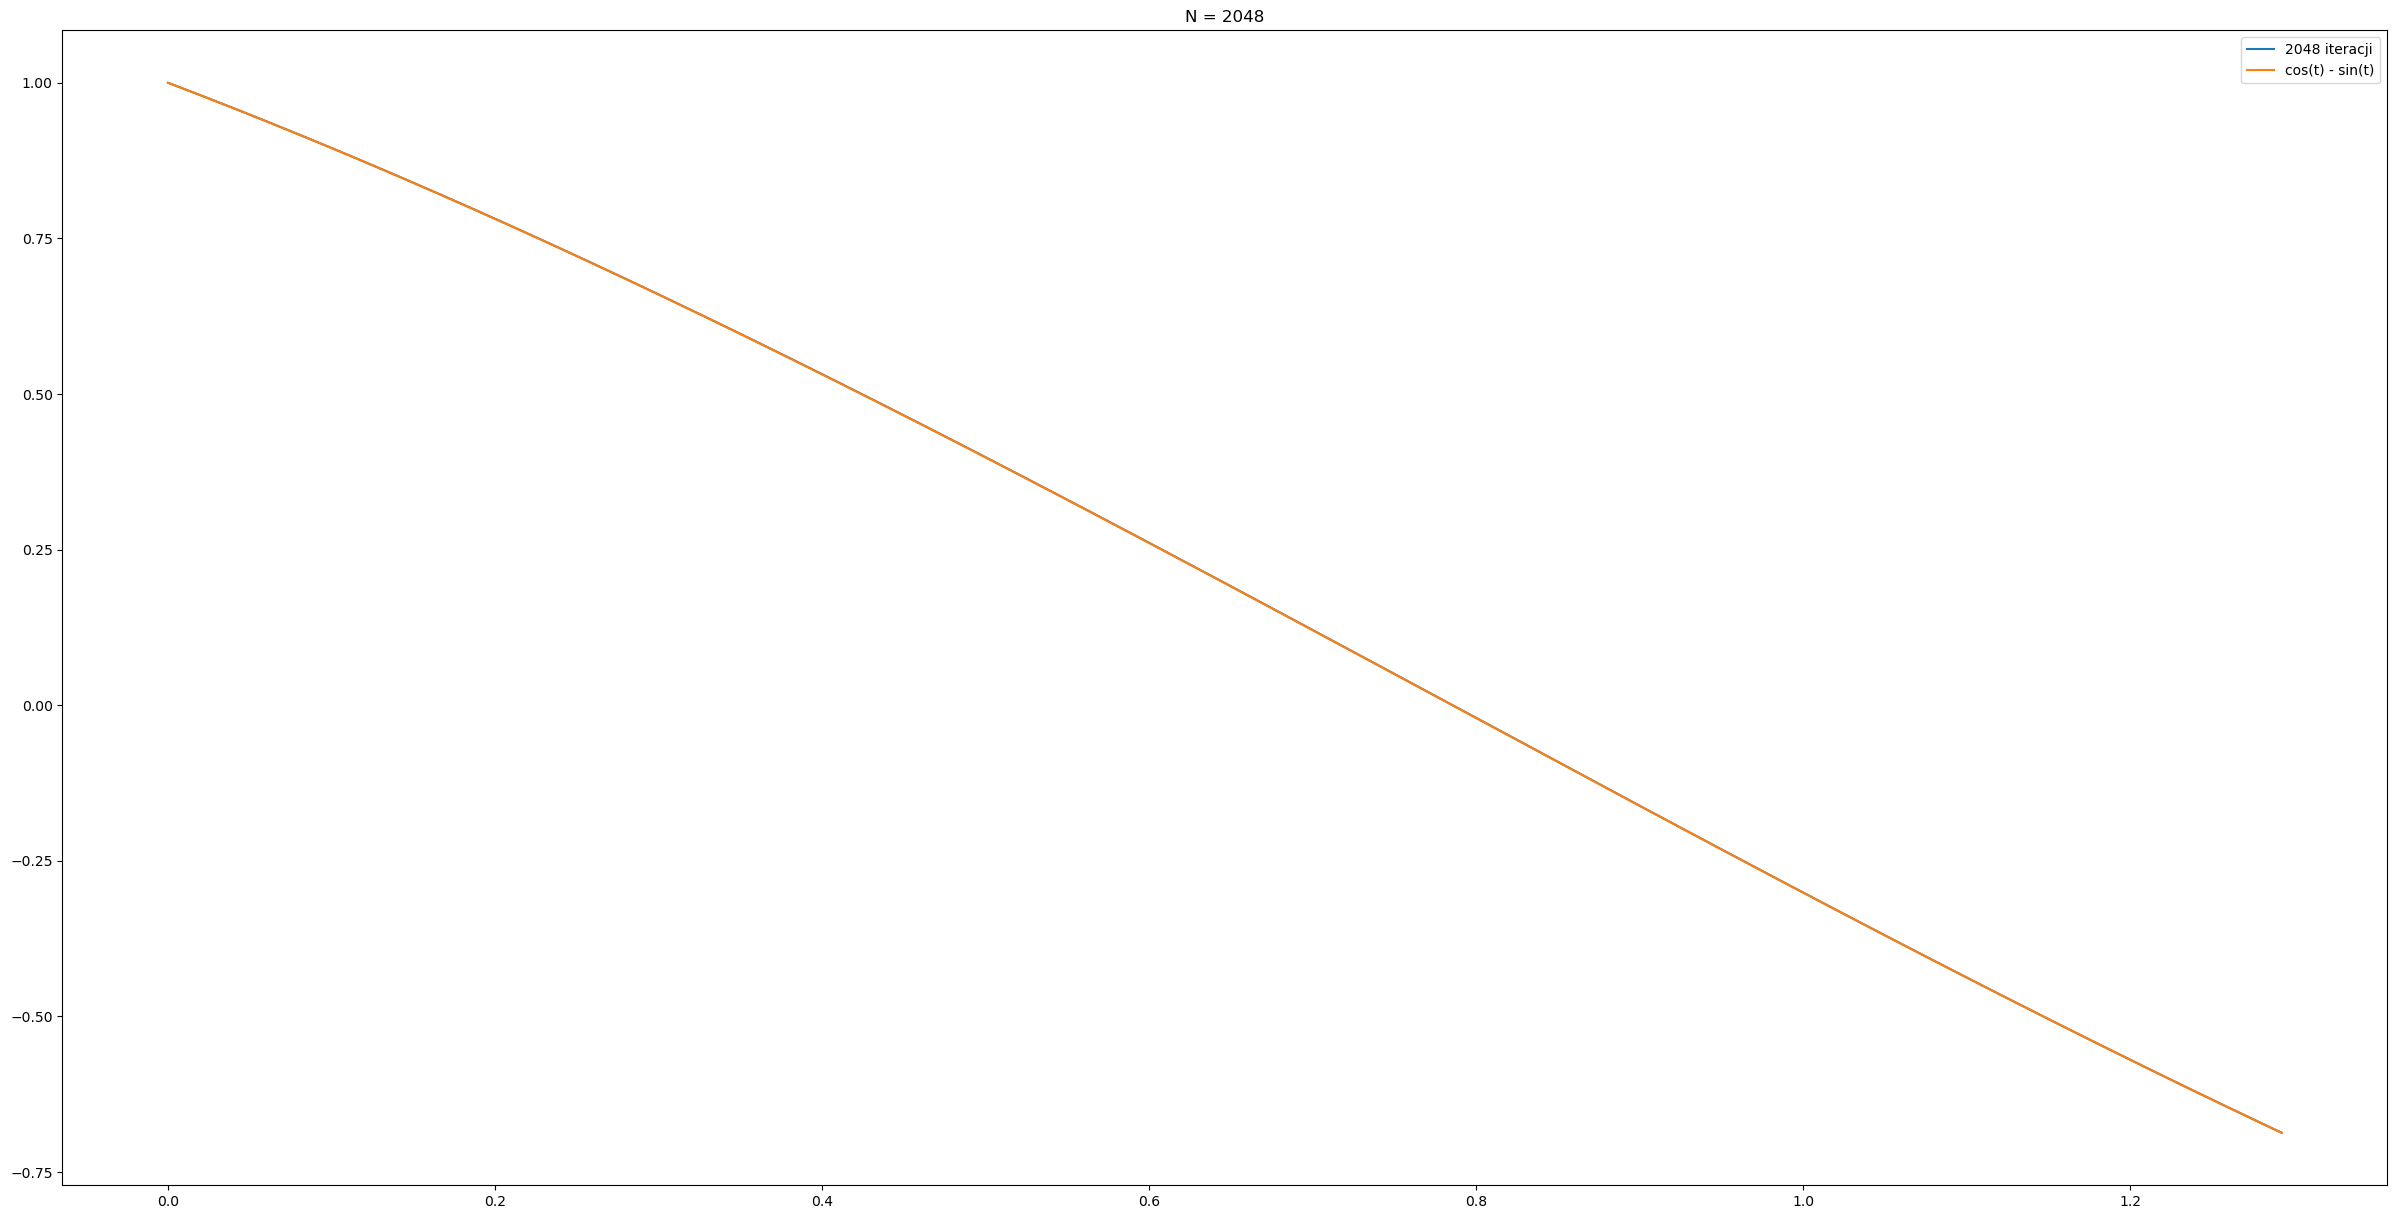

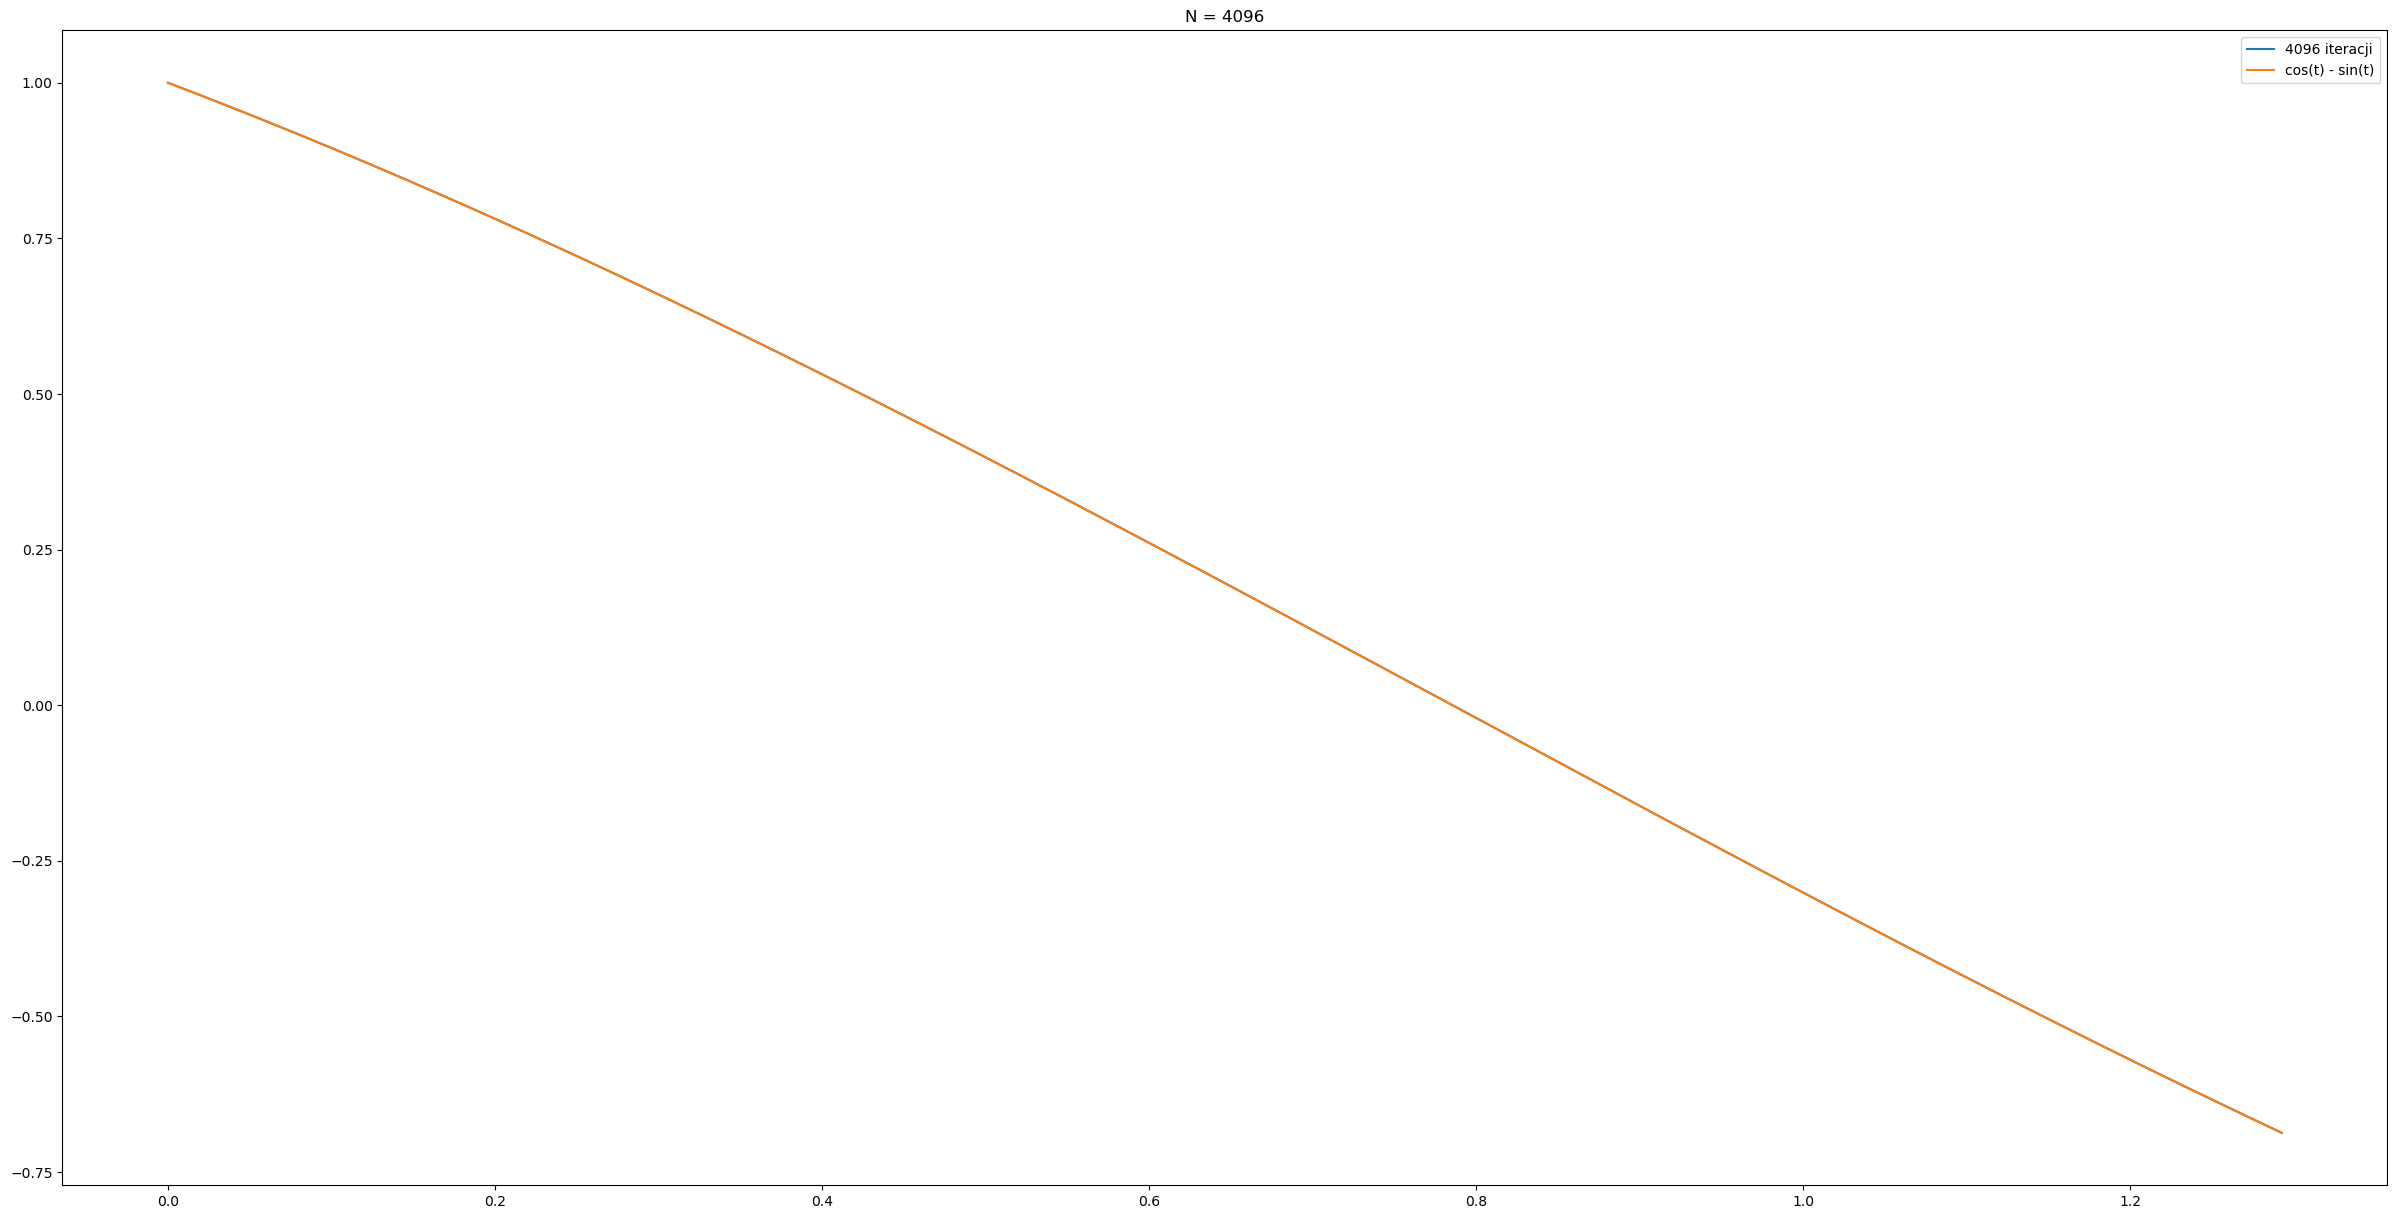

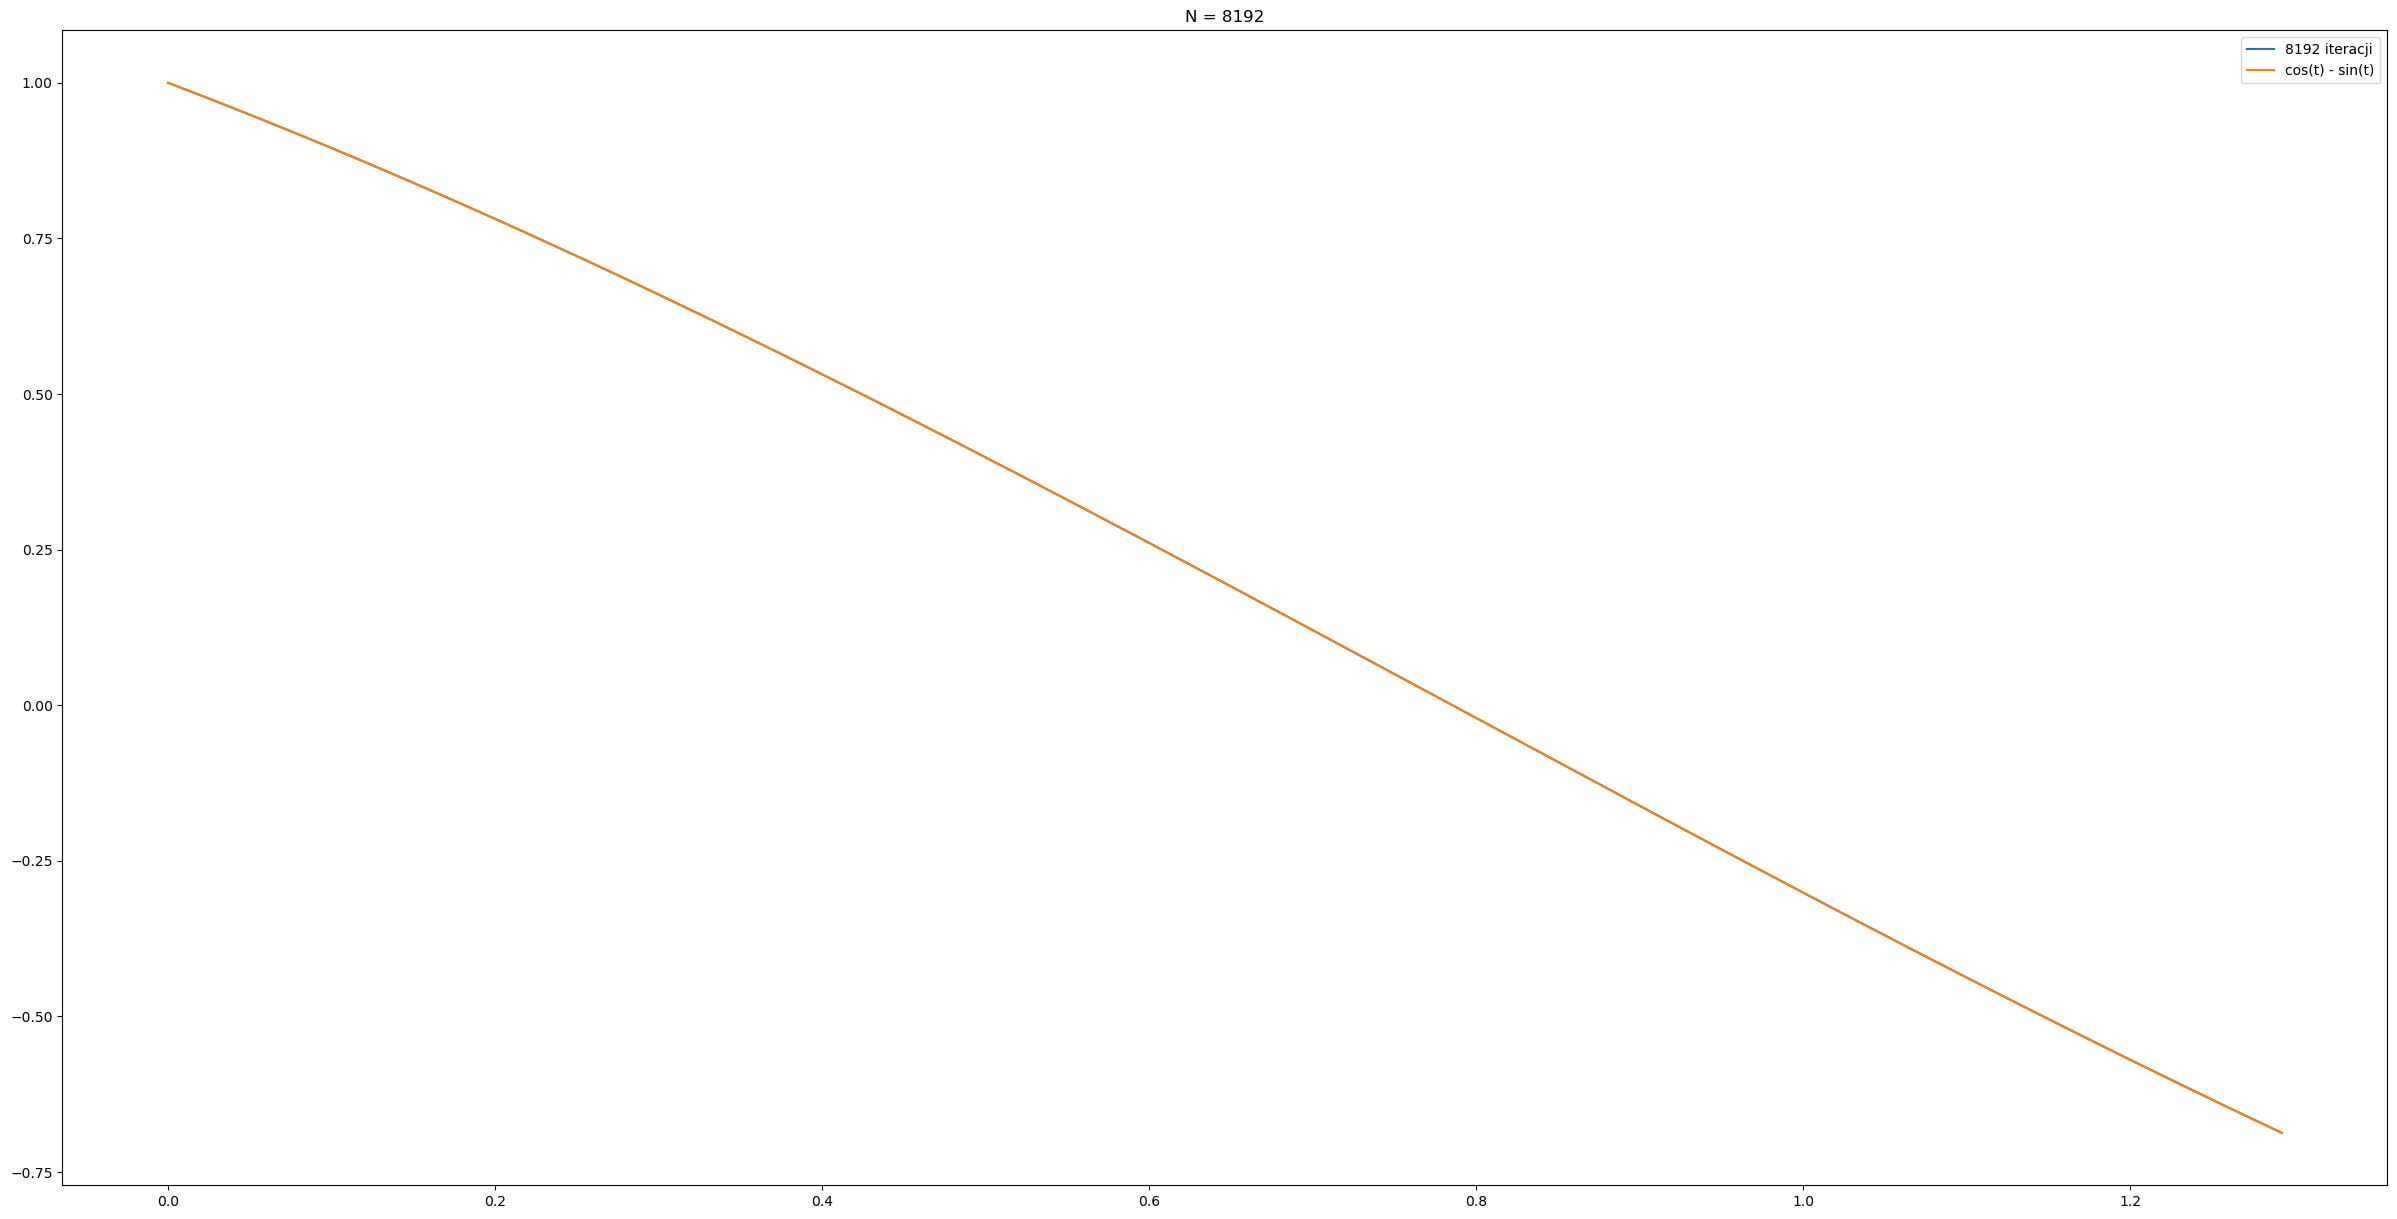

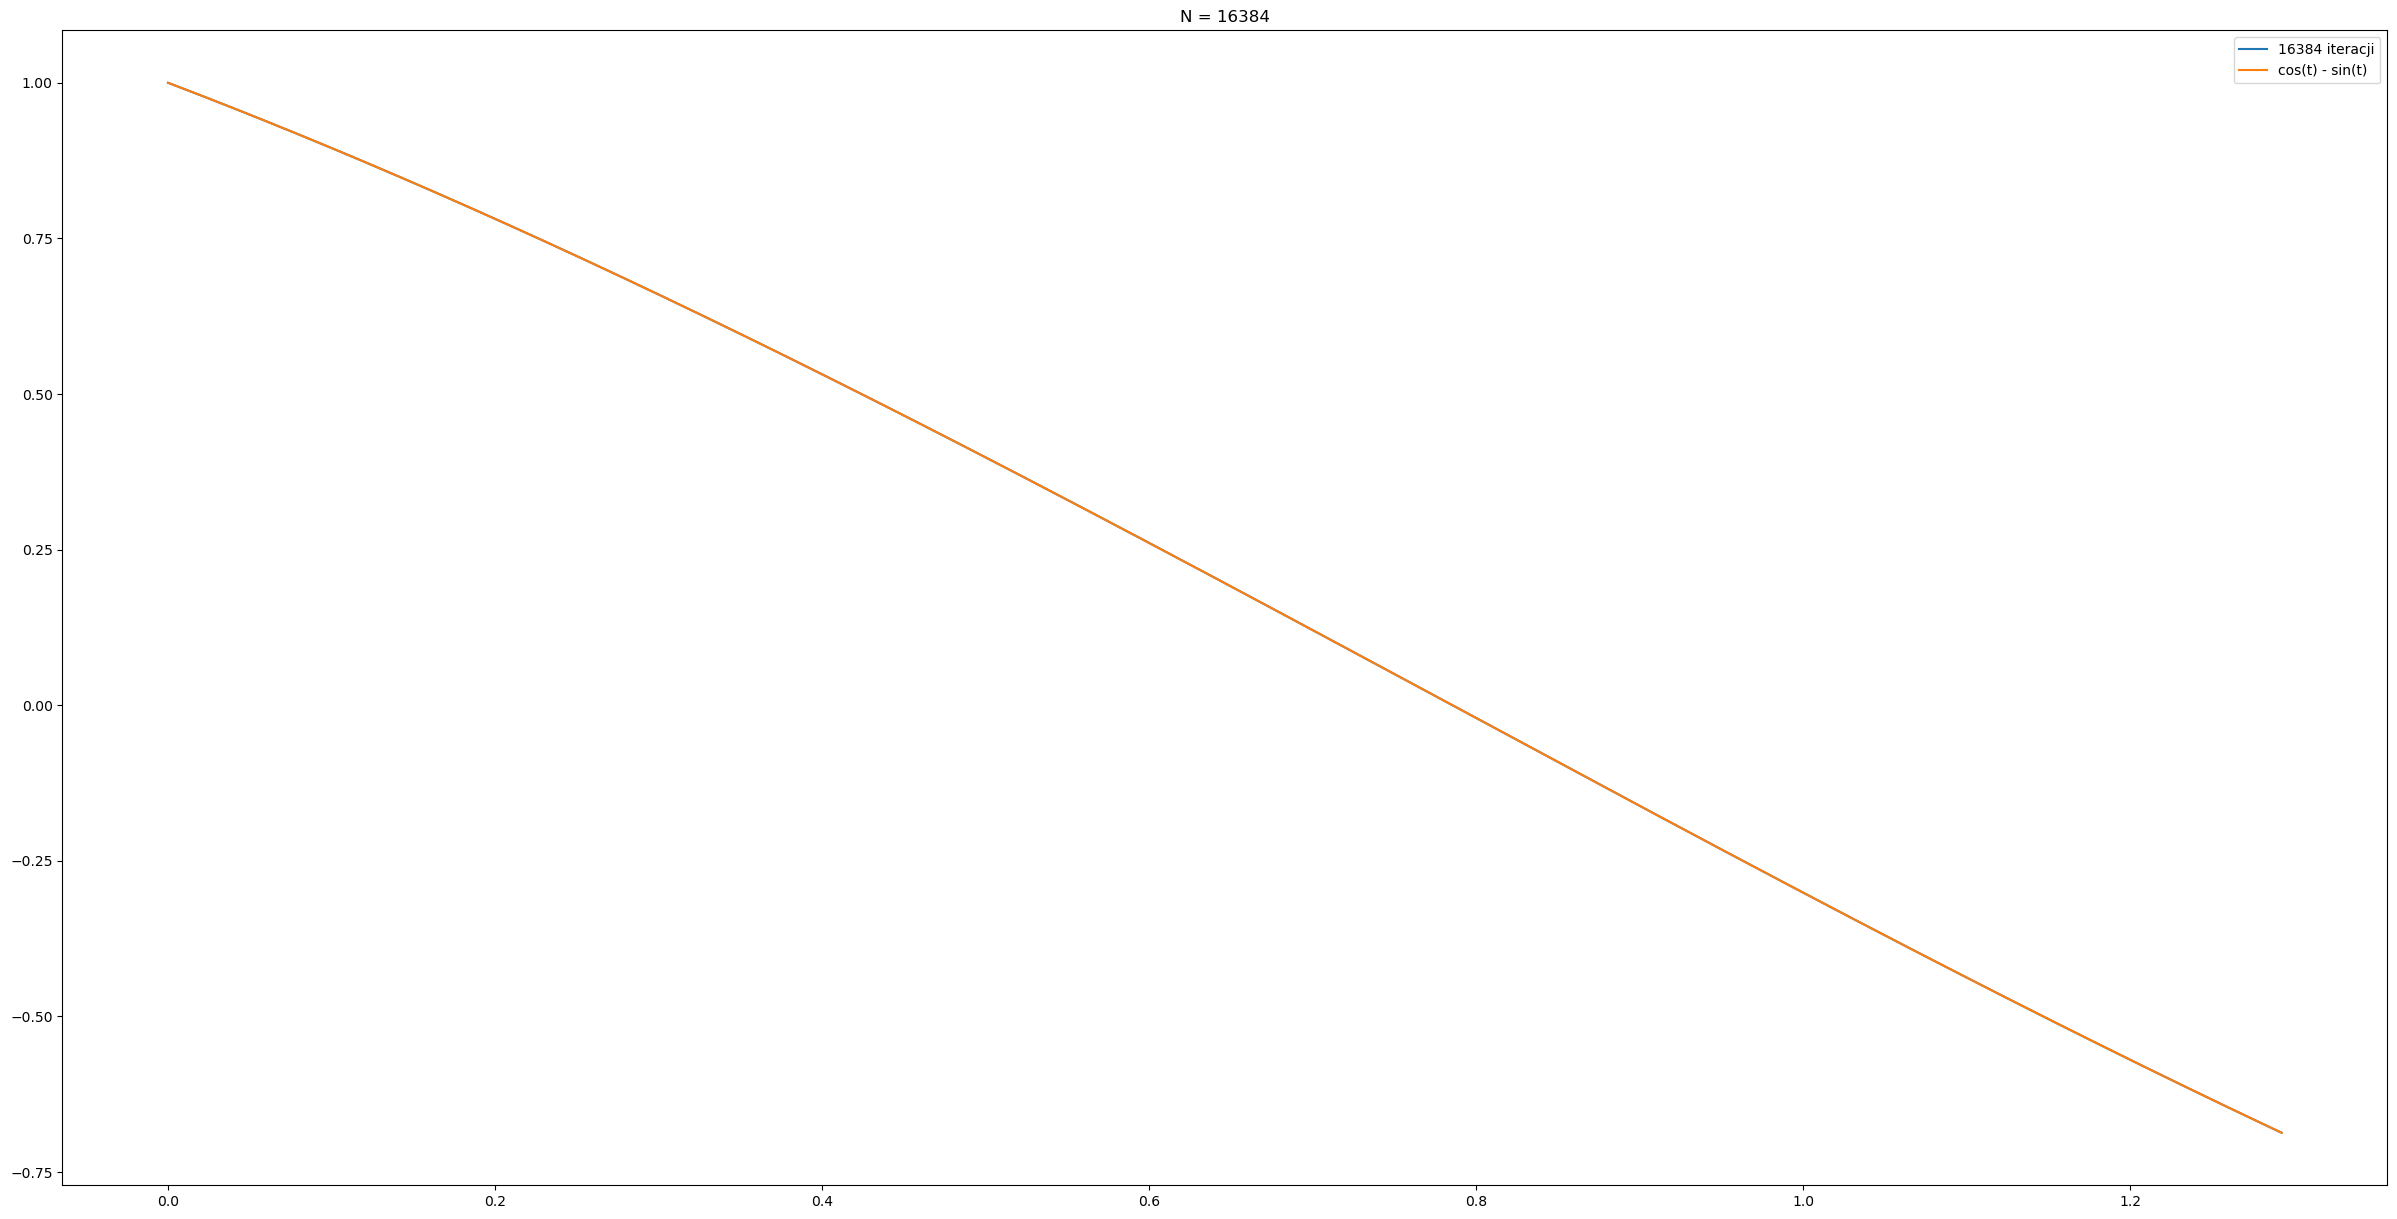

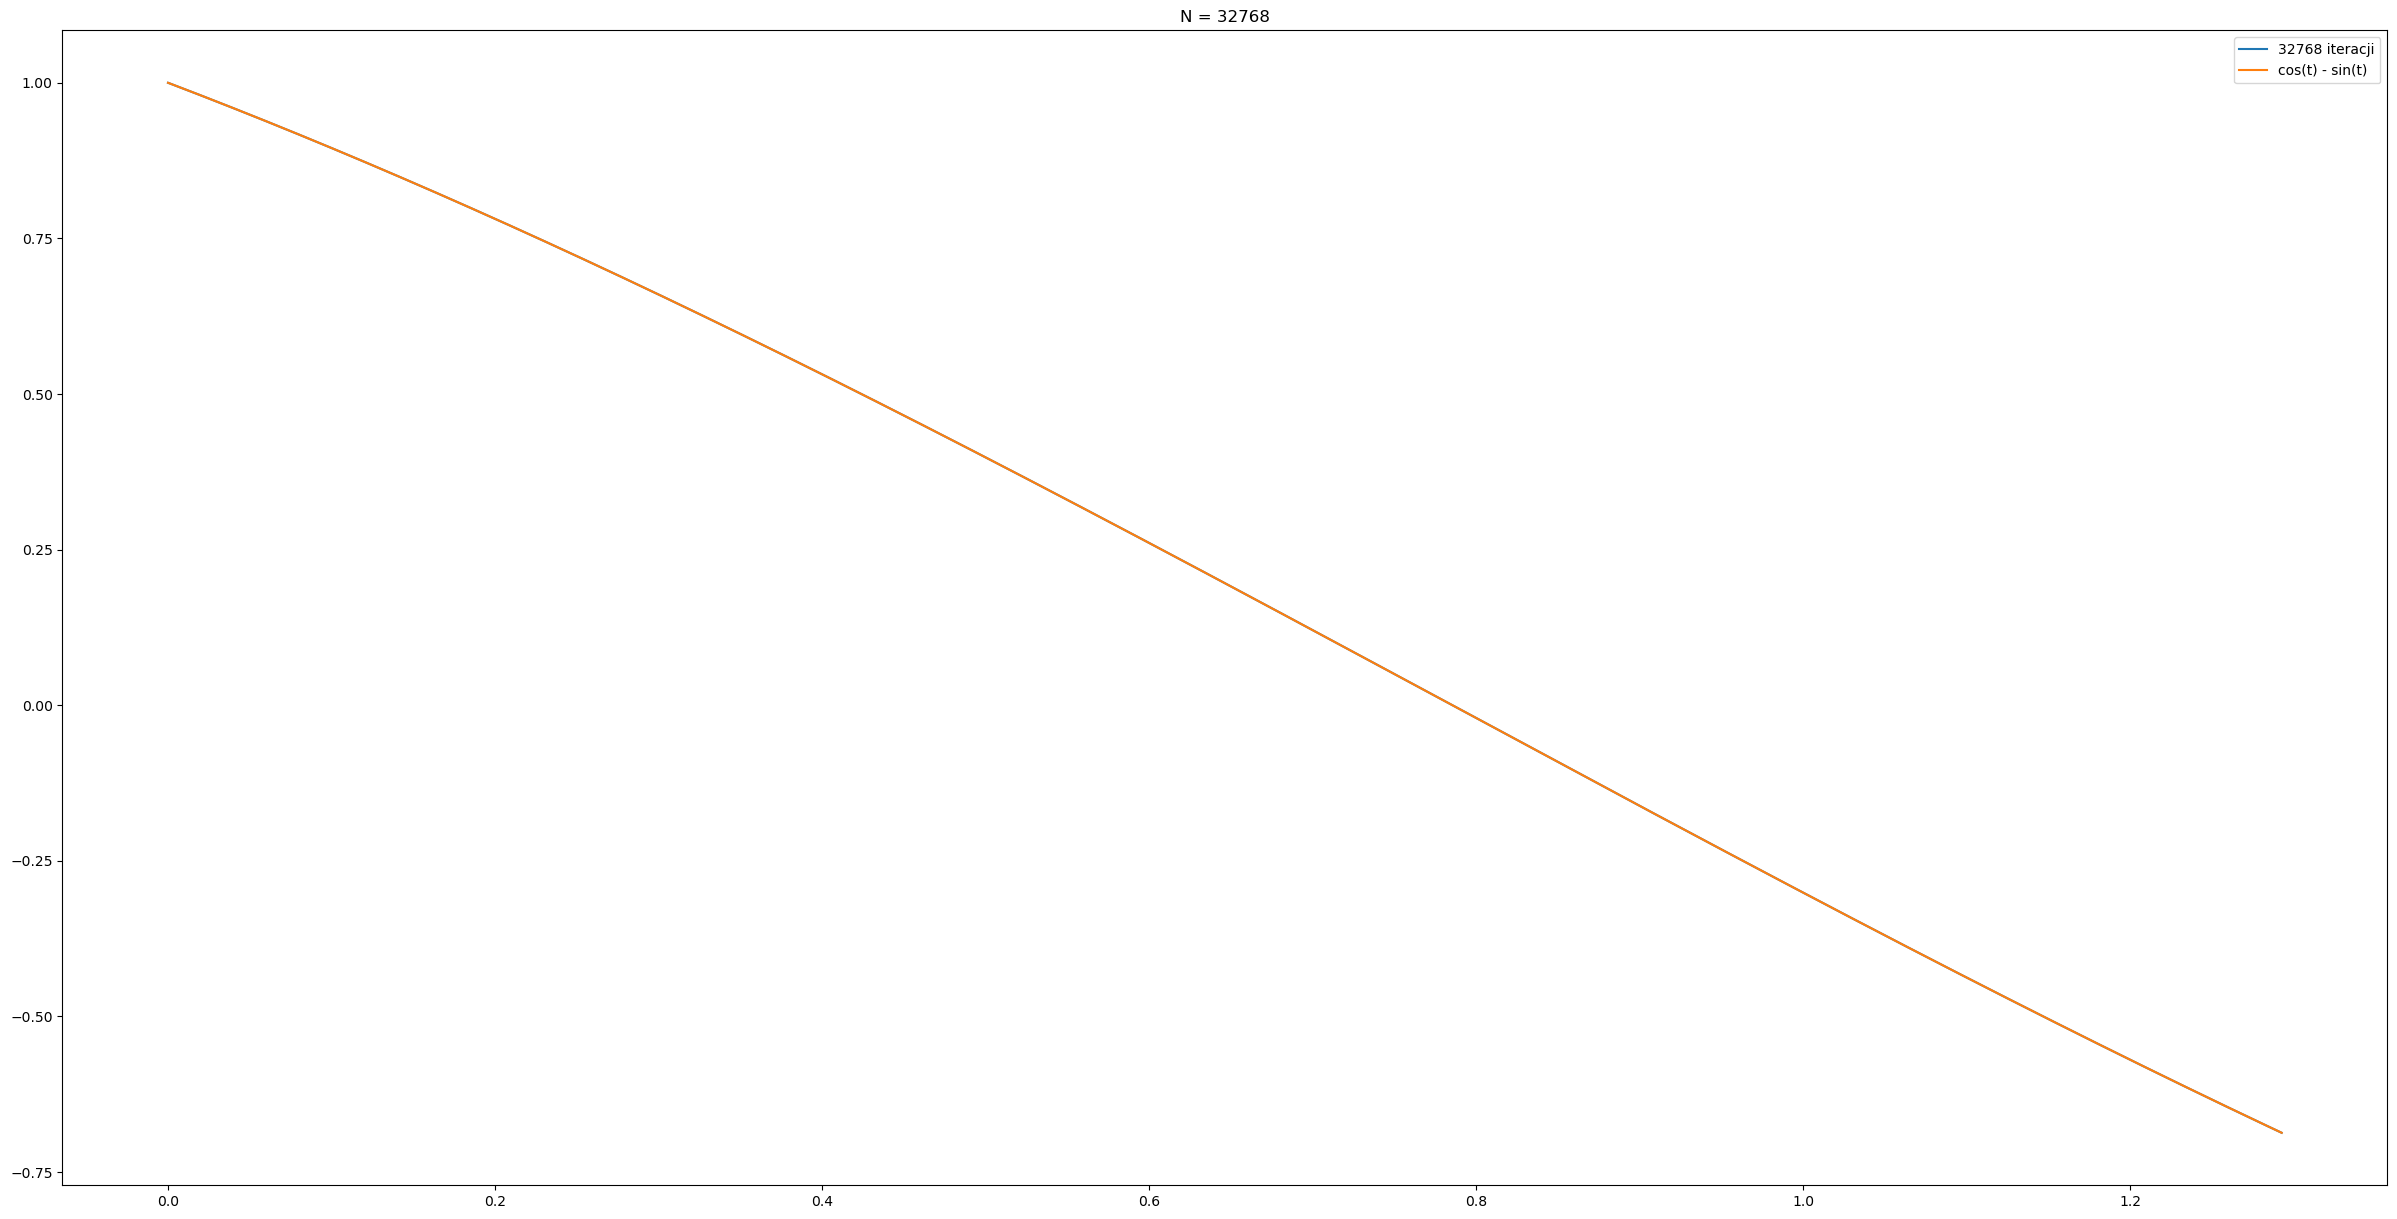

+-------+--------------+----------------------------------+---------+
|   N   |      h       |  err(N) = |x_N - cos() - sin()|  |  P_Num  |
+=======+==============+==================================+=========+
|   1   | 1.29 x 10^0  |           3.94 x 10^-1           |   nan   |
+-------+--------------+----------------------------------+---------+
|   2   | 6.46 x 10^-1 |           5.86 x 10^-2           | 2.75104 |
+-------+--------------+----------------------------------+---------+
|   4   | 3.23 x 10^-1 |           6.73 x 10^-3           | 3.12188 |
+-------+--------------+----------------------------------+---------+
|   8   | 1.62 x 10^-1 |           9.78 x 10^-4           | 2.78288 |
+-------+--------------+----------------------------------+---------+
|  16   | 8.08 x 10^-2 |           1.86 x 10^-4           | 2.39441 |
+-------+--------------+----------------------------------+---------+
|  32   | 4.04 x 10^-2 |           4.10 x 10^-5           | 2.18155 |
+-------+-----------

In [33]:
def x_prim(x, t):
    return -x*np.tan(t) - 1/np.cos(t)
T_0 = 0.0
T = 1.292695719373
X_0 = 1.0
 
results = {"N": [], "h":[], "err(N) = |x_N - cos() - sin()|":[], 'P_Num':[]}
prev_error = None
N=1
for _ in range(1,16):
    plt.figure(figsize=(30,15))
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad_punkty = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
            if i == 0:
                rozwiazania[i] = X_0
                continue
            rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
            blad_punkty[i] = np.abs(rozwiazania[i] - (np.cos(wezel) - np.sin(wezel)))
    blad_end = np.abs(rozwiazania[-1] - (np.cos(T) - np.sin(T)))
    if prev_error is not None:
        p_num = np.log2(prev_error/blad_end)
    
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - cos() - sin()|"].append(blad_end)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    N = N*2
    plt.plot(wezly, rozwiazania, label = f"{N} iteracji")
    plt.plot(wezly, np.cos(wezly) - np.sin(wezly), label = "cos(t) - sin(t)")
    plt.title(f'N = {N}')
    plt.legend()
    plt.show()
 
results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - cos() - sin()|', 'P_Num']]
res = results.copy()
for col in ['h','err(N) = |x_N - cos() - sin()|']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex = False))
